In [1]:
import pandas as pd

In [2]:
df_input = pd.read_excel('../SalCIS_ORF.xlsx')

In [3]:
import numpy as np

In [4]:
df_input['FASTA protein sequence'] = df_input['FASTA protein sequence'].str.replace('*','')

In [5]:
df_input = df_input.dropna(axis=0)

In [6]:
fasta_column_header = 'FASTA protein sequence'

In [1]:
!pwd

/Users/phr361/Documents/Coding/TaylorGroup_Help/Rooshanie/MS/Alpha3Pulldown


In [7]:
import os

import re
import json

In [8]:
# Read the base JSON template from a file
with open("./example1-1.json", "r") as file:
    base_json = json.load(file)

for index,row in df_input.iterrows():
    
    folder_name = './'+row['Given Nomenclature']
    if os.path.isdir(folder_name):
        pass
    else:
        os.mkdir(folder_name)
    json_folder = folder_name+'/JSONs'
    if os.path.isdir(json_folder):
        pass
    else:
        os.mkdir(json_folder)
    
    base_json['sequences'][0]['protein']['sequence'] = row['FASTA protein sequence']
    
    for index2, row2 in df_input.iterrows():

        json_data = json.loads(json.dumps(base_json))
    
        json_data["name"] = row["Given Nomenclature"]

        json_data["sequences"][1]["protein"]["sequence"] = row2["FASTA protein sequence"]
    
        # Save the JSON file with the name from the "name" column
        file_name = f"{json_folder}/{row['Given Nomenclature']}_{row2['Given Nomenclature']}.json"
        with open(file_name, "w") as json_file:
            json.dump(json_data, json_file, indent=4)

    

In [9]:
import logging
logging.basicConfig(level=logging.INFO)
logging.info("Processing started...")
import pandas as pd
import numpy as np
import os
import json
import argparse
from Bio.PDB import MMCIFParser, PDBIO
import argparse
import sys
from collections import defaultdict
import pdb


# Use the provided home_dir
home_dir = './'

output_dirs = []
for folder in os.listdir(home_dir):
    folder_path = os.path.join(home_dir, folder, 'output')
    if not os.path.isdir(folder_path):
        continue
    for prediction in os.listdir(folder_path):
        prediction_folder_path = os.path.join(folder_path, prediction)
        if os.path.isdir(prediction_folder_path):
            output_dirs.append(prediction_folder_path)

data = []
# Traverse the main folder
for output_dir in output_dirs:
    
    for main_folder in os.listdir(output_dir):
        main_folder_path = os.path.join(output_dir, main_folder)
        
        #print(main_folder_path)
        
        # Skip if it's not a directory
        if not os.path.isdir(main_folder_path):
            print(f"Not a directory {main_folder_path}")
            continue
        
     # Traverse only the seed-x_sample-y directories
        for seed_sample_folder in os.listdir(main_folder_path):
            seed_sample_path = os.path.join(main_folder_path, seed_sample_folder)
            logging.info(f"{seed_sample_path}")

            # Ensure it's a directory and matches the pattern 'seed-x_sample-y'
            if not os.path.isdir(seed_sample_path) or 'seed-' not in seed_sample_folder or 'sample-' not in seed_sample_folder:
                print(f"Does not match the expected naming system of the seed/sample folder \n{seed_sample_path} ")
                continue
            
            # Extract seed and sample values from the folder name
            try:
                seed = int(seed_sample_folder.split('_')[0].split('-')[1])
                sample = int(seed_sample_folder.split('_')[1].split('-')[1])
            except (IndexError, ValueError) as e:
                print(f"Skipping folder {seed_sample_folder} due to naming error: {e}")
                continue
            
            # Look for the JSON and CIF files in the folder
            json_file = next((f for f in os.listdir(seed_sample_path) if f.endswith("summary_confidences.json")), None)
            cif_file = next((f for f in os.listdir(seed_sample_path) if f.endswith(".cif")), None)
            
            if not json_file or not cif_file:
                print(f"Skipping {seed_sample_path} due to missing files: JSON={json_file}, CIF={cif_file}")
                continue
            
            # Load JSON data
            json_path = os.path.join(seed_sample_path, json_file)
            logging.info(f"{json_path}")
            with open(json_path, 'r') as f:
                json_data = json.load(f)
            
            # Add data to the list
            data.append({
                'main_folder': main_folder,  # The main folder name
                'seed': seed,               # Extracted seed
                'sample': sample,           # Extracted sample
                'cif_path': os.path.join(seed_sample_path, cif_file),  # Full path to the .cif file
                **json_data  # Add all JSON data as columns
            })

# Convert the list to a pandas DataFrame
df = pd.DataFrame(data)
logging.info("data read to dataframe...")



INFO:root:Processing started...
INFO:root:./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-44_sample-0
INFO:root:./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-33_sample-0
INFO:root:./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-44_sample-1
INFO:root:./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-33_sample-1
INFO:root:./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-83_sample-1
INFO:root:./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS13/salcis15/seed-10_sample-1
INFO:root:./SalCIS15/output/SalCIS15_SalCIS13/salci

Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS13/salcis15/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS13/salcis15/salcis15_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS13/salcis15/salcis15_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS13/salcis15/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS13/salcis15/salcis15_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS13/salcis15/salcis15_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS14/salcis15/ranking_scores.csv 
Does not match the expected naming system o

INFO:root:./SalCIS15/output/SalCIS15_SalCIS14/salcis15/seed-10_sample-3
INFO:root:./SalCIS15/output/SalCIS15_SalCIS14/salcis15/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS14/salcis15/seed-61_sample-2
INFO:root:./SalCIS15/output/SalCIS15_SalCIS14/salcis15/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS14/salcis15/seed-61_sample-3
INFO:root:./SalCIS15/output/SalCIS15_SalCIS14/salcis15/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS14/salcis15/seed-61_sample-4
INFO:root:./SalCIS15/output/SalCIS15_SalCIS14/salcis15/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS14/salcis15/salcis15_summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS14/salcis15/salcis15_data.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS15/salcis15/seed-44_sample-0
INFO:root:./SalCIS15/output/SalCIS15_SalCIS15/salcis15/seed-44_sample-0/summary_confidenc

Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS14/salcis15/salcis15_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS14/salcis15/salcis15_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS15/salcis15/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS15/salcis15/salcis15_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS15/salcis15/salcis15_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS15/salcis15/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS15/salcis15/salcis15_summary_confidences.json 
Does not match the expected 

INFO:root:./SalCIS15/output/SalCIS15_SalCIS12/salcis15/seed-44_sample-0
INFO:root:./SalCIS15/output/SalCIS15_SalCIS12/salcis15/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS12/salcis15/seed-33_sample-0
INFO:root:./SalCIS15/output/SalCIS15_SalCIS12/salcis15/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS12/salcis15/seed-44_sample-1
INFO:root:./SalCIS15/output/SalCIS15_SalCIS12/salcis15/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS12/salcis15/seed-33_sample-1
INFO:root:./SalCIS15/output/SalCIS15_SalCIS12/salcis15/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS12/salcis15/seed-83_sample-1
INFO:root:./SalCIS15/output/SalCIS15_SalCIS12/salcis15/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS12/salcis15/seed-10_sample-1
INFO:root:./SalCIS15/output/SalCIS15_SalCIS12/salcis15/seed-10_sample-1/summary_con

Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS12/salcis15/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS12/salcis15/salcis15_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS12/salcis15/salcis15_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS12/salcis15/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS12/salcis15/salcis15_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS12/salcis15/salcis15_data.json 


INFO:root:./SalCIS15/output/SalCIS15_SalCIS16B/salcis15/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS16B/salcis15/seed-44_sample-1
INFO:root:./SalCIS15/output/SalCIS15_SalCIS16B/salcis15/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS16B/salcis15/seed-33_sample-1
INFO:root:./SalCIS15/output/SalCIS15_SalCIS16B/salcis15/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS16B/salcis15/seed-83_sample-1
INFO:root:./SalCIS15/output/SalCIS15_SalCIS16B/salcis15/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS16B/salcis15/seed-10_sample-1
INFO:root:./SalCIS15/output/SalCIS15_SalCIS16B/salcis15/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS16B/salcis15/seed-10_sample-0
INFO:root:./SalCIS15/output/SalCIS15_SalCIS16B/salcis15/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS16B/

Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS16B/salcis15/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS16B/salcis15/salcis15_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS16B/salcis15/salcis15_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS16B/salcis15/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS16B/salcis15/salcis15_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS16B/salcis15/salcis15_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS5/salcis15/ranking_scores.csv 
Does not match the expected naming sys

INFO:root:./SalCIS15/output/SalCIS15_SalCIS5/salcis15/seed-10_sample-3
INFO:root:./SalCIS15/output/SalCIS15_SalCIS5/salcis15/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS5/salcis15/seed-61_sample-2
INFO:root:./SalCIS15/output/SalCIS15_SalCIS5/salcis15/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS5/salcis15/seed-61_sample-3
INFO:root:./SalCIS15/output/SalCIS15_SalCIS5/salcis15/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS5/salcis15/seed-61_sample-4
INFO:root:./SalCIS15/output/SalCIS15_SalCIS5/salcis15/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS5/salcis15/salcis15_summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS5/salcis15/salcis15_data.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS2/salcis15/seed-44_sample-0
INFO:root:./SalCIS15/output/SalCIS15_SalCIS2/salcis15/seed-44_sample-0/summary_confidences.json
INFO

Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS5/salcis15/salcis15_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS5/salcis15/salcis15_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS2/salcis15/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS2/salcis15/salcis15_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS2/salcis15/salcis15_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS2/salcis15/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS2/salcis15/salcis15_summary_confidences.json 
Does not match the expected naming 

INFO:root:./SalCIS15/output/SalCIS15_SalCIS10/salcis15/TERMS_OF_USE.md
INFO:root:./SalCIS15/output/SalCIS15_SalCIS10/salcis15/seed-83_sample-3
INFO:root:./SalCIS15/output/SalCIS15_SalCIS10/salcis15/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS10/salcis15/seed-10_sample-4
INFO:root:./SalCIS15/output/SalCIS15_SalCIS10/salcis15/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS10/salcis15/seed-83_sample-4
INFO:root:./SalCIS15/output/SalCIS15_SalCIS10/salcis15/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS10/salcis15/seed-10_sample-3
INFO:root:./SalCIS15/output/SalCIS15_SalCIS10/salcis15/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS10/salcis15/seed-61_sample-2
INFO:root:./SalCIS15/output/SalCIS15_SalCIS10/salcis15/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS10/salcis15/seed-61_sample-3
INFO:root:./

Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS10/salcis15/salcis15_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS10/salcis15/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS10/salcis15/salcis15_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS10/salcis15/salcis15_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS19/salcis15/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS19/salcis15/salcis15_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS19/salcis15/salcis15_confidences.json 
Does not match the expected naming s

INFO:root:./SalCIS15/output/SalCIS15_SalCIS19/salcis15/seed-61_sample-3
INFO:root:./SalCIS15/output/SalCIS15_SalCIS19/salcis15/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS19/salcis15/seed-61_sample-4
INFO:root:./SalCIS15/output/SalCIS15_SalCIS19/salcis15/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS19/salcis15/salcis15_summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS19/salcis15/salcis15_data.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS21/salcis15/seed-44_sample-0
INFO:root:./SalCIS15/output/SalCIS15_SalCIS21/salcis15/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS21/salcis15/seed-33_sample-0
INFO:root:./SalCIS15/output/SalCIS15_SalCIS21/salcis15/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS21/salcis15/seed-44_sample-1
INFO:root:./SalCIS15/output/SalCIS15_SalCIS21/salcis15/seed-44_sample-1/summary_confidenc

Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS19/salcis15/salcis15_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS19/salcis15/salcis15_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS21/salcis15/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS21/salcis15/salcis15_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS21/salcis15/salcis15_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS21/salcis15/TERMS_OF_USE.md 


INFO:root:./SalCIS15/output/SalCIS15_SalCIS21/salcis15/seed-10_sample-3
INFO:root:./SalCIS15/output/SalCIS15_SalCIS21/salcis15/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS21/salcis15/seed-61_sample-2
INFO:root:./SalCIS15/output/SalCIS15_SalCIS21/salcis15/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS21/salcis15/seed-61_sample-3
INFO:root:./SalCIS15/output/SalCIS15_SalCIS21/salcis15/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS21/salcis15/seed-61_sample-4
INFO:root:./SalCIS15/output/SalCIS15_SalCIS21/salcis15/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS21/salcis15/salcis15_summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS21/salcis15/salcis15_data.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS20/salcis15/seed-44_sample-0
INFO:root:./SalCIS15/output/SalCIS15_SalCIS20/salcis15/seed-44_sample-0/summary_confidenc

Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS21/salcis15/salcis15_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS21/salcis15/salcis15_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS20/salcis15/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS20/salcis15/salcis15_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS20/salcis15/salcis15_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS20/salcis15/TERMS_OF_USE.md 


INFO:root:./SalCIS15/output/SalCIS15_SalCIS20/salcis15/seed-83_sample-4
INFO:root:./SalCIS15/output/SalCIS15_SalCIS20/salcis15/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS20/salcis15/seed-10_sample-3
INFO:root:./SalCIS15/output/SalCIS15_SalCIS20/salcis15/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS20/salcis15/seed-61_sample-2
INFO:root:./SalCIS15/output/SalCIS15_SalCIS20/salcis15/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS20/salcis15/seed-61_sample-3
INFO:root:./SalCIS15/output/SalCIS15_SalCIS20/salcis15/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS20/salcis15/seed-61_sample-4
INFO:root:./SalCIS15/output/SalCIS15_SalCIS20/salcis15/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS20/salcis15/salcis15_summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS20/salcis15/salcis15_da

Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS20/salcis15/salcis15_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS20/salcis15/salcis15_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS11/salcis15/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS11/salcis15/salcis15_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS11/salcis15/salcis15_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS11/salcis15/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS11/salcis15/salcis15_summary_confidences.json 
Does not match the expected 

INFO:root:./SalCIS15/output/SalCIS15_SalCIS16A/salcis15/seed-10_sample-1
INFO:root:./SalCIS15/output/SalCIS15_SalCIS16A/salcis15/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS16A/salcis15/seed-10_sample-0
INFO:root:./SalCIS15/output/SalCIS15_SalCIS16A/salcis15/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS16A/salcis15/seed-83_sample-0
INFO:root:./SalCIS15/output/SalCIS15_SalCIS16A/salcis15/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS16A/salcis15/seed-61_sample-1
INFO:root:./SalCIS15/output/SalCIS15_SalCIS16A/salcis15/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS16A/salcis15/seed-61_sample-0
INFO:root:./SalCIS15/output/SalCIS15_SalCIS16A/salcis15/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS16A/salcis15/ranking_scores.csv
INFO:root:./SalCIS15/output/SalCIS15_SalCIS16A/salcis15/seed-33_sample

Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS16A/salcis15/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS16A/salcis15/salcis15_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS16A/salcis15/salcis15_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS16A/salcis15/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS16A/salcis15/salcis15_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS16A/salcis15/salcis15_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS7/salcis15/ranking_scores.csv 


INFO:root:./SalCIS15/output/SalCIS15_SalCIS7/salcis15/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS7/salcis15/salcis15_model.cif
INFO:root:./SalCIS15/output/SalCIS15_SalCIS7/salcis15/seed-44_sample-2
INFO:root:./SalCIS15/output/SalCIS15_SalCIS7/salcis15/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS7/salcis15/seed-10_sample-2
INFO:root:./SalCIS15/output/SalCIS15_SalCIS7/salcis15/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS7/salcis15/seed-83_sample-2
INFO:root:./SalCIS15/output/SalCIS15_SalCIS7/salcis15/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS7/salcis15/salcis15_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS7/salcis15/TERMS_OF_USE.md
INFO:root:./SalCIS15/output/SalCIS15_SalCIS7/salcis15/seed-83_sample-3
INFO:root:./SalCIS15/output/SalCIS15_SalCIS7/salcis15/seed-83_sample-3/summary_confidences.json
INFO:root:./S

Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS7/salcis15/salcis15_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS7/salcis15/salcis15_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS7/salcis15/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS7/salcis15/salcis15_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS7/salcis15/salcis15_data.json 


INFO:root:./SalCIS15/output/SalCIS15_SalCIS9/salcis15/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS9/salcis15/seed-61_sample-0
INFO:root:./SalCIS15/output/SalCIS15_SalCIS9/salcis15/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS9/salcis15/ranking_scores.csv
INFO:root:./SalCIS15/output/SalCIS15_SalCIS9/salcis15/seed-33_sample-4
INFO:root:./SalCIS15/output/SalCIS15_SalCIS9/salcis15/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS9/salcis15/seed-33_sample-3
INFO:root:./SalCIS15/output/SalCIS15_SalCIS9/salcis15/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS9/salcis15/seed-44_sample-4
INFO:root:./SalCIS15/output/SalCIS15_SalCIS9/salcis15/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS9/salcis15/seed-44_sample-3
INFO:root:./SalCIS15/output/SalCIS15_SalCIS9/salcis15/seed-44_sample-3/summary_confidences.j

Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS9/salcis15/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS9/salcis15/salcis15_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS9/salcis15/salcis15_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS9/salcis15/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS9/salcis15/salcis15_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS9/salcis15/salcis15_data.json 


INFO:root:./SalCIS15/output/SalCIS15_SalCIS8/salcis15/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS8/salcis15/seed-10_sample-1
INFO:root:./SalCIS15/output/SalCIS15_SalCIS8/salcis15/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS8/salcis15/seed-10_sample-0
INFO:root:./SalCIS15/output/SalCIS15_SalCIS8/salcis15/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS8/salcis15/seed-83_sample-0
INFO:root:./SalCIS15/output/SalCIS15_SalCIS8/salcis15/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS8/salcis15/seed-61_sample-1
INFO:root:./SalCIS15/output/SalCIS15_SalCIS8/salcis15/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS8/salcis15/seed-61_sample-0
INFO:root:./SalCIS15/output/SalCIS15_SalCIS8/salcis15/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS8/salcis15/ranking_scores.

Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS8/salcis15/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS8/salcis15/salcis15_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS8/salcis15/salcis15_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS8/salcis15/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS8/salcis15/salcis15_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS8/salcis15/salcis15_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS1/salcis15/ranking_scores.csv 


INFO:root:./SalCIS15/output/SalCIS15_SalCIS1/salcis15/salcis15_model.cif
INFO:root:./SalCIS15/output/SalCIS15_SalCIS1/salcis15/seed-44_sample-2
INFO:root:./SalCIS15/output/SalCIS15_SalCIS1/salcis15/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS1/salcis15/seed-10_sample-2
INFO:root:./SalCIS15/output/SalCIS15_SalCIS1/salcis15/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS1/salcis15/seed-83_sample-2
INFO:root:./SalCIS15/output/SalCIS15_SalCIS1/salcis15/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS1/salcis15/salcis15_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS1/salcis15/TERMS_OF_USE.md
INFO:root:./SalCIS15/output/SalCIS15_SalCIS1/salcis15/seed-83_sample-3
INFO:root:./SalCIS15/output/SalCIS15_SalCIS1/salcis15/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCIS1/salcis15/seed-10_sample-4
INFO:root:./SalCIS15/output/SalCIS15_S

Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS1/salcis15/salcis15_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS1/salcis15/salcis15_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS1/salcis15/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS1/salcis15/salcis15_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCIS1/salcis15/salcis15_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCis6/salcis15/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCis6/salcis15/salcis15_model.cif 
Does not match the expected naming system of the s

INFO:root:./SalCIS15/output/SalCIS15_SalCis6/salcis15/seed-61_sample-3
INFO:root:./SalCIS15/output/SalCIS15_SalCis6/salcis15/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCis6/salcis15/seed-61_sample-4
INFO:root:./SalCIS15/output/SalCIS15_SalCis6/salcis15/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCis6/salcis15/salcis15_summary_confidences.json
INFO:root:./SalCIS15/output/SalCIS15_SalCis6/salcis15/salcis15_data.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16B/salcis12/seed-44_sample-0
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16B/salcis12/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16B/salcis12/seed-33_sample-0
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16B/salcis12/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16B/salcis12/seed-44_sample-1
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16B/salcis12/seed-44_sample-1/summary_confidenc

Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCis6/salcis15/salcis15_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS15/output/SalCIS15_SalCis6/salcis15/salcis15_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS16B/salcis12/salcis12_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS16B/salcis12/salcis12_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS16B/salcis12/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS16B/salcis12/salcis12_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS16B/salcis12/TERMS_OF_USE.md 


INFO:root:./SalCIS12/output/SalCIS12_SalCIS16B/salcis12/seed-83_sample-4
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16B/salcis12/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16B/salcis12/seed-10_sample-3
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16B/salcis12/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16B/salcis12/seed-61_sample-2
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16B/salcis12/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16B/salcis12/seed-61_sample-3
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16B/salcis12/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16B/salcis12/seed-61_sample-4
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16B/salcis12/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16B/salcis12/salcis12_model.cif
INFO:root:./SalCIS12/output/SalCIS12_SalCIS14/salcis12/seed-44_sample-

Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS16B/salcis12/salcis12_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS14/salcis12/salcis12_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS14/salcis12/salcis12_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS14/salcis12/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS14/salcis12/salcis12_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS14/salcis12/TERMS_OF_USE.md 


INFO:root:./SalCIS12/output/SalCIS12_SalCIS14/salcis12/seed-61_sample-3
INFO:root:./SalCIS12/output/SalCIS12_SalCIS14/salcis12/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS14/salcis12/seed-61_sample-4
INFO:root:./SalCIS12/output/SalCIS12_SalCIS14/salcis12/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS14/salcis12/salcis12_model.cif
INFO:root:./SalCIS12/output/SalCIS12_SalCIS13/salcis12/seed-44_sample-0
INFO:root:./SalCIS12/output/SalCIS12_SalCIS13/salcis12/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS13/salcis12/seed-33_sample-0
INFO:root:./SalCIS12/output/SalCIS12_SalCIS13/salcis12/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS13/salcis12/seed-44_sample-1
INFO:root:./SalCIS12/output/SalCIS12_SalCIS13/salcis12/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS13/salcis12/seed-33_sample-1
INFO:root

Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS14/salcis12/salcis12_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS13/salcis12/salcis12_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS13/salcis12/salcis12_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS13/salcis12/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS13/salcis12/salcis12_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS13/salcis12/TERMS_OF_USE.md 


INFO:root:./SalCIS12/output/SalCIS12_SalCIS13/salcis12/seed-61_sample-3
INFO:root:./SalCIS12/output/SalCIS12_SalCIS13/salcis12/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS13/salcis12/seed-61_sample-4
INFO:root:./SalCIS12/output/SalCIS12_SalCIS13/salcis12/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS13/salcis12/salcis12_model.cif
INFO:root:./SalCIS12/output/SalCIS12_SalCIS12/salcis12/seed-44_sample-0
INFO:root:./SalCIS12/output/SalCIS12_SalCIS12/salcis12/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS12/salcis12/seed-33_sample-0
INFO:root:./SalCIS12/output/SalCIS12_SalCIS12/salcis12/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS12/salcis12/seed-44_sample-1
INFO:root:./SalCIS12/output/SalCIS12_SalCIS12/salcis12/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS12/salcis12/seed-33_sample-1
INFO:root

Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS13/salcis12/salcis12_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS12/salcis12/salcis12_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS12/salcis12/salcis12_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS12/salcis12/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS12/salcis12/salcis12_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS12/salcis12/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS12/salcis12/salcis12_model.cif 
Does not match the expected naming system o

INFO:root:./SalCIS12/output/SalCIS12_SalCIS15/salcis12/salcis12_data.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS15/salcis12/seed-33_sample-3
INFO:root:./SalCIS12/output/SalCIS12_SalCIS15/salcis12/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS15/salcis12/seed-44_sample-4
INFO:root:./SalCIS12/output/SalCIS12_SalCIS15/salcis12/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS15/salcis12/seed-44_sample-3
INFO:root:./SalCIS12/output/SalCIS12_SalCIS15/salcis12/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS15/salcis12/seed-33_sample-2
INFO:root:./SalCIS12/output/SalCIS12_SalCIS15/salcis12/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS15/salcis12/seed-44_sample-2
INFO:root:./SalCIS12/output/SalCIS12_SalCIS15/salcis12/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS15/salcis12/seed-10_sample-2
INFO:root

Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS15/salcis12/salcis12_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS15/salcis12/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS15/salcis12/salcis12_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS1/salcis12/salcis12_summary_confidences.json 


INFO:root:./SalCIS12/output/SalCIS12_SalCIS1/salcis12/salcis12_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS1/salcis12/ranking_scores.csv
INFO:root:./SalCIS12/output/SalCIS12_SalCIS1/salcis12/seed-33_sample-4
INFO:root:./SalCIS12/output/SalCIS12_SalCIS1/salcis12/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS1/salcis12/salcis12_data.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS1/salcis12/seed-33_sample-3
INFO:root:./SalCIS12/output/SalCIS12_SalCIS1/salcis12/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS1/salcis12/seed-44_sample-4
INFO:root:./SalCIS12/output/SalCIS12_SalCIS1/salcis12/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS1/salcis12/seed-44_sample-3
INFO:root:./SalCIS12/output/SalCIS12_SalCIS1/salcis12/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS1/salcis12/seed-33_sample-2
INFO:root:./SalCIS12/output/SalCIS1

Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS1/salcis12/salcis12_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS1/salcis12/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS1/salcis12/salcis12_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS1/salcis12/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS1/salcis12/salcis12_model.cif 


INFO:root:./SalCIS12/output/SalCIS12_SalCis6/salcis12/seed-10_sample-1
INFO:root:./SalCIS12/output/SalCIS12_SalCis6/salcis12/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCis6/salcis12/seed-10_sample-0
INFO:root:./SalCIS12/output/SalCIS12_SalCis6/salcis12/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCis6/salcis12/seed-83_sample-0
INFO:root:./SalCIS12/output/SalCIS12_SalCis6/salcis12/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCis6/salcis12/seed-61_sample-1
INFO:root:./SalCIS12/output/SalCIS12_SalCis6/salcis12/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCis6/salcis12/salcis12_summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCis6/salcis12/seed-61_sample-0
INFO:root:./SalCIS12/output/SalCIS12_SalCis6/salcis12/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCis6/salcis12/salcis12_confidences.js

Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCis6/salcis12/salcis12_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCis6/salcis12/salcis12_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCis6/salcis12/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCis6/salcis12/salcis12_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCis6/salcis12/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCis6/salcis12/salcis12_model.cif 


INFO:root:./SalCIS12/output/SalCIS12_SalCIS8/salcis12/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS8/salcis12/seed-83_sample-0
INFO:root:./SalCIS12/output/SalCIS12_SalCIS8/salcis12/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS8/salcis12/seed-61_sample-1
INFO:root:./SalCIS12/output/SalCIS12_SalCIS8/salcis12/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS8/salcis12/salcis12_summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS8/salcis12/seed-61_sample-0
INFO:root:./SalCIS12/output/SalCIS12_SalCIS8/salcis12/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS8/salcis12/salcis12_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS8/salcis12/ranking_scores.csv
INFO:root:./SalCIS12/output/SalCIS12_SalCIS8/salcis12/seed-33_sample-4
INFO:root:./SalCIS12/output/SalCIS12_SalCIS8/salcis12/seed-33_sample-4/summary_confidences.

Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS8/salcis12/salcis12_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS8/salcis12/salcis12_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS8/salcis12/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS8/salcis12/salcis12_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS8/salcis12/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS8/salcis12/salcis12_model.cif 


INFO:root:./SalCIS12/output/SalCIS12_SalCIS9/salcis12/seed-61_sample-1
INFO:root:./SalCIS12/output/SalCIS12_SalCIS9/salcis12/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS9/salcis12/salcis12_summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS9/salcis12/seed-61_sample-0
INFO:root:./SalCIS12/output/SalCIS12_SalCIS9/salcis12/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS9/salcis12/salcis12_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS9/salcis12/ranking_scores.csv
INFO:root:./SalCIS12/output/SalCIS12_SalCIS9/salcis12/seed-33_sample-4
INFO:root:./SalCIS12/output/SalCIS12_SalCIS9/salcis12/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS9/salcis12/salcis12_data.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS9/salcis12/seed-33_sample-3
INFO:root:./SalCIS12/output/SalCIS12_SalCIS9/salcis12/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS

Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS9/salcis12/salcis12_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS9/salcis12/salcis12_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS9/salcis12/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS9/salcis12/salcis12_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS9/salcis12/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS9/salcis12/salcis12_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS7/salcis12/salcis12_summary_confidences.json 
Does not match the expected naming 

INFO:root:./SalCIS12/output/SalCIS12_SalCIS7/salcis12/seed-83_sample-4
INFO:root:./SalCIS12/output/SalCIS12_SalCIS7/salcis12/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS7/salcis12/seed-10_sample-3
INFO:root:./SalCIS12/output/SalCIS12_SalCIS7/salcis12/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS7/salcis12/seed-61_sample-2
INFO:root:./SalCIS12/output/SalCIS12_SalCIS7/salcis12/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS7/salcis12/seed-61_sample-3
INFO:root:./SalCIS12/output/SalCIS12_SalCIS7/salcis12/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS7/salcis12/seed-61_sample-4
INFO:root:./SalCIS12/output/SalCIS12_SalCIS7/salcis12/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS7/salcis12/salcis12_model.cif
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16A/salcis12/seed-44_sample-0
INFO:root:./SalCIS1

Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS7/salcis12/salcis12_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS16A/salcis12/salcis12_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS16A/salcis12/salcis12_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS16A/salcis12/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS16A/salcis12/salcis12_data.json 


INFO:root:./SalCIS12/output/SalCIS12_SalCIS16A/salcis12/seed-10_sample-2
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16A/salcis12/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16A/salcis12/seed-83_sample-2
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16A/salcis12/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16A/salcis12/TERMS_OF_USE.md
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16A/salcis12/seed-83_sample-3
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16A/salcis12/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16A/salcis12/seed-10_sample-4
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16A/salcis12/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16A/salcis12/seed-83_sample-4
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16A/salcis12/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS16A/salcis12/seed-10_sample-3


Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS16A/salcis12/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS16A/salcis12/salcis12_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS10/salcis12/salcis12_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS10/salcis12/salcis12_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS10/salcis12/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS10/salcis12/salcis12_data.json 


INFO:root:./SalCIS12/output/SalCIS12_SalCIS10/salcis12/seed-33_sample-2
INFO:root:./SalCIS12/output/SalCIS12_SalCIS10/salcis12/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS10/salcis12/seed-44_sample-2
INFO:root:./SalCIS12/output/SalCIS12_SalCIS10/salcis12/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS10/salcis12/seed-10_sample-2
INFO:root:./SalCIS12/output/SalCIS12_SalCIS10/salcis12/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS10/salcis12/seed-83_sample-2
INFO:root:./SalCIS12/output/SalCIS12_SalCIS10/salcis12/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS10/salcis12/TERMS_OF_USE.md
INFO:root:./SalCIS12/output/SalCIS12_SalCIS10/salcis12/seed-83_sample-3
INFO:root:./SalCIS12/output/SalCIS12_SalCIS10/salcis12/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS10/salcis12/seed-10_sample-4
INFO:root:./

Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS10/salcis12/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS10/salcis12/salcis12_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS21/salcis12/salcis12_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS21/salcis12/salcis12_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS21/salcis12/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS21/salcis12/salcis12_data.json 


INFO:root:./SalCIS12/output/SalCIS12_SalCIS21/salcis12/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS21/salcis12/seed-44_sample-4
INFO:root:./SalCIS12/output/SalCIS12_SalCIS21/salcis12/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS21/salcis12/seed-44_sample-3
INFO:root:./SalCIS12/output/SalCIS12_SalCIS21/salcis12/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS21/salcis12/seed-33_sample-2
INFO:root:./SalCIS12/output/SalCIS12_SalCIS21/salcis12/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS21/salcis12/seed-44_sample-2
INFO:root:./SalCIS12/output/SalCIS12_SalCIS21/salcis12/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS21/salcis12/seed-10_sample-2
INFO:root:./SalCIS12/output/SalCIS12_SalCIS21/salcis12/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS21/salcis12/see

Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS21/salcis12/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS21/salcis12/salcis12_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS19/salcis12/salcis12_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS19/salcis12/salcis12_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS19/salcis12/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS19/salcis12/salcis12_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS19/salcis12/TERMS_OF_USE.md 


INFO:root:./SalCIS12/output/SalCIS12_SalCIS19/salcis12/seed-61_sample-4
INFO:root:./SalCIS12/output/SalCIS12_SalCIS19/salcis12/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS19/salcis12/salcis12_model.cif
INFO:root:./SalCIS12/output/SalCIS12_SalCIS20/salcis12/seed-44_sample-0
INFO:root:./SalCIS12/output/SalCIS12_SalCIS20/salcis12/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS20/salcis12/seed-33_sample-0
INFO:root:./SalCIS12/output/SalCIS12_SalCIS20/salcis12/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS20/salcis12/seed-44_sample-1
INFO:root:./SalCIS12/output/SalCIS12_SalCIS20/salcis12/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS20/salcis12/seed-33_sample-1
INFO:root:./SalCIS12/output/SalCIS12_SalCIS20/salcis12/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS20/salcis12/seed-83_sample-1
INFO:root

Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS19/salcis12/salcis12_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS20/salcis12/salcis12_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS20/salcis12/salcis12_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS20/salcis12/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS20/salcis12/salcis12_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS20/salcis12/TERMS_OF_USE.md 


INFO:root:./SalCIS12/output/SalCIS12_SalCIS20/salcis12/seed-83_sample-4
INFO:root:./SalCIS12/output/SalCIS12_SalCIS20/salcis12/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS20/salcis12/seed-10_sample-3
INFO:root:./SalCIS12/output/SalCIS12_SalCIS20/salcis12/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS20/salcis12/seed-61_sample-2
INFO:root:./SalCIS12/output/SalCIS12_SalCIS20/salcis12/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS20/salcis12/seed-61_sample-3
INFO:root:./SalCIS12/output/SalCIS12_SalCIS20/salcis12/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS20/salcis12/seed-61_sample-4
INFO:root:./SalCIS12/output/SalCIS12_SalCIS20/salcis12/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS20/salcis12/salcis12_model.cif
INFO:root:./SalCIS12/output/SalCIS12_SalCIS11/salcis12/seed-44_sample-0
INFO:root

Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS20/salcis12/salcis12_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS11/salcis12/salcis12_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS11/salcis12/salcis12_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS11/salcis12/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS11/salcis12/salcis12_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS11/salcis12/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS11/salcis12/salcis12_model.cif 
Does not match the expected naming system o

INFO:root:./SalCIS12/output/SalCIS12_SalCIS5/salcis12/salcis12_data.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS5/salcis12/seed-33_sample-3
INFO:root:./SalCIS12/output/SalCIS12_SalCIS5/salcis12/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS5/salcis12/seed-44_sample-4
INFO:root:./SalCIS12/output/SalCIS12_SalCIS5/salcis12/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS5/salcis12/seed-44_sample-3
INFO:root:./SalCIS12/output/SalCIS12_SalCIS5/salcis12/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS5/salcis12/seed-33_sample-2
INFO:root:./SalCIS12/output/SalCIS12_SalCIS5/salcis12/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS5/salcis12/seed-44_sample-2
INFO:root:./SalCIS12/output/SalCIS12_SalCIS5/salcis12/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS5/salcis12/seed-10_sample-2
INFO:root:./SalCIS12/

Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS5/salcis12/salcis12_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS5/salcis12/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS5/salcis12/salcis12_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS2/salcis12/salcis12_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS2/salcis12/salcis12_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS2/salcis12/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS2/salcis12/salcis12_data.json 


INFO:root:./SalCIS12/output/SalCIS12_SalCIS2/salcis12/seed-10_sample-2
INFO:root:./SalCIS12/output/SalCIS12_SalCIS2/salcis12/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS2/salcis12/seed-83_sample-2
INFO:root:./SalCIS12/output/SalCIS12_SalCIS2/salcis12/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS2/salcis12/TERMS_OF_USE.md
INFO:root:./SalCIS12/output/SalCIS12_SalCIS2/salcis12/seed-83_sample-3
INFO:root:./SalCIS12/output/SalCIS12_SalCIS2/salcis12/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS2/salcis12/seed-10_sample-4
INFO:root:./SalCIS12/output/SalCIS12_SalCIS2/salcis12/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS2/salcis12/seed-83_sample-4
INFO:root:./SalCIS12/output/SalCIS12_SalCIS2/salcis12/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS12/output/SalCIS12_SalCIS2/salcis12/seed-10_sample-3
INFO:root:./SalCIS12/out

Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS2/salcis12/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS12/output/SalCIS12_SalCIS2/salcis12/salcis12_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS14/salcis13/salcis13_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS14/salcis13/salcis13_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS14/salcis13/ranking_scores.csv 


INFO:root:./SalCIS13/output/SalCIS13_SalCIS14/salcis13/TERMS_OF_USE.md
INFO:root:./SalCIS13/output/SalCIS13_SalCIS14/salcis13/salcis13_model.cif
INFO:root:./SalCIS13/output/SalCIS13_SalCIS14/salcis13/seed-83_sample-3
INFO:root:./SalCIS13/output/SalCIS13_SalCIS14/salcis13/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS14/salcis13/seed-10_sample-4
INFO:root:./SalCIS13/output/SalCIS13_SalCIS14/salcis13/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS14/salcis13/seed-83_sample-4
INFO:root:./SalCIS13/output/SalCIS13_SalCIS14/salcis13/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS14/salcis13/seed-10_sample-3
INFO:root:./SalCIS13/output/SalCIS13_SalCIS14/salcis13/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS14/salcis13/salcis13_data.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS14/salcis13/seed-61_sample-2
INFO:root:./SalCIS13/output/SalCI

Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS14/salcis13/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS14/salcis13/salcis13_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS14/salcis13/salcis13_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS9/salcis13/salcis13_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS9/salcis13/salcis13_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS9/salcis13/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS9/salcis13/TERMS_OF_USE.md 
Does not match the expected naming system of the s

INFO:root:./SalCIS13/output/SalCIS13_SalCIS9/salcis13/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS9/salcis13/seed-61_sample-4
INFO:root:./SalCIS13/output/SalCIS13_SalCIS9/salcis13/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS13/salcis13/seed-44_sample-0
INFO:root:./SalCIS13/output/SalCIS13_SalCIS13/salcis13/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS13/salcis13/seed-33_sample-0
INFO:root:./SalCIS13/output/SalCIS13_SalCIS13/salcis13/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS13/salcis13/salcis13_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS13/salcis13/seed-44_sample-1
INFO:root:./SalCIS13/output/SalCIS13_SalCIS13/salcis13/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS13/salcis13/seed-33_sample-1
INFO:root:./SalCIS13/output/SalCIS13_SalCIS13/salcis13/seed-33_sample-1/summa

Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS13/salcis13/salcis13_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS13/salcis13/salcis13_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS13/salcis13/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS13/salcis13/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS13/salcis13/salcis13_model.cif 


INFO:root:./SalCIS13/output/SalCIS13_SalCIS13/salcis13/salcis13_data.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS13/salcis13/seed-61_sample-2
INFO:root:./SalCIS13/output/SalCIS13_SalCIS13/salcis13/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS13/salcis13/seed-61_sample-3
INFO:root:./SalCIS13/output/SalCIS13_SalCIS13/salcis13/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS13/salcis13/seed-61_sample-4
INFO:root:./SalCIS13/output/SalCIS13_SalCIS13/salcis13/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS7/salcis13/seed-44_sample-0
INFO:root:./SalCIS13/output/SalCIS13_SalCIS7/salcis13/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS7/salcis13/seed-33_sample-0
INFO:root:./SalCIS13/output/SalCIS13_SalCIS7/salcis13/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS7/salcis13/salcis13_confidences.json
INFO:

Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS13/salcis13/salcis13_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS7/salcis13/salcis13_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS7/salcis13/salcis13_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS7/salcis13/ranking_scores.csv 


INFO:root:./SalCIS13/output/SalCIS13_SalCIS7/salcis13/seed-83_sample-2
INFO:root:./SalCIS13/output/SalCIS13_SalCIS7/salcis13/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS7/salcis13/TERMS_OF_USE.md
INFO:root:./SalCIS13/output/SalCIS13_SalCIS7/salcis13/salcis13_model.cif
INFO:root:./SalCIS13/output/SalCIS13_SalCIS7/salcis13/seed-83_sample-3
INFO:root:./SalCIS13/output/SalCIS13_SalCIS7/salcis13/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS7/salcis13/seed-10_sample-4
INFO:root:./SalCIS13/output/SalCIS13_SalCIS7/salcis13/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS7/salcis13/seed-83_sample-4
INFO:root:./SalCIS13/output/SalCIS13_SalCIS7/salcis13/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS7/salcis13/seed-10_sample-3
INFO:root:./SalCIS13/output/SalCIS13_SalCIS7/salcis13/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS13/o

Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS7/salcis13/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS7/salcis13/salcis13_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS7/salcis13/salcis13_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCis6/salcis13/salcis13_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCis6/salcis13/salcis13_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCis6/salcis13/ranking_scores.csv 


INFO:root:./SalCIS13/output/SalCIS13_SalCis6/salcis13/seed-44_sample-4
INFO:root:./SalCIS13/output/SalCIS13_SalCis6/salcis13/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCis6/salcis13/seed-44_sample-3
INFO:root:./SalCIS13/output/SalCIS13_SalCis6/salcis13/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCis6/salcis13/seed-33_sample-2
INFO:root:./SalCIS13/output/SalCIS13_SalCis6/salcis13/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCis6/salcis13/seed-44_sample-2
INFO:root:./SalCIS13/output/SalCIS13_SalCis6/salcis13/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCis6/salcis13/seed-10_sample-2
INFO:root:./SalCIS13/output/SalCIS13_SalCis6/salcis13/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCis6/salcis13/seed-83_sample-2
INFO:root:./SalCIS13/output/SalCIS13_SalCis6/salcis13/seed-83_sample-2/summary_confidences.jso

Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCis6/salcis13/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCis6/salcis13/salcis13_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCis6/salcis13/salcis13_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS1/salcis13/salcis13_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS1/salcis13/salcis13_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS1/salcis13/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS1/salcis13/TERMS_OF_USE.md 
Does not match the expected naming system of the seed

INFO:root:./SalCIS13/output/SalCIS13_SalCIS1/salcis13/salcis13_data.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS1/salcis13/seed-61_sample-2
INFO:root:./SalCIS13/output/SalCIS13_SalCIS1/salcis13/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS1/salcis13/seed-61_sample-3
INFO:root:./SalCIS13/output/SalCIS13_SalCIS1/salcis13/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS1/salcis13/seed-61_sample-4
INFO:root:./SalCIS13/output/SalCIS13_SalCIS1/salcis13/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS8/salcis13/seed-44_sample-0
INFO:root:./SalCIS13/output/SalCIS13_SalCIS8/salcis13/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS8/salcis13/seed-33_sample-0
INFO:root:./SalCIS13/output/SalCIS13_SalCIS8/salcis13/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS8/salcis13/salcis13_confidences.json
INFO:root:./

Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS1/salcis13/salcis13_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS8/salcis13/salcis13_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS8/salcis13/salcis13_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS8/salcis13/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS8/salcis13/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS8/salcis13/salcis13_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS8/salcis13/salcis13_data.json 
Does not match the expected naming system of the s

INFO:root:./SalCIS13/output/SalCIS13_SalCIS12/salcis13/seed-61_sample-1
INFO:root:./SalCIS13/output/SalCIS13_SalCIS12/salcis13/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS12/salcis13/seed-61_sample-0
INFO:root:./SalCIS13/output/SalCIS13_SalCIS12/salcis13/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS12/salcis13/ranking_scores.csv
INFO:root:./SalCIS13/output/SalCIS13_SalCIS12/salcis13/seed-33_sample-4
INFO:root:./SalCIS13/output/SalCIS13_SalCIS12/salcis13/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS12/salcis13/seed-33_sample-3
INFO:root:./SalCIS13/output/SalCIS13_SalCIS12/salcis13/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS12/salcis13/seed-44_sample-4
INFO:root:./SalCIS13/output/SalCIS13_SalCIS12/salcis13/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS12/salcis13/seed-44_sample-3
INFO:root

Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS12/salcis13/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS12/salcis13/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS12/salcis13/salcis13_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS12/salcis13/salcis13_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS15/salcis13/salcis13_confidences.json 


INFO:root:./SalCIS13/output/SalCIS13_SalCIS15/salcis13/seed-83_sample-1
INFO:root:./SalCIS13/output/SalCIS13_SalCIS15/salcis13/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS15/salcis13/seed-10_sample-1
INFO:root:./SalCIS13/output/SalCIS13_SalCIS15/salcis13/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS15/salcis13/salcis13_summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS15/salcis13/seed-10_sample-0
INFO:root:./SalCIS13/output/SalCIS13_SalCIS15/salcis13/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS15/salcis13/seed-83_sample-0
INFO:root:./SalCIS13/output/SalCIS13_SalCIS15/salcis13/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS15/salcis13/seed-61_sample-1
INFO:root:./SalCIS13/output/SalCIS13_SalCIS15/salcis13/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS15/salcis13/seed-61_sam

Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS15/salcis13/salcis13_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS15/salcis13/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS15/salcis13/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS15/salcis13/salcis13_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS15/salcis13/salcis13_data.json 


INFO:root:./SalCIS13/output/SalCIS13_SalCIS15/salcis13/seed-61_sample-3
INFO:root:./SalCIS13/output/SalCIS13_SalCIS15/salcis13/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS15/salcis13/seed-61_sample-4
INFO:root:./SalCIS13/output/SalCIS13_SalCIS15/salcis13/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16B/salcis13/seed-44_sample-0
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16B/salcis13/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16B/salcis13/seed-33_sample-0
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16B/salcis13/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16B/salcis13/salcis13_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16B/salcis13/seed-44_sample-1
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16B/salcis13/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16B/salcis13/seed-33_sam

Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS16B/salcis13/salcis13_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS16B/salcis13/salcis13_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS16B/salcis13/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS16B/salcis13/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS16B/salcis13/salcis13_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS16B/salcis13/salcis13_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS10/salcis13/salcis13_confidences.json 
Does not match the expected na

INFO:root:./SalCIS13/output/SalCIS13_SalCIS10/salcis13/seed-44_sample-2
INFO:root:./SalCIS13/output/SalCIS13_SalCIS10/salcis13/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS10/salcis13/seed-10_sample-2
INFO:root:./SalCIS13/output/SalCIS13_SalCIS10/salcis13/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS10/salcis13/seed-83_sample-2
INFO:root:./SalCIS13/output/SalCIS13_SalCIS10/salcis13/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS10/salcis13/TERMS_OF_USE.md
INFO:root:./SalCIS13/output/SalCIS13_SalCIS10/salcis13/salcis13_model.cif
INFO:root:./SalCIS13/output/SalCIS13_SalCIS10/salcis13/seed-83_sample-3
INFO:root:./SalCIS13/output/SalCIS13_SalCIS10/salcis13/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS10/salcis13/seed-10_sample-4
INFO:root:./SalCIS13/output/SalCIS13_SalCIS10/salcis13/seed-10_sample-4/summary_confidences.json
INFO:root:

Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS10/salcis13/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS10/salcis13/salcis13_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS10/salcis13/salcis13_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS21/salcis13/salcis13_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS21/salcis13/salcis13_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS21/salcis13/ranking_scores.csv 


INFO:root:./SalCIS13/output/SalCIS13_SalCIS21/salcis13/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS21/salcis13/seed-83_sample-2
INFO:root:./SalCIS13/output/SalCIS13_SalCIS21/salcis13/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS21/salcis13/TERMS_OF_USE.md
INFO:root:./SalCIS13/output/SalCIS13_SalCIS21/salcis13/salcis13_model.cif
INFO:root:./SalCIS13/output/SalCIS13_SalCIS21/salcis13/seed-83_sample-3
INFO:root:./SalCIS13/output/SalCIS13_SalCIS21/salcis13/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS21/salcis13/seed-10_sample-4
INFO:root:./SalCIS13/output/SalCIS13_SalCIS21/salcis13/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS21/salcis13/seed-83_sample-4
INFO:root:./SalCIS13/output/SalCIS13_SalCIS21/salcis13/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS21/salcis13/seed-10_sample-3
INFO:root:

Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS21/salcis13/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS21/salcis13/salcis13_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS21/salcis13/salcis13_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS19/salcis13/salcis13_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS19/salcis13/salcis13_summary_confidences.json 


INFO:root:./SalCIS13/output/SalCIS13_SalCIS19/salcis13/seed-61_sample-1
INFO:root:./SalCIS13/output/SalCIS13_SalCIS19/salcis13/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS19/salcis13/seed-61_sample-0
INFO:root:./SalCIS13/output/SalCIS13_SalCIS19/salcis13/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS19/salcis13/ranking_scores.csv
INFO:root:./SalCIS13/output/SalCIS13_SalCIS19/salcis13/seed-33_sample-4
INFO:root:./SalCIS13/output/SalCIS13_SalCIS19/salcis13/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS19/salcis13/seed-33_sample-3
INFO:root:./SalCIS13/output/SalCIS13_SalCIS19/salcis13/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS19/salcis13/seed-44_sample-4
INFO:root:./SalCIS13/output/SalCIS13_SalCIS19/salcis13/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS19/salcis13/seed-44_sample-3
INFO:root

Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS19/salcis13/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS19/salcis13/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS19/salcis13/salcis13_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS19/salcis13/salcis13_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS2/salcis13/salcis13_confidences.json 


INFO:root:./SalCIS13/output/SalCIS13_SalCIS2/salcis13/seed-10_sample-1
INFO:root:./SalCIS13/output/SalCIS13_SalCIS2/salcis13/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS2/salcis13/salcis13_summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS2/salcis13/seed-10_sample-0
INFO:root:./SalCIS13/output/SalCIS13_SalCIS2/salcis13/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS2/salcis13/seed-83_sample-0
INFO:root:./SalCIS13/output/SalCIS13_SalCIS2/salcis13/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS2/salcis13/seed-61_sample-1
INFO:root:./SalCIS13/output/SalCIS13_SalCIS2/salcis13/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS2/salcis13/seed-61_sample-0
INFO:root:./SalCIS13/output/SalCIS13_SalCIS2/salcis13/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS2/salcis13/ranking_scores.csv
INFO

Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS2/salcis13/salcis13_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS2/salcis13/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS2/salcis13/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS2/salcis13/salcis13_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS2/salcis13/salcis13_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS20/salcis13/salcis13_confidences.json 


INFO:root:./SalCIS13/output/SalCIS13_SalCIS20/salcis13/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS20/salcis13/salcis13_summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS20/salcis13/seed-10_sample-0
INFO:root:./SalCIS13/output/SalCIS13_SalCIS20/salcis13/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS20/salcis13/seed-83_sample-0
INFO:root:./SalCIS13/output/SalCIS13_SalCIS20/salcis13/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS20/salcis13/seed-61_sample-1
INFO:root:./SalCIS13/output/SalCIS13_SalCIS20/salcis13/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS20/salcis13/seed-61_sample-0
INFO:root:./SalCIS13/output/SalCIS13_SalCIS20/salcis13/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS20/salcis13/ranking_scores.csv
INFO:root:./SalCIS13/output/SalCIS13_SalCIS20/salcis13/seed-33_s

Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS20/salcis13/salcis13_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS20/salcis13/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS20/salcis13/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS20/salcis13/salcis13_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS20/salcis13/salcis13_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS5/salcis13/salcis13_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS5/salcis13/salcis13_summary_confidences.json 
Does not match the expected na

INFO:root:./SalCIS13/output/SalCIS13_SalCIS5/salcis13/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS5/salcis13/seed-83_sample-2
INFO:root:./SalCIS13/output/SalCIS13_SalCIS5/salcis13/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS5/salcis13/TERMS_OF_USE.md
INFO:root:./SalCIS13/output/SalCIS13_SalCIS5/salcis13/salcis13_model.cif
INFO:root:./SalCIS13/output/SalCIS13_SalCIS5/salcis13/seed-83_sample-3
INFO:root:./SalCIS13/output/SalCIS13_SalCIS5/salcis13/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS5/salcis13/seed-10_sample-4
INFO:root:./SalCIS13/output/SalCIS13_SalCIS5/salcis13/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS5/salcis13/seed-83_sample-4
INFO:root:./SalCIS13/output/SalCIS13_SalCIS5/salcis13/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS5/salcis13/seed-10_sample-3
INFO:root:./SalCIS13/o

Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS5/salcis13/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS5/salcis13/salcis13_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS5/salcis13/salcis13_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS11/salcis13/salcis13_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS11/salcis13/salcis13_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS11/salcis13/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS11/salcis13/TERMS_OF_USE.md 
Does not match the expected naming system of the 

INFO:root:./SalCIS13/output/SalCIS13_SalCIS11/salcis13/salcis13_data.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS11/salcis13/seed-61_sample-2
INFO:root:./SalCIS13/output/SalCIS13_SalCIS11/salcis13/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS11/salcis13/seed-61_sample-3
INFO:root:./SalCIS13/output/SalCIS13_SalCIS11/salcis13/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS11/salcis13/seed-61_sample-4
INFO:root:./SalCIS13/output/SalCIS13_SalCIS11/salcis13/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16A/salcis13/seed-44_sample-0
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16A/salcis13/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16A/salcis13/seed-33_sample-0
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16A/salcis13/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16A/salcis13/salcis13_confidences.

Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS11/salcis13/salcis13_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS16A/salcis13/salcis13_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS16A/salcis13/salcis13_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS16A/salcis13/ranking_scores.csv 


INFO:root:./SalCIS13/output/SalCIS13_SalCIS16A/salcis13/seed-83_sample-2
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16A/salcis13/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16A/salcis13/TERMS_OF_USE.md
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16A/salcis13/salcis13_model.cif
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16A/salcis13/seed-83_sample-3
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16A/salcis13/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16A/salcis13/seed-10_sample-4
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16A/salcis13/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16A/salcis13/seed-83_sample-4
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16A/salcis13/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16A/salcis13/seed-10_sample-3
INFO:root:./SalCIS13/output/SalCIS13_SalCIS16A/salcis13/seed-10_sample-3/summary_confidences.jso

Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS16A/salcis13/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS16A/salcis13/salcis13_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS13/output/SalCIS13_SalCIS16A/salcis13/salcis13_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS12/salcis16b/salcis16b_model.cif 


INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS12/salcis16b/seed-61_sample-1
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS12/salcis16b/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS12/salcis16b/seed-61_sample-0
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS12/salcis16b/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS12/salcis16b/ranking_scores.csv
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS12/salcis16b/salcis16b_data.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS12/salcis16b/salcis16b_summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS12/salcis16b/seed-33_sample-4
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS12/salcis16b/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS12/salcis16b/seed-33_sample-3
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS12/salcis16b/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS12/salc

Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS12/salcis16b/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS12/salcis16b/salcis16b_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS12/salcis16b/salcis16b_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS12/salcis16b/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS12/salcis16b/salcis16b_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS15/salcis16b/salcis16b_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS15/salcis16b/ranking_scores.csv 
Does not match the

INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS15/salcis16b/seed-44_sample-4
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS15/salcis16b/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS15/salcis16b/seed-44_sample-3
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS15/salcis16b/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS15/salcis16b/seed-33_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS15/salcis16b/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS15/salcis16b/seed-44_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS15/salcis16b/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS15/salcis16b/seed-10_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS15/salcis16b/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS15/salcis16b/seed-83_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS15/sa

Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS15/salcis16b/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS15/salcis16b/salcis16b_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS14/salcis16b/salcis16b_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS14/salcis16b/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS14/salcis16b/salcis16b_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS14/salcis16b/salcis16b_summary_confidences.json 


INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS14/salcis16b/seed-44_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS14/salcis16b/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS14/salcis16b/seed-10_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS14/salcis16b/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS14/salcis16b/seed-83_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS14/salcis16b/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS14/salcis16b/TERMS_OF_USE.md
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS14/salcis16b/seed-83_sample-3
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS14/salcis16b/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS14/salcis16b/seed-10_sample-4
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS14/salcis16b/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS14/sal

Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS14/salcis16b/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS14/salcis16b/salcis16b_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS13/salcis16b/salcis16b_model.cif 


INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS13/salcis16b/ranking_scores.csv
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS13/salcis16b/salcis16b_data.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS13/salcis16b/salcis16b_summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS13/salcis16b/seed-33_sample-4
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS13/salcis16b/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS13/salcis16b/seed-33_sample-3
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS13/salcis16b/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS13/salcis16b/seed-44_sample-4
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS13/salcis16b/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS13/salcis16b/seed-44_sample-3
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS13/salcis16b/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS13/salc

Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS13/salcis16b/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS13/salcis16b/salcis16b_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS13/salcis16b/salcis16b_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS13/salcis16b/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS13/salcis16b/salcis16b_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS16A/salcis16b/salcis16b_model.cif 


INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS16A/salcis16b/seed-10_sample-0
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS16A/salcis16b/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS16A/salcis16b/seed-83_sample-0
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS16A/salcis16b/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS16A/salcis16b/seed-61_sample-1
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS16A/salcis16b/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS16A/salcis16b/seed-61_sample-0
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS16A/salcis16b/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS16A/salcis16b/ranking_scores.csv
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS16A/salcis16b/salcis16b_data.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS16A/salcis16b/salcis16b_summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_Sa

Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS16A/salcis16b/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS16A/salcis16b/salcis16b_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS16A/salcis16b/salcis16b_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS16A/salcis16b/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS16A/salcis16b/salcis16b_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS2/salcis16b/salcis16b_model.cif 


INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS2/salcis16b/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS2/salcis16b/seed-61_sample-1
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS2/salcis16b/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS2/salcis16b/seed-61_sample-0
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS2/salcis16b/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS2/salcis16b/ranking_scores.csv
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS2/salcis16b/salcis16b_data.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS2/salcis16b/salcis16b_summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS2/salcis16b/seed-33_sample-4
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS2/salcis16b/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS2/salcis16b/seed-33_sample-3
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS2/salcis16b/seed-3

Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS2/salcis16b/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS2/salcis16b/salcis16b_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS2/salcis16b/salcis16b_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS2/salcis16b/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS2/salcis16b/salcis16b_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS5/salcis16b/salcis16b_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS5/salcis16b/ranking_scores.csv 
Does not match the expect

INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS5/salcis16b/TERMS_OF_USE.md
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS5/salcis16b/seed-83_sample-3
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS5/salcis16b/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS5/salcis16b/seed-10_sample-4
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS5/salcis16b/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS5/salcis16b/seed-83_sample-4
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS5/salcis16b/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS5/salcis16b/seed-10_sample-3
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS5/salcis16b/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS5/salcis16b/seed-61_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS5/salcis16b/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS5/salcis16b/salci

Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS5/salcis16b/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS5/salcis16b/salcis16b_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS20/salcis16b/salcis16b_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS20/salcis16b/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS20/salcis16b/salcis16b_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS20/salcis16b/salcis16b_summary_confidences.json 


INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS20/salcis16b/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS20/salcis16b/seed-44_sample-3
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS20/salcis16b/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS20/salcis16b/seed-33_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS20/salcis16b/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS20/salcis16b/seed-44_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS20/salcis16b/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS20/salcis16b/seed-10_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS20/salcis16b/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS20/salcis16b/seed-83_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS20/salcis16b/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/out

Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS20/salcis16b/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS20/salcis16b/salcis16b_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS11/salcis16b/salcis16b_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS11/salcis16b/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS11/salcis16b/salcis16b_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS11/salcis16b/salcis16b_summary_confidences.json 


INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS11/salcis16b/seed-33_sample-3
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS11/salcis16b/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS11/salcis16b/seed-44_sample-4
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS11/salcis16b/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS11/salcis16b/seed-44_sample-3
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS11/salcis16b/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS11/salcis16b/seed-33_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS11/salcis16b/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS11/salcis16b/seed-44_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS11/salcis16b/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS11/salcis16b/seed-10_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS11/sa

Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS11/salcis16b/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS11/salcis16b/salcis16b_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS10/salcis16b/salcis16b_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS10/salcis16b/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS10/salcis16b/salcis16b_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS10/salcis16b/salcis16b_summary_confidences.json 


INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS10/salcis16b/seed-33_sample-3
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS10/salcis16b/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS10/salcis16b/seed-44_sample-4
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS10/salcis16b/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS10/salcis16b/seed-44_sample-3
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS10/salcis16b/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS10/salcis16b/seed-33_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS10/salcis16b/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS10/salcis16b/seed-44_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS10/salcis16b/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS10/salcis16b/seed-10_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS10/sa

Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS10/salcis16b/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS10/salcis16b/salcis16b_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS21/salcis16b/salcis16b_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS21/salcis16b/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS21/salcis16b/salcis16b_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS21/salcis16b/salcis16b_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS21/salcis16b/TERMS_OF_USE.md 
Does not match the ex

INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS21/salcis16b/seed-61_sample-4
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS21/salcis16b/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/seed-44_sample-0
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/salcis16b_model.cif
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/seed-33_sample-0
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/seed-44_sample-1
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/seed-33_sample-1
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS19

Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/salcis16b_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/salcis16b_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/salcis16b_summary_confidences.json 


INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/TERMS_OF_USE.md
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/seed-83_sample-3
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/seed-10_sample-4
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/seed-83_sample-4
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/seed-10_sample-3
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/seed-61_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS19/sal

Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS19/salcis16b/salcis16b_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS16B/salcis16b/salcis16b_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS16B/salcis16b/ranking_scores.csv 


INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS16B/salcis16b/salcis16b_data.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS16B/salcis16b/salcis16b_summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS16B/salcis16b/seed-33_sample-4
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS16B/salcis16b/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS16B/salcis16b/seed-33_sample-3
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS16B/salcis16b/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS16B/salcis16b/seed-44_sample-4
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS16B/salcis16b/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS16B/salcis16b/seed-44_sample-3
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS16B/salcis16b/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS16B/salcis16b/seed-33_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalC

Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS16B/salcis16b/salcis16b_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS16B/salcis16b/salcis16b_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS16B/salcis16b/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS16B/salcis16b/salcis16b_confidences.json 


INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS7/salcis16b/salcis16b_model.cif
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS7/salcis16b/seed-33_sample-0
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS7/salcis16b/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS7/salcis16b/seed-44_sample-1
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS7/salcis16b/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS7/salcis16b/seed-33_sample-1
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS7/salcis16b/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS7/salcis16b/seed-83_sample-1
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS7/salcis16b/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS7/salcis16b/seed-10_sample-1
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS7/salcis16b/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS7/salcis16b/s

Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS7/salcis16b/salcis16b_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS7/salcis16b/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS7/salcis16b/salcis16b_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS7/salcis16b/salcis16b_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS7/salcis16b/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS7/salcis16b/salcis16b_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS9/salcis16b/salcis16b_model.cif 
Does not match the expec

INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS9/salcis16b/seed-44_sample-3
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS9/salcis16b/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS9/salcis16b/seed-33_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS9/salcis16b/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS9/salcis16b/seed-44_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS9/salcis16b/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS9/salcis16b/seed-10_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS9/salcis16b/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS9/salcis16b/seed-83_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS9/salcis16b/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS9/salcis16b/TERMS_OF_USE.md
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS9/salcis16b/seed-

Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS9/salcis16b/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS9/salcis16b/salcis16b_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS8/salcis16b/salcis16b_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS8/salcis16b/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS8/salcis16b/salcis16b_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS8/salcis16b/salcis16b_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS8/salcis16b/TERMS_OF_USE.md 


INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS8/salcis16b/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS8/salcis16b/seed-10_sample-3
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS8/salcis16b/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS8/salcis16b/seed-61_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS8/salcis16b/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS8/salcis16b/salcis16b_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS8/salcis16b/seed-61_sample-3
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS8/salcis16b/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS8/salcis16b/seed-61_sample-4
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS8/salcis16b/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCis6/salcis16b/seed-44_sample-0
INFO:root:./SalCIS16B/output/SalCIS16B_SalCis6/salc

Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS8/salcis16b/salcis16b_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCis6/salcis16b/salcis16b_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCis6/salcis16b/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCis6/salcis16b/salcis16b_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCis6/salcis16b/salcis16b_summary_confidences.json 


INFO:root:./SalCIS16B/output/SalCIS16B_SalCis6/salcis16b/seed-44_sample-3
INFO:root:./SalCIS16B/output/SalCIS16B_SalCis6/salcis16b/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCis6/salcis16b/seed-33_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCis6/salcis16b/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCis6/salcis16b/seed-44_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCis6/salcis16b/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCis6/salcis16b/seed-10_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCis6/salcis16b/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCis6/salcis16b/seed-83_sample-2
INFO:root:./SalCIS16B/output/SalCIS16B_SalCis6/salcis16b/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCis6/salcis16b/TERMS_OF_USE.md
INFO:root:./SalCIS16B/output/SalCIS16B_SalCis6/salcis16b/seed-

Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCis6/salcis16b/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCis6/salcis16b/salcis16b_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS1/salcis16b/salcis16b_model.cif 


INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS1/salcis16b/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS1/salcis16b/seed-10_sample-0
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS1/salcis16b/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS1/salcis16b/seed-83_sample-0
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS1/salcis16b/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS1/salcis16b/seed-61_sample-1
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS1/salcis16b/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS1/salcis16b/seed-61_sample-0
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS1/salcis16b/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS1/salcis16b/ranking_scores.csv
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS1/salcis16b/salcis16b_data.json
INFO:root:./SalCIS16B/output/SalCIS16B_SalCIS1/salcis16b

Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS1/salcis16b/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS1/salcis16b/salcis16b_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS1/salcis16b/salcis16b_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS1/salcis16b/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16B/output/SalCIS16B_SalCIS1/salcis16b/salcis16b_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS16B/salcis14/ranking_scores.csv 


INFO:root:./SalCIS14/output/SalCIS14_SalCIS16B/salcis14/seed-33_sample-3
INFO:root:./SalCIS14/output/SalCIS14_SalCIS16B/salcis14/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS16B/salcis14/seed-44_sample-4
INFO:root:./SalCIS14/output/SalCIS14_SalCIS16B/salcis14/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS16B/salcis14/seed-44_sample-3
INFO:root:./SalCIS14/output/SalCIS14_SalCIS16B/salcis14/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS16B/salcis14/salcis14_summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS16B/salcis14/seed-33_sample-2
INFO:root:./SalCIS14/output/SalCIS14_SalCIS16B/salcis14/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS16B/salcis14/seed-44_sample-2
INFO:root:./SalCIS14/output/SalCIS14_SalCIS16B/salcis14/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS16B/salcis14

Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS16B/salcis14/salcis14_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS16B/salcis14/salcis14_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS16B/salcis14/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS16B/salcis14/salcis14_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS16B/salcis14/salcis14_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS13/salcis14/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS13/salcis14/salcis14_summary_confidences.json 
Does not match the expe

INFO:root:./SalCIS14/output/SalCIS14_SalCIS13/salcis14/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS13/salcis14/seed-10_sample-4
INFO:root:./SalCIS14/output/SalCIS14_SalCIS13/salcis14/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS13/salcis14/seed-83_sample-4
INFO:root:./SalCIS14/output/SalCIS14_SalCIS13/salcis14/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS13/salcis14/seed-10_sample-3
INFO:root:./SalCIS14/output/SalCIS14_SalCIS13/salcis14/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS13/salcis14/seed-61_sample-2
INFO:root:./SalCIS14/output/SalCIS14_SalCIS13/salcis14/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS13/salcis14/seed-61_sample-3
INFO:root:./SalCIS14/output/SalCIS14_SalCIS13/salcis14/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS13/salcis14/see

Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS13/salcis14/salcis14_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS13/salcis14/salcis14_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS14/salcis14/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS14/salcis14/salcis14_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS14/salcis14/salcis14_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS14/salcis14/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS14/salcis14/salcis14_model.cif 
Does not match the expected naming system o

INFO:root:./SalCIS14/output/SalCIS14_SalCIS15/salcis14/seed-10_sample-3
INFO:root:./SalCIS14/output/SalCIS14_SalCIS15/salcis14/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS15/salcis14/seed-61_sample-2
INFO:root:./SalCIS14/output/SalCIS14_SalCIS15/salcis14/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS15/salcis14/seed-61_sample-3
INFO:root:./SalCIS14/output/SalCIS14_SalCIS15/salcis14/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS15/salcis14/seed-61_sample-4
INFO:root:./SalCIS14/output/SalCIS14_SalCIS15/salcis14/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS15/salcis14/salcis14_model.cif
INFO:root:./SalCIS14/output/SalCIS14_SalCIS15/salcis14/salcis14_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS12/salcis14/seed-44_sample-0
INFO:root:./SalCIS14/output/SalCIS14_SalCIS12/salcis14/seed-44_sample-0/summary_confidences.json


Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS15/salcis14/salcis14_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS15/salcis14/salcis14_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS12/salcis14/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS12/salcis14/salcis14_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS12/salcis14/salcis14_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS12/salcis14/TERMS_OF_USE.md 


INFO:root:./SalCIS14/output/SalCIS14_SalCIS12/salcis14/seed-10_sample-4
INFO:root:./SalCIS14/output/SalCIS14_SalCIS12/salcis14/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS12/salcis14/seed-83_sample-4
INFO:root:./SalCIS14/output/SalCIS14_SalCIS12/salcis14/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS12/salcis14/seed-10_sample-3
INFO:root:./SalCIS14/output/SalCIS14_SalCIS12/salcis14/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS12/salcis14/seed-61_sample-2
INFO:root:./SalCIS14/output/SalCIS14_SalCIS12/salcis14/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS12/salcis14/seed-61_sample-3
INFO:root:./SalCIS14/output/SalCIS14_SalCIS12/salcis14/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS12/salcis14/seed-61_sample-4
INFO:root:./SalCIS14/output/SalCIS14_SalCIS12/salcis14/seed-61_sample-4/summary_con

Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS12/salcis14/salcis14_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS12/salcis14/salcis14_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS2/salcis14/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS2/salcis14/salcis14_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS2/salcis14/salcis14_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS2/salcis14/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS2/salcis14/salcis14_model.cif 
Does not match the expected naming system of the

INFO:root:./SalCIS14/output/SalCIS14_SalCIS5/salcis14/seed-33_sample-0
INFO:root:./SalCIS14/output/SalCIS14_SalCIS5/salcis14/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS5/salcis14/seed-44_sample-1
INFO:root:./SalCIS14/output/SalCIS14_SalCIS5/salcis14/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS5/salcis14/seed-33_sample-1
INFO:root:./SalCIS14/output/SalCIS14_SalCIS5/salcis14/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS5/salcis14/seed-83_sample-1
INFO:root:./SalCIS14/output/SalCIS14_SalCIS5/salcis14/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS5/salcis14/seed-10_sample-1
INFO:root:./SalCIS14/output/SalCIS14_SalCIS5/salcis14/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS5/salcis14/seed-10_sample-0
INFO:root:./SalCIS14/output/SalCIS14_SalCIS5/salcis14/seed-10_sample-0/summary_confidences.jso

Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS5/salcis14/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS5/salcis14/salcis14_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS5/salcis14/salcis14_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS5/salcis14/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS5/salcis14/salcis14_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS5/salcis14/salcis14_confidences.json 


INFO:root:./SalCIS14/output/SalCIS14_SalCIS16A/salcis14/seed-61_sample-0
INFO:root:./SalCIS14/output/SalCIS14_SalCIS16A/salcis14/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS16A/salcis14/ranking_scores.csv
INFO:root:./SalCIS14/output/SalCIS14_SalCIS16A/salcis14/seed-33_sample-4
INFO:root:./SalCIS14/output/SalCIS14_SalCIS16A/salcis14/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS16A/salcis14/seed-33_sample-3
INFO:root:./SalCIS14/output/SalCIS14_SalCIS16A/salcis14/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS16A/salcis14/seed-44_sample-4
INFO:root:./SalCIS14/output/SalCIS14_SalCIS16A/salcis14/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS16A/salcis14/seed-44_sample-3
INFO:root:./SalCIS14/output/SalCIS14_SalCIS16A/salcis14/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS16A/salcis14/salcis14_summa

Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS16A/salcis14/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS16A/salcis14/salcis14_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS16A/salcis14/salcis14_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS16A/salcis14/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS16A/salcis14/salcis14_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS16A/salcis14/salcis14_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS10/salcis14/ranking_scores.csv 
Does not match the expected naming sy

INFO:root:./SalCIS14/output/SalCIS14_SalCIS19/salcis14/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS19/salcis14/seed-83_sample-0
INFO:root:./SalCIS14/output/SalCIS14_SalCIS19/salcis14/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS19/salcis14/seed-61_sample-1
INFO:root:./SalCIS14/output/SalCIS14_SalCIS19/salcis14/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS19/salcis14/seed-61_sample-0
INFO:root:./SalCIS14/output/SalCIS14_SalCIS19/salcis14/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS19/salcis14/ranking_scores.csv
INFO:root:./SalCIS14/output/SalCIS14_SalCIS19/salcis14/seed-33_sample-4
INFO:root:./SalCIS14/output/SalCIS14_SalCIS19/salcis14/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS19/salcis14/seed-33_sample-3
INFO:root:./SalCIS14/output/SalCIS14_SalCIS19/salcis14/seed-33_sample-3/summary_c

Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS19/salcis14/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS19/salcis14/salcis14_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS19/salcis14/salcis14_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS19/salcis14/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS19/salcis14/salcis14_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS19/salcis14/salcis14_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS21/salcis14/ranking_scores.csv 
Does not match the expected naming system o

INFO:root:./SalCIS14/output/SalCIS14_SalCIS21/salcis14/seed-10_sample-3
INFO:root:./SalCIS14/output/SalCIS14_SalCIS21/salcis14/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS21/salcis14/seed-61_sample-2
INFO:root:./SalCIS14/output/SalCIS14_SalCIS21/salcis14/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS21/salcis14/seed-61_sample-3
INFO:root:./SalCIS14/output/SalCIS14_SalCIS21/salcis14/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS21/salcis14/seed-61_sample-4
INFO:root:./SalCIS14/output/SalCIS14_SalCIS21/salcis14/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS21/salcis14/salcis14_model.cif
INFO:root:./SalCIS14/output/SalCIS14_SalCIS21/salcis14/salcis14_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS20/salcis14/seed-44_sample-0
INFO:root:./SalCIS14/output/SalCIS14_SalCIS20/salcis14/seed-44_sample-0/summary_confidences.json


Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS21/salcis14/salcis14_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS21/salcis14/salcis14_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS20/salcis14/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS20/salcis14/salcis14_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS20/salcis14/salcis14_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS20/salcis14/TERMS_OF_USE.md 


INFO:root:./SalCIS14/output/SalCIS14_SalCIS20/salcis14/seed-10_sample-4
INFO:root:./SalCIS14/output/SalCIS14_SalCIS20/salcis14/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS20/salcis14/seed-83_sample-4
INFO:root:./SalCIS14/output/SalCIS14_SalCIS20/salcis14/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS20/salcis14/seed-10_sample-3
INFO:root:./SalCIS14/output/SalCIS14_SalCIS20/salcis14/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS20/salcis14/seed-61_sample-2
INFO:root:./SalCIS14/output/SalCIS14_SalCIS20/salcis14/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS20/salcis14/seed-61_sample-3
INFO:root:./SalCIS14/output/SalCIS14_SalCIS20/salcis14/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS20/salcis14/seed-61_sample-4
INFO:root:./SalCIS14/output/SalCIS14_SalCIS20/salcis14/seed-61_sample-4/summary_con

Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS20/salcis14/salcis14_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS20/salcis14/salcis14_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS11/salcis14/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS11/salcis14/salcis14_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS11/salcis14/salcis14_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS11/salcis14/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS11/salcis14/salcis14_model.cif 
Does not match the expected naming system o

INFO:root:./SalCIS14/output/SalCIS14_SalCis6/salcis14/seed-83_sample-0
INFO:root:./SalCIS14/output/SalCIS14_SalCis6/salcis14/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCis6/salcis14/seed-61_sample-1
INFO:root:./SalCIS14/output/SalCIS14_SalCis6/salcis14/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCis6/salcis14/seed-61_sample-0
INFO:root:./SalCIS14/output/SalCIS14_SalCis6/salcis14/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCis6/salcis14/ranking_scores.csv
INFO:root:./SalCIS14/output/SalCIS14_SalCis6/salcis14/seed-33_sample-4
INFO:root:./SalCIS14/output/SalCIS14_SalCis6/salcis14/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCis6/salcis14/seed-33_sample-3
INFO:root:./SalCIS14/output/SalCIS14_SalCis6/salcis14/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCis6/salcis14/seed-44_sample-4
INFO:root:./SalCIS14/

Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCis6/salcis14/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCis6/salcis14/salcis14_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCis6/salcis14/salcis14_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCis6/salcis14/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCis6/salcis14/salcis14_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCis6/salcis14/salcis14_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS1/salcis14/ranking_scores.csv 
Does not match the expected naming system of the s

INFO:root:./SalCIS14/output/SalCIS14_SalCIS1/salcis14/seed-83_sample-2
INFO:root:./SalCIS14/output/SalCIS14_SalCIS1/salcis14/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS1/salcis14/salcis14_data.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS1/salcis14/TERMS_OF_USE.md
INFO:root:./SalCIS14/output/SalCIS14_SalCIS1/salcis14/seed-83_sample-3
INFO:root:./SalCIS14/output/SalCIS14_SalCIS1/salcis14/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS1/salcis14/seed-10_sample-4
INFO:root:./SalCIS14/output/SalCIS14_SalCIS1/salcis14/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS1/salcis14/seed-83_sample-4
INFO:root:./SalCIS14/output/SalCIS14_SalCIS1/salcis14/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS1/salcis14/seed-10_sample-3
INFO:root:./SalCIS14/output/SalCIS14_SalCIS1/salcis14/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS14/o

Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS1/salcis14/salcis14_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS1/salcis14/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS1/salcis14/salcis14_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS1/salcis14/salcis14_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS7/salcis14/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS7/salcis14/salcis14_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS7/salcis14/salcis14_data.json 
Does not match the expected naming system of the s

INFO:root:./SalCIS14/output/SalCIS14_SalCIS9/salcis14/seed-33_sample-3
INFO:root:./SalCIS14/output/SalCIS14_SalCIS9/salcis14/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS9/salcis14/seed-44_sample-4
INFO:root:./SalCIS14/output/SalCIS14_SalCIS9/salcis14/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS9/salcis14/seed-44_sample-3
INFO:root:./SalCIS14/output/SalCIS14_SalCIS9/salcis14/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS9/salcis14/salcis14_summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS9/salcis14/seed-33_sample-2
INFO:root:./SalCIS14/output/SalCIS14_SalCIS9/salcis14/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS9/salcis14/seed-44_sample-2
INFO:root:./SalCIS14/output/SalCIS14_SalCIS9/salcis14/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS14/output/SalCIS14_SalCIS9/salcis14/seed-10_sample-2
INFO:r

Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS9/salcis14/salcis14_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS9/salcis14/salcis14_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS9/salcis14/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS9/salcis14/salcis14_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS14/output/SalCIS14_SalCIS9/salcis14/salcis14_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS16A/salcis8/salcis8_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS16A/salcis8/salcis8_model.cif 


INFO:root:./SalCIS8/output/SalCIS8_SalCIS16A/salcis8/salcis8_summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS16A/salcis8/seed-61_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS16A/salcis8/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS16A/salcis8/salcis8_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS16A/salcis8/ranking_scores.csv
INFO:root:./SalCIS8/output/SalCIS8_SalCIS16A/salcis8/seed-33_sample-4
INFO:root:./SalCIS8/output/SalCIS8_SalCIS16A/salcis8/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS16A/salcis8/seed-33_sample-3
INFO:root:./SalCIS8/output/SalCIS8_SalCIS16A/salcis8/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS16A/salcis8/seed-44_sample-4
INFO:root:./SalCIS8/output/SalCIS8_SalCIS16A/salcis8/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS16A/salcis8/seed-44_sample-3
INFO:root:./SalCIS8/output/SalCIS8

Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS16A/salcis8/salcis8_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS16A/salcis8/salcis8_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS16A/salcis8/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS16A/salcis8/TERMS_OF_USE.md 


INFO:root:./SalCIS8/output/SalCIS8_SalCIS21/salcis8/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS21/salcis8/seed-44_sample-1
INFO:root:./SalCIS8/output/SalCIS8_SalCIS21/salcis8/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS21/salcis8/seed-33_sample-1
INFO:root:./SalCIS8/output/SalCIS8_SalCIS21/salcis8/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS21/salcis8/seed-83_sample-1
INFO:root:./SalCIS8/output/SalCIS8_SalCIS21/salcis8/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS21/salcis8/seed-10_sample-1
INFO:root:./SalCIS8/output/SalCIS8_SalCIS21/salcis8/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS21/salcis8/seed-10_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS21/salcis8/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS21/salcis8/seed-83_sample-0
INFO:root:./SalCIS8/ou

Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS21/salcis8/salcis8_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS21/salcis8/salcis8_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS21/salcis8/salcis8_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS21/salcis8/salcis8_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS21/salcis8/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS21/salcis8/TERMS_OF_USE.md 


INFO:root:./SalCIS8/output/SalCIS8_SalCIS19/salcis8/seed-10_sample-1
INFO:root:./SalCIS8/output/SalCIS8_SalCIS19/salcis8/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS19/salcis8/seed-10_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS19/salcis8/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS19/salcis8/seed-83_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS19/salcis8/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS19/salcis8/salcis8_data.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS19/salcis8/salcis8_model.cif
INFO:root:./SalCIS8/output/SalCIS8_SalCIS19/salcis8/seed-61_sample-1
INFO:root:./SalCIS8/output/SalCIS8_SalCIS19/salcis8/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS19/salcis8/salcis8_summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS19/salcis8/seed-61_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS19/salcis8/se

Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS19/salcis8/salcis8_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS19/salcis8/salcis8_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS19/salcis8/salcis8_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS19/salcis8/salcis8_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS19/salcis8/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS19/salcis8/TERMS_OF_USE.md 


INFO:root:./SalCIS8/output/SalCIS8_SalCIS19/salcis8/seed-10_sample-3
INFO:root:./SalCIS8/output/SalCIS8_SalCIS19/salcis8/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS19/salcis8/seed-61_sample-2
INFO:root:./SalCIS8/output/SalCIS8_SalCIS19/salcis8/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS19/salcis8/seed-61_sample-3
INFO:root:./SalCIS8/output/SalCIS8_SalCIS19/salcis8/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS19/salcis8/seed-61_sample-4
INFO:root:./SalCIS8/output/SalCIS8_SalCIS19/salcis8/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS10/salcis8/seed-44_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS10/salcis8/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS10/salcis8/seed-33_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS10/salcis8/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS8/ou

Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS10/salcis8/salcis8_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS10/salcis8/salcis8_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS10/salcis8/salcis8_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS10/salcis8/salcis8_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS10/salcis8/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS10/salcis8/TERMS_OF_USE.md 


INFO:root:./SalCIS8/output/SalCIS8_SalCIS11/salcis8/seed-10_sample-1
INFO:root:./SalCIS8/output/SalCIS8_SalCIS11/salcis8/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS11/salcis8/seed-10_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS11/salcis8/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS11/salcis8/seed-83_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS11/salcis8/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS11/salcis8/salcis8_data.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS11/salcis8/salcis8_model.cif
INFO:root:./SalCIS8/output/SalCIS8_SalCIS11/salcis8/seed-61_sample-1
INFO:root:./SalCIS8/output/SalCIS8_SalCIS11/salcis8/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS11/salcis8/salcis8_summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS11/salcis8/seed-61_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS11/salcis8/se

Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS11/salcis8/salcis8_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS11/salcis8/salcis8_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS11/salcis8/salcis8_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS11/salcis8/salcis8_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS11/salcis8/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS11/salcis8/TERMS_OF_USE.md 


INFO:root:./SalCIS8/output/SalCIS8_SalCIS20/salcis8/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS20/salcis8/seed-83_sample-1
INFO:root:./SalCIS8/output/SalCIS8_SalCIS20/salcis8/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS20/salcis8/seed-10_sample-1
INFO:root:./SalCIS8/output/SalCIS8_SalCIS20/salcis8/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS20/salcis8/seed-10_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS20/salcis8/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS20/salcis8/seed-83_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS20/salcis8/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS20/salcis8/salcis8_data.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS20/salcis8/salcis8_model.cif
INFO:root:./SalCIS8/output/SalCIS8_SalCIS20/salcis8/seed-61_sample-1
INFO:root:./SalCIS8/output/SalCIS8_SalCIS20/s

Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS20/salcis8/salcis8_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS20/salcis8/salcis8_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS20/salcis8/salcis8_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS20/salcis8/salcis8_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS20/salcis8/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS20/salcis8/TERMS_OF_USE.md 


INFO:root:./SalCIS8/output/SalCIS8_SalCIS2/salcis8/seed-10_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS2/salcis8/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS2/salcis8/seed-83_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS2/salcis8/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS2/salcis8/salcis8_data.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS2/salcis8/salcis8_model.cif
INFO:root:./SalCIS8/output/SalCIS8_SalCIS2/salcis8/seed-61_sample-1
INFO:root:./SalCIS8/output/SalCIS8_SalCIS2/salcis8/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS2/salcis8/salcis8_summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS2/salcis8/seed-61_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS2/salcis8/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS2/salcis8/salcis8_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS2/salcis8/ranking

Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS2/salcis8/salcis8_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS2/salcis8/salcis8_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS2/salcis8/salcis8_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS2/salcis8/salcis8_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS2/salcis8/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS2/salcis8/TERMS_OF_USE.md 


INFO:root:./SalCIS8/output/SalCIS8_SalCIS2/salcis8/seed-61_sample-2
INFO:root:./SalCIS8/output/SalCIS8_SalCIS2/salcis8/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS2/salcis8/seed-61_sample-3
INFO:root:./SalCIS8/output/SalCIS8_SalCIS2/salcis8/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS2/salcis8/seed-61_sample-4
INFO:root:./SalCIS8/output/SalCIS8_SalCIS2/salcis8/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS5/salcis8/seed-44_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS5/salcis8/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS5/salcis8/seed-33_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS5/salcis8/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS5/salcis8/seed-44_sample-1
INFO:root:./SalCIS8/output/SalCIS8_SalCIS5/salcis8/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8

Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS5/salcis8/salcis8_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS5/salcis8/salcis8_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS5/salcis8/salcis8_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS5/salcis8/salcis8_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS5/salcis8/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS5/salcis8/TERMS_OF_USE.md 


INFO:root:./SalCIS8/output/SalCIS8_SalCIS16B/salcis8/seed-10_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS16B/salcis8/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS16B/salcis8/seed-83_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS16B/salcis8/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS16B/salcis8/salcis8_data.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS16B/salcis8/salcis8_model.cif
INFO:root:./SalCIS8/output/SalCIS8_SalCIS16B/salcis8/seed-61_sample-1
INFO:root:./SalCIS8/output/SalCIS8_SalCIS16B/salcis8/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS16B/salcis8/salcis8_summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS16B/salcis8/seed-61_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS16B/salcis8/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS16B/salcis8/salcis8_confidences.json
INFO:root:./SalCIS8/output/SalCIS8

Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS16B/salcis8/salcis8_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS16B/salcis8/salcis8_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS16B/salcis8/salcis8_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS16B/salcis8/salcis8_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS16B/salcis8/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS16B/salcis8/TERMS_OF_USE.md 


INFO:root:./SalCIS8/output/SalCIS8_SalCIS14/salcis8/seed-10_sample-1
INFO:root:./SalCIS8/output/SalCIS8_SalCIS14/salcis8/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS14/salcis8/seed-10_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS14/salcis8/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS14/salcis8/seed-83_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS14/salcis8/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS14/salcis8/salcis8_data.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS14/salcis8/salcis8_model.cif
INFO:root:./SalCIS8/output/SalCIS8_SalCIS14/salcis8/seed-61_sample-1
INFO:root:./SalCIS8/output/SalCIS8_SalCIS14/salcis8/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS14/salcis8/salcis8_summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS14/salcis8/seed-61_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS14/salcis8/se

Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS14/salcis8/salcis8_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS14/salcis8/salcis8_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS14/salcis8/salcis8_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS14/salcis8/salcis8_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS14/salcis8/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS14/salcis8/TERMS_OF_USE.md 


INFO:root:./SalCIS8/output/SalCIS8_SalCIS13/salcis8/seed-10_sample-1
INFO:root:./SalCIS8/output/SalCIS8_SalCIS13/salcis8/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS13/salcis8/seed-10_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS13/salcis8/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS13/salcis8/seed-83_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS13/salcis8/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS13/salcis8/salcis8_data.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS13/salcis8/salcis8_model.cif
INFO:root:./SalCIS8/output/SalCIS8_SalCIS13/salcis8/seed-61_sample-1
INFO:root:./SalCIS8/output/SalCIS8_SalCIS13/salcis8/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS13/salcis8/salcis8_summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS13/salcis8/seed-61_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS13/salcis8/se

Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS13/salcis8/salcis8_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS13/salcis8/salcis8_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS13/salcis8/salcis8_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS13/salcis8/salcis8_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS13/salcis8/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS13/salcis8/TERMS_OF_USE.md 


INFO:root:./SalCIS8/output/SalCIS8_SalCIS12/salcis8/seed-33_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS12/salcis8/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS12/salcis8/seed-44_sample-1
INFO:root:./SalCIS8/output/SalCIS8_SalCIS12/salcis8/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS12/salcis8/seed-33_sample-1
INFO:root:./SalCIS8/output/SalCIS8_SalCIS12/salcis8/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS12/salcis8/seed-83_sample-1
INFO:root:./SalCIS8/output/SalCIS8_SalCIS12/salcis8/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS12/salcis8/seed-10_sample-1
INFO:root:./SalCIS8/output/SalCIS8_SalCIS12/salcis8/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS12/salcis8/seed-10_sample-0
INFO:root:./SalCIS8/output/SalCIS8_SalCIS12/salcis8/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS8/ou

Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS12/salcis8/salcis8_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS12/salcis8/salcis8_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS12/salcis8/salcis8_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS12/salcis8/salcis8_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS12/salcis8/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS12/salcis8/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS15/salcis8/salcis8_data.json 
Does not match the expected naming system of the seed/sample folder 


INFO:root:./SalCIS8/output/SalCIS8_SalCIS15/salcis8/seed-44_sample-3
INFO:root:./SalCIS8/output/SalCIS8_SalCIS15/salcis8/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS15/salcis8/seed-33_sample-2
INFO:root:./SalCIS8/output/SalCIS8_SalCIS15/salcis8/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS15/salcis8/seed-44_sample-2
INFO:root:./SalCIS8/output/SalCIS8_SalCIS15/salcis8/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS15/salcis8/seed-10_sample-2
INFO:root:./SalCIS8/output/SalCIS8_SalCIS15/salcis8/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS15/salcis8/seed-83_sample-2
INFO:root:./SalCIS8/output/SalCIS8_SalCIS15/salcis8/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS15/salcis8/TERMS_OF_USE.md
INFO:root:./SalCIS8/output/SalCIS8_SalCIS15/salcis8/seed-83_sample-3
INFO:root:./SalCIS8/output/SalCIS8_SalCIS15/salc

Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS15/salcis8/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS7/salcis8/salcis8_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS7/salcis8/salcis8_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS7/salcis8/salcis8_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS7/salcis8/salcis8_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS7/salcis8/ranking_scores.csv 


INFO:root:./SalCIS8/output/SalCIS8_SalCIS7/salcis8/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS7/salcis8/seed-83_sample-2
INFO:root:./SalCIS8/output/SalCIS8_SalCIS7/salcis8/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS7/salcis8/TERMS_OF_USE.md
INFO:root:./SalCIS8/output/SalCIS8_SalCIS7/salcis8/seed-83_sample-3
INFO:root:./SalCIS8/output/SalCIS8_SalCIS7/salcis8/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS7/salcis8/seed-10_sample-4
INFO:root:./SalCIS8/output/SalCIS8_SalCIS7/salcis8/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS7/salcis8/seed-83_sample-4
INFO:root:./SalCIS8/output/SalCIS8_SalCIS7/salcis8/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS7/salcis8/seed-10_sample-3
INFO:root:./SalCIS8/output/SalCIS8_SalCIS7/salcis8/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_

Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS7/salcis8/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS9/salcis8/salcis8_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS9/salcis8/salcis8_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS9/salcis8/salcis8_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS9/salcis8/salcis8_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS9/salcis8/ranking_scores.csv 


INFO:root:./SalCIS8/output/SalCIS8_SalCIS9/salcis8/seed-83_sample-2
INFO:root:./SalCIS8/output/SalCIS8_SalCIS9/salcis8/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS9/salcis8/TERMS_OF_USE.md
INFO:root:./SalCIS8/output/SalCIS8_SalCIS9/salcis8/seed-83_sample-3
INFO:root:./SalCIS8/output/SalCIS8_SalCIS9/salcis8/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS9/salcis8/seed-10_sample-4
INFO:root:./SalCIS8/output/SalCIS8_SalCIS9/salcis8/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS9/salcis8/seed-83_sample-4
INFO:root:./SalCIS8/output/SalCIS8_SalCIS9/salcis8/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS9/salcis8/seed-10_sample-3
INFO:root:./SalCIS8/output/SalCIS8_SalCIS9/salcis8/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS9/salcis8/seed-61_sample-2
INFO:root:./SalCIS8/output/SalCIS8_SalCIS9/salcis8/seed-61_s

Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS9/salcis8/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS8/salcis8/salcis8_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS8/salcis8/salcis8_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS8/salcis8/salcis8_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS8/salcis8/salcis8_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS8/salcis8/ranking_scores.csv 


INFO:root:./SalCIS8/output/SalCIS8_SalCIS8/salcis8/seed-33_sample-2
INFO:root:./SalCIS8/output/SalCIS8_SalCIS8/salcis8/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS8/salcis8/seed-44_sample-2
INFO:root:./SalCIS8/output/SalCIS8_SalCIS8/salcis8/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS8/salcis8/seed-10_sample-2
INFO:root:./SalCIS8/output/SalCIS8_SalCIS8/salcis8/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS8/salcis8/seed-83_sample-2
INFO:root:./SalCIS8/output/SalCIS8_SalCIS8/salcis8/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS8/salcis8/TERMS_OF_USE.md
INFO:root:./SalCIS8/output/SalCIS8_SalCIS8/salcis8/seed-83_sample-3
INFO:root:./SalCIS8/output/SalCIS8_SalCIS8/salcis8/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS8/salcis8/seed-10_sample-4
INFO:root:./SalCIS8/output/SalCIS8_SalCIS8/salcis8/seed-10_s

Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS8/salcis8/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCis6/salcis8/salcis8_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCis6/salcis8/salcis8_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCis6/salcis8/salcis8_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCis6/salcis8/salcis8_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCis6/salcis8/ranking_scores.csv 


INFO:root:./SalCIS8/output/SalCIS8_SalCis6/salcis8/seed-44_sample-4
INFO:root:./SalCIS8/output/SalCIS8_SalCis6/salcis8/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCis6/salcis8/seed-44_sample-3
INFO:root:./SalCIS8/output/SalCIS8_SalCis6/salcis8/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCis6/salcis8/seed-33_sample-2
INFO:root:./SalCIS8/output/SalCIS8_SalCis6/salcis8/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCis6/salcis8/seed-44_sample-2
INFO:root:./SalCIS8/output/SalCIS8_SalCis6/salcis8/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCis6/salcis8/seed-10_sample-2
INFO:root:./SalCIS8/output/SalCIS8_SalCis6/salcis8/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCis6/salcis8/seed-83_sample-2
INFO:root:./SalCIS8/output/SalCIS8_SalCis6/salcis8/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8

Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCis6/salcis8/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS1/salcis8/salcis8_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS1/salcis8/salcis8_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS1/salcis8/salcis8_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS1/salcis8/salcis8_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS1/salcis8/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS8/output/SalCIS8_SalCIS1/salcis8/TERMS_OF_USE.md 


INFO:root:./SalCIS8/output/SalCIS8_SalCIS1/salcis8/seed-10_sample-4
INFO:root:./SalCIS8/output/SalCIS8_SalCIS1/salcis8/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS1/salcis8/seed-83_sample-4
INFO:root:./SalCIS8/output/SalCIS8_SalCIS1/salcis8/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS1/salcis8/seed-10_sample-3
INFO:root:./SalCIS8/output/SalCIS8_SalCIS1/salcis8/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS1/salcis8/seed-61_sample-2
INFO:root:./SalCIS8/output/SalCIS8_SalCIS1/salcis8/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS1/salcis8/seed-61_sample-3
INFO:root:./SalCIS8/output/SalCIS8_SalCIS1/salcis8/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS8/output/SalCIS8_SalCIS1/salcis8/seed-61_sample-4
INFO:root:./SalCIS8/output/SalCIS8_SalCIS1/salcis8/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1

Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS13/salcis1/salcis1_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS13/salcis1/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS13/salcis1/salcis1_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS13/salcis1/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS13/salcis1/salcis1_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS13/salcis1/salcis1_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS14/salcis1/salcis1_summary_confidences.json 


INFO:root:./SalCIS1/output/SalCIS1_SalCIS14/salcis1/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS14/salcis1/seed-83_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS14/salcis1/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS14/salcis1/seed-61_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS14/salcis1/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS14/salcis1/seed-61_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS14/salcis1/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS14/salcis1/ranking_scores.csv
INFO:root:./SalCIS1/output/SalCIS1_SalCIS14/salcis1/seed-33_sample-4
INFO:root:./SalCIS1/output/SalCIS1_SalCIS14/salcis1/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS14/salcis1/seed-33_sample-3
INFO:root:./SalCIS1/output/SalCIS1_SalCIS14/salcis1/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS1/

Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS14/salcis1/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS14/salcis1/salcis1_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS14/salcis1/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS14/salcis1/salcis1_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS14/salcis1/salcis1_model.cif 


INFO:root:./SalCIS1/output/SalCIS1_SalCIS15/salcis1/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS15/salcis1/seed-44_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS15/salcis1/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS15/salcis1/seed-33_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS15/salcis1/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS15/salcis1/seed-83_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS15/salcis1/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS15/salcis1/seed-10_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS15/salcis1/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS15/salcis1/salcis1_summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS15/salcis1/seed-10_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS15/salcis1/seed-10_sample-0/summary_confidences.json
INFO:r

Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS15/salcis1/salcis1_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS15/salcis1/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS15/salcis1/salcis1_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS15/salcis1/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS15/salcis1/salcis1_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS15/salcis1/salcis1_model.cif 


INFO:root:./SalCIS1/output/SalCIS1_SalCIS12/salcis1/seed-33_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS12/salcis1/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS12/salcis1/seed-44_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS12/salcis1/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS12/salcis1/seed-33_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS12/salcis1/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS12/salcis1/seed-83_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS12/salcis1/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS12/salcis1/seed-10_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS12/salcis1/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS12/salcis1/salcis1_summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS12/salcis1/seed-10_sample-0
INFO:root:./SalCIS1/output/SalC

Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS12/salcis1/salcis1_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS12/salcis1/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS12/salcis1/salcis1_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS12/salcis1/TERMS_OF_USE.md 


INFO:root:./SalCIS1/output/SalCIS1_SalCIS12/salcis1/salcis1_model.cif
INFO:root:./SalCIS1/output/SalCIS1_SalCIS16B/salcis1/seed-44_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS16B/salcis1/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS16B/salcis1/seed-33_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS16B/salcis1/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS16B/salcis1/seed-44_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS16B/salcis1/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS16B/salcis1/seed-33_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS16B/salcis1/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS16B/salcis1/seed-83_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS16B/salcis1/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS16B/salcis1/seed-10_sample-1
INFO:root:./SalCIS1/output/SalCIS1_

Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS12/salcis1/salcis1_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS12/salcis1/salcis1_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS16B/salcis1/salcis1_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS16B/salcis1/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS16B/salcis1/salcis1_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS16B/salcis1/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS16B/salcis1/salcis1_confidences.json 
Does not match the expected naming system of the seed/sam

INFO:root:./SalCIS1/output/SalCIS1_SalCIS2/salcis1/seed-61_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS2/salcis1/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS2/salcis1/seed-61_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS2/salcis1/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS2/salcis1/ranking_scores.csv
INFO:root:./SalCIS1/output/SalCIS1_SalCIS2/salcis1/seed-33_sample-4
INFO:root:./SalCIS1/output/SalCIS1_SalCIS2/salcis1/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS2/salcis1/seed-33_sample-3
INFO:root:./SalCIS1/output/SalCIS1_SalCIS2/salcis1/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS2/salcis1/seed-44_sample-4
INFO:root:./SalCIS1/output/SalCIS1_SalCIS2/salcis1/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS2/salcis1/seed-44_sample-3
INFO:root:./SalCIS1/output/SalCIS1_SalCIS2/salcis1/seed-4

Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS2/salcis1/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS2/salcis1/salcis1_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS2/salcis1/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS2/salcis1/salcis1_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS2/salcis1/salcis1_model.cif 


INFO:root:./SalCIS1/output/SalCIS1_SalCIS5/salcis1/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS5/salcis1/seed-44_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS5/salcis1/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS5/salcis1/seed-33_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS5/salcis1/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS5/salcis1/seed-83_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS5/salcis1/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS5/salcis1/seed-10_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS5/salcis1/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS5/salcis1/salcis1_summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS5/salcis1/seed-10_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS5/salcis1/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS

Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS5/salcis1/salcis1_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS5/salcis1/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS5/salcis1/salcis1_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS5/salcis1/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS5/salcis1/salcis1_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS5/salcis1/salcis1_model.cif 


INFO:root:./SalCIS1/output/SalCIS1_SalCIS10/salcis1/seed-33_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS10/salcis1/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS10/salcis1/seed-83_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS10/salcis1/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS10/salcis1/seed-10_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS10/salcis1/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS10/salcis1/salcis1_summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS10/salcis1/seed-10_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS10/salcis1/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS10/salcis1/seed-83_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS10/salcis1/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS10/salcis1/seed-61_sample-1
INFO:root:./SalCIS1/output/SalC

Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS10/salcis1/salcis1_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS10/salcis1/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS10/salcis1/salcis1_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS10/salcis1/TERMS_OF_USE.md 


INFO:root:./SalCIS1/output/SalCIS1_SalCIS10/salcis1/salcis1_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS10/salcis1/salcis1_model.cif
INFO:root:./SalCIS1/output/SalCIS1_SalCIS19/salcis1/seed-44_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS19/salcis1/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS19/salcis1/seed-33_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS19/salcis1/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS19/salcis1/seed-44_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS19/salcis1/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS19/salcis1/seed-33_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS19/salcis1/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS19/salcis1/seed-83_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS19/salcis1/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_Sal

Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS10/salcis1/salcis1_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS10/salcis1/salcis1_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS19/salcis1/salcis1_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS19/salcis1/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS19/salcis1/salcis1_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS19/salcis1/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS19/salcis1/salcis1_confidences.json 
Does not match the expected naming system of the seed/sample f

INFO:root:./SalCIS1/output/SalCIS1_SalCIS21/salcis1/seed-33_sample-3
INFO:root:./SalCIS1/output/SalCIS1_SalCIS21/salcis1/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS21/salcis1/seed-44_sample-4
INFO:root:./SalCIS1/output/SalCIS1_SalCIS21/salcis1/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS21/salcis1/seed-44_sample-3
INFO:root:./SalCIS1/output/SalCIS1_SalCIS21/salcis1/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS21/salcis1/salcis1_data.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS21/salcis1/seed-33_sample-2
INFO:root:./SalCIS1/output/SalCIS1_SalCIS21/salcis1/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS21/salcis1/seed-44_sample-2
INFO:root:./SalCIS1/output/SalCIS1_SalCIS21/salcis1/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS21/salcis1/seed-10_sample-2
INFO:root:./SalCIS1/output/SalCIS1_SalCIS21/sa

Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS21/salcis1/salcis1_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS21/salcis1/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS21/salcis1/salcis1_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS21/salcis1/salcis1_model.cif 


INFO:root:./SalCIS1/output/SalCIS1_SalCIS20/salcis1/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS20/salcis1/seed-83_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS20/salcis1/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS20/salcis1/seed-10_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS20/salcis1/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS20/salcis1/salcis1_summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS20/salcis1/seed-10_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS20/salcis1/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS20/salcis1/seed-83_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS20/salcis1/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS20/salcis1/seed-61_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS20/salcis1/seed-61_sample-1/summary_confidences.json
INFO:r

Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS20/salcis1/salcis1_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS20/salcis1/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS20/salcis1/salcis1_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS20/salcis1/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS20/salcis1/salcis1_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS20/salcis1/salcis1_model.cif 


INFO:root:./SalCIS1/output/SalCIS1_SalCIS11/salcis1/seed-33_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS11/salcis1/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS11/salcis1/seed-44_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS11/salcis1/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS11/salcis1/seed-33_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS11/salcis1/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS11/salcis1/seed-83_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS11/salcis1/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS11/salcis1/seed-10_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS11/salcis1/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS11/salcis1/salcis1_summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS11/salcis1/seed-10_sample-0
INFO:root:./SalCIS1/output/SalC

Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS11/salcis1/salcis1_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS11/salcis1/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS11/salcis1/salcis1_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS11/salcis1/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS11/salcis1/salcis1_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS11/salcis1/salcis1_model.cif 


INFO:root:./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/seed-44_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/seed-33_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/seed-44_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/seed-33_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/seed-83_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/seed-10_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/seed-10_sample-1/summary_confidences.json
INFO:root:

Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/salcis1_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/salcis1_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/salcis1_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS16A/salcis1/salcis1_model.cif 


INFO:root:./SalCIS1/output/SalCIS1_SalCis6/salcis1/seed-33_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCis6/salcis1/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCis6/salcis1/seed-44_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCis6/salcis1/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCis6/salcis1/seed-33_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCis6/salcis1/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCis6/salcis1/seed-83_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCis6/salcis1/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCis6/salcis1/seed-10_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCis6/salcis1/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCis6/salcis1/salcis1_summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCis6/salcis1/seed-10_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCis6/

Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCis6/salcis1/salcis1_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCis6/salcis1/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCis6/salcis1/salcis1_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCis6/salcis1/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCis6/salcis1/salcis1_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCis6/salcis1/salcis1_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS1/salcis1/salcis1_summary_confidences.json 


INFO:root:./SalCIS1/output/SalCIS1_SalCIS1/salcis1/seed-83_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS1/salcis1/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS1/salcis1/seed-61_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS1/salcis1/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS1/salcis1/seed-61_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS1/salcis1/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS1/salcis1/ranking_scores.csv
INFO:root:./SalCIS1/output/SalCIS1_SalCIS1/salcis1/seed-33_sample-4
INFO:root:./SalCIS1/output/SalCIS1_SalCIS1/salcis1/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS1/salcis1/seed-33_sample-3
INFO:root:./SalCIS1/output/SalCIS1_SalCIS1/salcis1/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS1/salcis1/seed-44_sample-4
INFO:root:./SalCIS1/output/SalCIS1_SalCIS1/salcis1/seed-4

Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS1/salcis1/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS1/salcis1/salcis1_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS1/salcis1/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS1/salcis1/salcis1_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS1/salcis1/salcis1_model.cif 


INFO:root:./SalCIS1/output/SalCIS1_SalCIS8/salcis1/salcis1_summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS8/salcis1/seed-10_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS8/salcis1/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS8/salcis1/seed-83_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS8/salcis1/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS8/salcis1/seed-61_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS8/salcis1/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS8/salcis1/seed-61_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS8/salcis1/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS8/salcis1/ranking_scores.csv
INFO:root:./SalCIS1/output/SalCIS1_SalCIS8/salcis1/seed-33_sample-4
INFO:root:./SalCIS1/output/SalCIS1_SalCIS8/salcis1/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS

Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS8/salcis1/salcis1_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS8/salcis1/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS8/salcis1/salcis1_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS8/salcis1/TERMS_OF_USE.md 


INFO:root:./SalCIS1/output/SalCIS1_SalCIS8/salcis1/salcis1_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS8/salcis1/salcis1_model.cif
INFO:root:./SalCIS1/output/SalCIS1_SalCIS9/salcis1/seed-44_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS9/salcis1/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS9/salcis1/seed-33_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS9/salcis1/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS9/salcis1/seed-44_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS9/salcis1/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS9/salcis1/seed-33_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS9/salcis1/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS9/salcis1/seed-83_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS9/salcis1/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS9/salcis1

Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS8/salcis1/salcis1_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS8/salcis1/salcis1_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS9/salcis1/salcis1_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS9/salcis1/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS9/salcis1/salcis1_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS9/salcis1/TERMS_OF_USE.md 


INFO:root:./SalCIS1/output/SalCIS1_SalCIS9/salcis1/salcis1_model.cif
INFO:root:./SalCIS1/output/SalCIS1_SalCIS7/salcis1/seed-44_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS7/salcis1/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS7/salcis1/seed-33_sample-0
INFO:root:./SalCIS1/output/SalCIS1_SalCIS7/salcis1/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS7/salcis1/seed-44_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS7/salcis1/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS7/salcis1/seed-33_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS7/salcis1/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS7/salcis1/seed-83_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS7/salcis1/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS1/output/SalCIS1_SalCIS7/salcis1/seed-10_sample-1
INFO:root:./SalCIS1/output/SalCIS1_SalCIS7/salcis1/seed-10

Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS9/salcis1/salcis1_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS9/salcis1/salcis1_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS7/salcis1/salcis1_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS7/salcis1/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS7/salcis1/salcis1_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS7/salcis1/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS1/output/SalCIS1_SalCIS7/salcis1/salcis1_confidences.json 
Does not match the expected naming system of the seed/sample folder 


INFO:root:./SalCIS6/output/SalCis6_SalCIS16B/salcis6/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS16B/salcis6/seed-61_sample-1
INFO:root:./SalCIS6/output/SalCis6_SalCIS16B/salcis6/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS16B/salcis6/seed-61_sample-0
INFO:root:./SalCIS6/output/SalCis6_SalCIS16B/salcis6/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS16B/salcis6/ranking_scores.csv
INFO:root:./SalCIS6/output/SalCis6_SalCIS16B/salcis6/seed-33_sample-4
INFO:root:./SalCIS6/output/SalCis6_SalCIS16B/salcis6/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS16B/salcis6/seed-33_sample-3
INFO:root:./SalCIS6/output/SalCis6_SalCIS16B/salcis6/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS16B/salcis6/seed-44_sample-4
INFO:root:./SalCIS6/output/SalCis6_SalCIS16B/salcis6/seed-44_sample-4/summary_confidences.json
INFO:roo

Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS16B/salcis6/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS16B/salcis6/salcis6_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS16B/salcis6/salcis6_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS16B/salcis6/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS16B/salcis6/salcis6_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS14/salcis6/salcis6_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS14/salcis6/ranking_scores.csv 
Does not match the expected naming system of the seed/sample fo

INFO:root:./SalCIS6/output/SalCis6_SalCIS14/salcis6/seed-83_sample-2
INFO:root:./SalCIS6/output/SalCis6_SalCIS14/salcis6/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS14/salcis6/TERMS_OF_USE.md
INFO:root:./SalCIS6/output/SalCis6_SalCIS14/salcis6/seed-83_sample-3
INFO:root:./SalCIS6/output/SalCis6_SalCIS14/salcis6/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS14/salcis6/seed-10_sample-4
INFO:root:./SalCIS6/output/SalCis6_SalCIS14/salcis6/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS14/salcis6/seed-83_sample-4
INFO:root:./SalCIS6/output/SalCis6_SalCIS14/salcis6/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS14/salcis6/seed-10_sample-3
INFO:root:./SalCIS6/output/SalCis6_SalCIS14/salcis6/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS14/salcis6/seed-61_sample-2
INFO:root:./SalCIS6/output/SalCis6_SalCIS14/salc

Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS14/salcis6/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS14/salcis6/salcis6_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS7/salcis6/salcis6_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS7/salcis6/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS7/salcis6/salcis6_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS7/salcis6/salcis6_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS7/salcis6/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCI

INFO:root:./SalCIS6/output/SalCis6_SalCIS13/salcis6/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS13/salcis6/seed-61_sample-0
INFO:root:./SalCIS6/output/SalCis6_SalCIS13/salcis6/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS13/salcis6/ranking_scores.csv
INFO:root:./SalCIS6/output/SalCis6_SalCIS13/salcis6/seed-33_sample-4
INFO:root:./SalCIS6/output/SalCis6_SalCIS13/salcis6/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS13/salcis6/seed-33_sample-3
INFO:root:./SalCIS6/output/SalCis6_SalCIS13/salcis6/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS13/salcis6/seed-44_sample-4
INFO:root:./SalCIS6/output/SalCis6_SalCIS13/salcis6/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS13/salcis6/seed-44_sample-3
INFO:root:./SalCIS6/output/SalCis6_SalCIS13/salcis6/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS6/

Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS13/salcis6/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS13/salcis6/salcis6_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS13/salcis6/salcis6_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS13/salcis6/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS13/salcis6/salcis6_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS9/salcis6/salcis6_confidences.json 


INFO:root:./SalCIS6/output/SalCis6_SalCIS9/salcis6/ranking_scores.csv
INFO:root:./SalCIS6/output/SalCis6_SalCIS9/salcis6/seed-33_sample-4
INFO:root:./SalCIS6/output/SalCis6_SalCIS9/salcis6/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS9/salcis6/seed-33_sample-3
INFO:root:./SalCIS6/output/SalCis6_SalCIS9/salcis6/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS9/salcis6/seed-44_sample-4
INFO:root:./SalCIS6/output/SalCis6_SalCIS9/salcis6/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS9/salcis6/seed-44_sample-3
INFO:root:./SalCIS6/output/SalCis6_SalCIS9/salcis6/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS9/salcis6/seed-33_sample-2
INFO:root:./SalCIS6/output/SalCis6_SalCIS9/salcis6/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS9/salcis6/salcis6_model.cif
INFO:root:./SalCIS6/output/SalCis6_SalCIS9/salcis6/salci

Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS9/salcis6/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS9/salcis6/salcis6_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS9/salcis6/salcis6_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS9/salcis6/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS9/salcis6/salcis6_data.json 


INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/salcis6_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/seed-33_sample-0
INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/seed-44_sample-1
INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/seed-33_sample-1
INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/seed-83_sample-1
INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/seed-10_sample-1
INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/seed-10_sample-0
INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/

Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS8/salcis6/salcis6_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS8/salcis6/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS8/salcis6/salcis6_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS8/salcis6/salcis6_summary_confidences.json 


INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/seed-83_sample-2
INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/TERMS_OF_USE.md
INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/seed-83_sample-3
INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/seed-10_sample-4
INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/seed-83_sample-4
INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/seed-10_sample-3
INFO:root:./SalCIS6/output/SalCis6_SalCIS8/salcis6/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_

Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS8/salcis6/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS8/salcis6/salcis6_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS12/salcis6/salcis6_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS12/salcis6/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS12/salcis6/salcis6_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS12/salcis6/salcis6_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS12/salcis6/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./Sa

INFO:root:./SalCIS6/output/SalCis6_SalCis6/salcis6/seed-10_sample-0
INFO:root:./SalCIS6/output/SalCis6_SalCis6/salcis6/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCis6/salcis6/seed-83_sample-0
INFO:root:./SalCIS6/output/SalCis6_SalCis6/salcis6/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCis6/salcis6/seed-61_sample-1
INFO:root:./SalCIS6/output/SalCis6_SalCis6/salcis6/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCis6/salcis6/seed-61_sample-0
INFO:root:./SalCIS6/output/SalCis6_SalCis6/salcis6/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCis6/salcis6/ranking_scores.csv
INFO:root:./SalCIS6/output/SalCis6_SalCis6/salcis6/seed-33_sample-4
INFO:root:./SalCIS6/output/SalCis6_SalCis6/salcis6/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCis6/salcis6/seed-33_sample-3
INFO:root:./SalCIS6/output/SalCis6_SalCis6/salcis6/seed-3

Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCis6/salcis6/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCis6/salcis6/salcis6_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCis6/salcis6/salcis6_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCis6/salcis6/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCis6/salcis6/salcis6_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS1/salcis6/salcis6_confidences.json 


INFO:root:./SalCIS6/output/SalCis6_SalCIS1/salcis6/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS1/salcis6/seed-61_sample-0
INFO:root:./SalCIS6/output/SalCis6_SalCIS1/salcis6/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS1/salcis6/ranking_scores.csv
INFO:root:./SalCIS6/output/SalCis6_SalCIS1/salcis6/seed-33_sample-4
INFO:root:./SalCIS6/output/SalCis6_SalCIS1/salcis6/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS1/salcis6/seed-33_sample-3
INFO:root:./SalCIS6/output/SalCis6_SalCIS1/salcis6/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS1/salcis6/seed-44_sample-4
INFO:root:./SalCIS6/output/SalCis6_SalCIS1/salcis6/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS1/salcis6/seed-44_sample-3
INFO:root:./SalCIS6/output/SalCis6_SalCIS1/salcis6/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS6/output/SalCi

Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS1/salcis6/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS1/salcis6/salcis6_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS1/salcis6/salcis6_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS1/salcis6/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS1/salcis6/salcis6_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS15/salcis6/salcis6_confidences.json 


INFO:root:./SalCIS6/output/SalCis6_SalCIS15/salcis6/seed-33_sample-1
INFO:root:./SalCIS6/output/SalCis6_SalCIS15/salcis6/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS15/salcis6/seed-83_sample-1
INFO:root:./SalCIS6/output/SalCis6_SalCIS15/salcis6/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS15/salcis6/seed-10_sample-1
INFO:root:./SalCIS6/output/SalCis6_SalCIS15/salcis6/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS15/salcis6/seed-10_sample-0
INFO:root:./SalCIS6/output/SalCis6_SalCIS15/salcis6/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS15/salcis6/seed-83_sample-0
INFO:root:./SalCIS6/output/SalCis6_SalCIS15/salcis6/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS15/salcis6/seed-61_sample-1
INFO:root:./SalCIS6/output/SalCis6_SalCIS15/salcis6/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS6/ou

Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS15/salcis6/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS15/salcis6/salcis6_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS15/salcis6/salcis6_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS15/salcis6/TERMS_OF_USE.md 


INFO:root:./SalCIS6/output/SalCis6_SalCIS15/salcis6/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS15/salcis6/salcis6_data.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS16A/salcis6/seed-44_sample-0
INFO:root:./SalCIS6/output/SalCis6_SalCIS16A/salcis6/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS16A/salcis6/salcis6_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS16A/salcis6/seed-33_sample-0
INFO:root:./SalCIS6/output/SalCis6_SalCIS16A/salcis6/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS16A/salcis6/seed-44_sample-1
INFO:root:./SalCIS6/output/SalCis6_SalCIS16A/salcis6/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS16A/salcis6/seed-33_sample-1
INFO:root:./SalCIS6/output/SalCis6_SalCIS16A/salcis6/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS16A/salcis6/seed-83_sample-1
INFO:root:./SalCIS6/output/S

Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS15/salcis6/salcis6_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS16A/salcis6/salcis6_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS16A/salcis6/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS16A/salcis6/salcis6_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS16A/salcis6/salcis6_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS16A/salcis6/TERMS_OF_USE.md 


INFO:root:./SalCIS6/output/SalCis6_SalCIS16A/salcis6/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS16A/salcis6/seed-61_sample-4
INFO:root:./SalCIS6/output/SalCis6_SalCIS16A/salcis6/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS16A/salcis6/salcis6_data.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS10/salcis6/seed-44_sample-0
INFO:root:./SalCIS6/output/SalCis6_SalCIS10/salcis6/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS10/salcis6/salcis6_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS10/salcis6/seed-33_sample-0
INFO:root:./SalCIS6/output/SalCis6_SalCIS10/salcis6/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS10/salcis6/seed-44_sample-1
INFO:root:./SalCIS6/output/SalCis6_SalCIS10/salcis6/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS10/salcis6/seed-33_sample-1
INFO:root:./SalCIS6/output/SalCis6

Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS16A/salcis6/salcis6_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS10/salcis6/salcis6_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS10/salcis6/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS10/salcis6/salcis6_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS10/salcis6/salcis6_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS10/salcis6/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS10/salcis6/salcis6_data.json 
Does not match the expected naming system of the seed/sample folder 

INFO:root:./SalCIS6/output/SalCis6_SalCIS21/salcis6/seed-33_sample-1
INFO:root:./SalCIS6/output/SalCis6_SalCIS21/salcis6/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS21/salcis6/seed-83_sample-1
INFO:root:./SalCIS6/output/SalCis6_SalCIS21/salcis6/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS21/salcis6/seed-10_sample-1
INFO:root:./SalCIS6/output/SalCis6_SalCIS21/salcis6/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS21/salcis6/seed-10_sample-0
INFO:root:./SalCIS6/output/SalCis6_SalCIS21/salcis6/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS21/salcis6/seed-83_sample-0
INFO:root:./SalCIS6/output/SalCis6_SalCIS21/salcis6/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS21/salcis6/seed-61_sample-1
INFO:root:./SalCIS6/output/SalCis6_SalCIS21/salcis6/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS6/ou

Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS21/salcis6/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS21/salcis6/salcis6_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS21/salcis6/salcis6_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS21/salcis6/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS21/salcis6/salcis6_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS19/salcis6/salcis6_confidences.json 


INFO:root:./SalCIS6/output/SalCis6_SalCIS19/salcis6/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS19/salcis6/seed-33_sample-1
INFO:root:./SalCIS6/output/SalCis6_SalCIS19/salcis6/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS19/salcis6/seed-83_sample-1
INFO:root:./SalCIS6/output/SalCis6_SalCIS19/salcis6/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS19/salcis6/seed-10_sample-1
INFO:root:./SalCIS6/output/SalCis6_SalCIS19/salcis6/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS19/salcis6/seed-10_sample-0
INFO:root:./SalCIS6/output/SalCis6_SalCIS19/salcis6/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS19/salcis6/seed-83_sample-0
INFO:root:./SalCIS6/output/SalCis6_SalCIS19/salcis6/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS19/salcis6/seed-61_sample-1
INFO:root:./SalCIS6/ou

Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS19/salcis6/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS19/salcis6/salcis6_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS19/salcis6/salcis6_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS19/salcis6/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS19/salcis6/salcis6_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS20/salcis6/salcis6_confidences.json 


INFO:root:./SalCIS6/output/SalCis6_SalCIS20/salcis6/seed-10_sample-0
INFO:root:./SalCIS6/output/SalCis6_SalCIS20/salcis6/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS20/salcis6/seed-83_sample-0
INFO:root:./SalCIS6/output/SalCis6_SalCIS20/salcis6/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS20/salcis6/seed-61_sample-1
INFO:root:./SalCIS6/output/SalCis6_SalCIS20/salcis6/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS20/salcis6/seed-61_sample-0
INFO:root:./SalCIS6/output/SalCis6_SalCIS20/salcis6/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS20/salcis6/ranking_scores.csv
INFO:root:./SalCIS6/output/SalCis6_SalCIS20/salcis6/seed-33_sample-4
INFO:root:./SalCIS6/output/SalCis6_SalCIS20/salcis6/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS20/salcis6/seed-33_sample-3
INFO:root:./SalCIS6/output/SalCis6_SalCIS20/s

Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS20/salcis6/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS20/salcis6/salcis6_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS20/salcis6/salcis6_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS20/salcis6/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS20/salcis6/salcis6_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS2/salcis6/salcis6_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS2/salcis6/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
.

INFO:root:./SalCIS6/output/SalCis6_SalCIS2/salcis6/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS2/salcis6/seed-10_sample-4
INFO:root:./SalCIS6/output/SalCis6_SalCIS2/salcis6/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS2/salcis6/seed-83_sample-4
INFO:root:./SalCIS6/output/SalCis6_SalCIS2/salcis6/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS2/salcis6/seed-10_sample-3
INFO:root:./SalCIS6/output/SalCis6_SalCIS2/salcis6/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS2/salcis6/seed-61_sample-2
INFO:root:./SalCIS6/output/SalCis6_SalCIS2/salcis6/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS2/salcis6/seed-61_sample-3
INFO:root:./SalCIS6/output/SalCis6_SalCIS2/salcis6/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS2/salcis6/seed-61_sample-4
INFO:root:./SalCIS6/output/SalCis6

Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS2/salcis6/salcis6_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS11/salcis6/salcis6_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS11/salcis6/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS11/salcis6/salcis6_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS11/salcis6/salcis6_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS11/salcis6/TERMS_OF_USE.md 


INFO:root:./SalCIS6/output/SalCis6_SalCIS11/salcis6/seed-10_sample-3
INFO:root:./SalCIS6/output/SalCis6_SalCIS11/salcis6/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS11/salcis6/seed-61_sample-2
INFO:root:./SalCIS6/output/SalCis6_SalCIS11/salcis6/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS11/salcis6/seed-61_sample-3
INFO:root:./SalCIS6/output/SalCis6_SalCIS11/salcis6/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS11/salcis6/seed-61_sample-4
INFO:root:./SalCIS6/output/SalCis6_SalCIS11/salcis6/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS11/salcis6/salcis6_data.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS5/salcis6/seed-44_sample-0
INFO:root:./SalCIS6/output/SalCis6_SalCIS5/salcis6/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS5/salcis6/salcis6_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS

Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS11/salcis6/salcis6_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS5/salcis6/salcis6_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS5/salcis6/ranking_scores.csv 


INFO:root:./SalCIS6/output/SalCis6_SalCIS5/salcis6/seed-33_sample-2
INFO:root:./SalCIS6/output/SalCis6_SalCIS5/salcis6/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS5/salcis6/salcis6_model.cif
INFO:root:./SalCIS6/output/SalCis6_SalCIS5/salcis6/salcis6_summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS5/salcis6/seed-44_sample-2
INFO:root:./SalCIS6/output/SalCis6_SalCIS5/salcis6/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS5/salcis6/seed-10_sample-2
INFO:root:./SalCIS6/output/SalCis6_SalCIS5/salcis6/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS5/salcis6/seed-83_sample-2
INFO:root:./SalCIS6/output/SalCis6_SalCIS5/salcis6/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS6/output/SalCis6_SalCIS5/salcis6/TERMS_OF_USE.md
INFO:root:./SalCIS6/output/SalCis6_SalCIS5/salcis6/seed-83_sample-3
INFO:root:./SalCIS6/output/SalCis6_SalCIS5/salcis6/seed-83_sample-3/

Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS5/salcis6/salcis6_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS5/salcis6/salcis6_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS5/salcis6/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS6/output/SalCis6_SalCIS5/salcis6/salcis6_data.json 


INFO:root:./SalCIS7/output/SalCIS7_SalCIS16B/salcis7/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16B/salcis7/seed-83_sample-1
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16B/salcis7/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16B/salcis7/seed-10_sample-1
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16B/salcis7/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16B/salcis7/seed-10_sample-0
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16B/salcis7/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16B/salcis7/seed-83_sample-0
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16B/salcis7/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16B/salcis7/salcis7_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16B/salcis7/seed-61_sample-1
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16B/salcis7/seed-61_sample-1/summary_confidences.json
IN

Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS16B/salcis7/salcis7_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS16B/salcis7/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS16B/salcis7/salcis7_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS16B/salcis7/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS16B/salcis7/salcis7_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS16B/salcis7/salcis7_summary_confidences.json 


INFO:root:./SalCIS7/output/SalCIS7_SalCIS8/salcis7/seed-44_sample-0
INFO:root:./SalCIS7/output/SalCIS7_SalCIS8/salcis7/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS8/salcis7/seed-33_sample-0
INFO:root:./SalCIS7/output/SalCIS7_SalCIS8/salcis7/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS8/salcis7/seed-44_sample-1
INFO:root:./SalCIS7/output/SalCIS7_SalCIS8/salcis7/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS8/salcis7/seed-33_sample-1
INFO:root:./SalCIS7/output/SalCIS7_SalCIS8/salcis7/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS8/salcis7/seed-83_sample-1
INFO:root:./SalCIS7/output/SalCIS7_SalCIS8/salcis7/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS8/salcis7/seed-10_sample-1
INFO:root:./SalCIS7/output/SalCIS7_SalCIS8/salcis7/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7

Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS8/salcis7/salcis7_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS8/salcis7/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS8/salcis7/salcis7_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS8/salcis7/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS8/salcis7/salcis7_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS8/salcis7/salcis7_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS1/salcis7/salcis7_confidences.json 
Does not match the expected naming system of the seed/sample folder 


INFO:root:./SalCIS7/output/SalCIS7_SalCIS1/salcis7/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS1/salcis7/seed-33_sample-3
INFO:root:./SalCIS7/output/SalCIS7_SalCIS1/salcis7/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS1/salcis7/seed-44_sample-4
INFO:root:./SalCIS7/output/SalCIS7_SalCIS1/salcis7/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS1/salcis7/seed-44_sample-3
INFO:root:./SalCIS7/output/SalCIS7_SalCIS1/salcis7/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS1/salcis7/seed-33_sample-2
INFO:root:./SalCIS7/output/SalCIS7_SalCIS1/salcis7/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS1/salcis7/seed-44_sample-2
INFO:root:./SalCIS7/output/SalCIS7_SalCIS1/salcis7/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS1/salcis7/salcis7_data.json
INFO:root:./SalCIS7/output/SalCIS

Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS1/salcis7/salcis7_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS1/salcis7/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS1/salcis7/salcis7_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS1/salcis7/salcis7_summary_confidences.json 


INFO:root:./SalCIS7/output/SalCIS7_SalCis6/salcis7/seed-10_sample-1
INFO:root:./SalCIS7/output/SalCIS7_SalCis6/salcis7/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCis6/salcis7/seed-10_sample-0
INFO:root:./SalCIS7/output/SalCIS7_SalCis6/salcis7/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCis6/salcis7/seed-83_sample-0
INFO:root:./SalCIS7/output/SalCIS7_SalCis6/salcis7/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCis6/salcis7/salcis7_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCis6/salcis7/seed-61_sample-1
INFO:root:./SalCIS7/output/SalCIS7_SalCis6/salcis7/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCis6/salcis7/seed-61_sample-0
INFO:root:./SalCIS7/output/SalCIS7_SalCis6/salcis7/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCis6/salcis7/ranking_scores.csv
INFO:root:./SalCIS7/output/SalCIS7_SalCis6/salcis

Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCis6/salcis7/salcis7_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCis6/salcis7/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCis6/salcis7/salcis7_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCis6/salcis7/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCis6/salcis7/salcis7_model.cif 


INFO:root:./SalCIS7/output/SalCIS7_SalCis6/salcis7/seed-61_sample-4
INFO:root:./SalCIS7/output/SalCIS7_SalCis6/salcis7/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCis6/salcis7/salcis7_summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS7/salcis7/seed-44_sample-0
INFO:root:./SalCIS7/output/SalCIS7_SalCIS7/salcis7/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS7/salcis7/seed-33_sample-0
INFO:root:./SalCIS7/output/SalCIS7_SalCIS7/salcis7/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS7/salcis7/seed-44_sample-1
INFO:root:./SalCIS7/output/SalCIS7_SalCIS7/salcis7/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS7/salcis7/seed-33_sample-1
INFO:root:./SalCIS7/output/SalCIS7_SalCIS7/salcis7/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS7/salcis7/seed-83_sample-1
INFO:root:./SalCIS7/output/SalCIS7_SalCIS7/

Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCis6/salcis7/salcis7_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS7/salcis7/salcis7_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS7/salcis7/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS7/salcis7/salcis7_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS7/salcis7/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS7/salcis7/salcis7_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS7/salcis7/salcis7_summary_confidences.json 
Does not match the expected naming system of the seed/sample 

INFO:root:./SalCIS7/output/SalCIS7_SalCIS9/salcis7/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS9/salcis7/ranking_scores.csv
INFO:root:./SalCIS7/output/SalCIS7_SalCIS9/salcis7/seed-33_sample-4
INFO:root:./SalCIS7/output/SalCIS7_SalCIS9/salcis7/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS9/salcis7/seed-33_sample-3
INFO:root:./SalCIS7/output/SalCIS7_SalCIS9/salcis7/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS9/salcis7/seed-44_sample-4
INFO:root:./SalCIS7/output/SalCIS7_SalCIS9/salcis7/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS9/salcis7/seed-44_sample-3
INFO:root:./SalCIS7/output/SalCIS7_SalCIS9/salcis7/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS9/salcis7/seed-33_sample-2
INFO:root:./SalCIS7/output/SalCIS7_SalCIS9/salcis7/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS7/output/SalCI

Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS9/salcis7/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS9/salcis7/salcis7_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS9/salcis7/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS9/salcis7/salcis7_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS9/salcis7/salcis7_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS14/salcis7/salcis7_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS14/salcis7/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./Sa

INFO:root:./SalCIS7/output/SalCIS7_SalCIS14/salcis7/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS14/salcis7/salcis7_summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS13/salcis7/seed-44_sample-0
INFO:root:./SalCIS7/output/SalCIS7_SalCIS13/salcis7/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS13/salcis7/seed-33_sample-0
INFO:root:./SalCIS7/output/SalCIS7_SalCIS13/salcis7/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS13/salcis7/seed-44_sample-1
INFO:root:./SalCIS7/output/SalCIS7_SalCIS13/salcis7/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS13/salcis7/seed-33_sample-1
INFO:root:./SalCIS7/output/SalCIS7_SalCIS13/salcis7/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS13/salcis7/seed-83_sample-1
INFO:root:./SalCIS7/output/SalCIS7_SalCIS13/salcis7/seed-83_sample-1/summary_confidences.json
INFO:r

Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS14/salcis7/salcis7_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS13/salcis7/salcis7_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS13/salcis7/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS13/salcis7/salcis7_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS13/salcis7/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS13/salcis7/salcis7_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS13/salcis7/salcis7_summary_confidences.json 
Does not match the expected naming system of the seed/

INFO:root:./SalCIS7/output/SalCIS7_SalCIS12/salcis7/seed-83_sample-2
INFO:root:./SalCIS7/output/SalCIS7_SalCIS12/salcis7/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS12/salcis7/TERMS_OF_USE.md
INFO:root:./SalCIS7/output/SalCIS7_SalCIS12/salcis7/seed-83_sample-3
INFO:root:./SalCIS7/output/SalCIS7_SalCIS12/salcis7/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS12/salcis7/seed-10_sample-4
INFO:root:./SalCIS7/output/SalCIS7_SalCIS12/salcis7/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS12/salcis7/seed-83_sample-4
INFO:root:./SalCIS7/output/SalCIS7_SalCIS12/salcis7/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS12/salcis7/seed-10_sample-3
INFO:root:./SalCIS7/output/SalCIS7_SalCIS12/salcis7/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS12/salcis7/seed-61_sample-2
INFO:root:./SalCIS7/output/SalCIS7_SalCIS12/salc

Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS12/salcis7/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS12/salcis7/salcis7_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS12/salcis7/salcis7_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS15/salcis7/salcis7_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS15/salcis7/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS15/salcis7/salcis7_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS15/salcis7/TERMS_OF_USE.md 


INFO:root:./SalCIS7/output/SalCIS7_SalCIS15/salcis7/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS15/salcis7/seed-61_sample-2
INFO:root:./SalCIS7/output/SalCIS7_SalCIS15/salcis7/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS15/salcis7/salcis7_model.cif
INFO:root:./SalCIS7/output/SalCIS7_SalCIS15/salcis7/seed-61_sample-3
INFO:root:./SalCIS7/output/SalCIS7_SalCIS15/salcis7/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS15/salcis7/seed-61_sample-4
INFO:root:./SalCIS7/output/SalCIS7_SalCIS15/salcis7/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS15/salcis7/salcis7_summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16A/salcis7/seed-44_sample-0
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16A/salcis7/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16A/salcis7/seed-33_sample-0
INFO:root:./SalCIS7/output/

Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS15/salcis7/salcis7_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS15/salcis7/salcis7_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS16A/salcis7/salcis7_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS16A/salcis7/ranking_scores.csv 


INFO:root:./SalCIS7/output/SalCIS7_SalCIS16A/salcis7/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16A/salcis7/seed-33_sample-3
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16A/salcis7/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16A/salcis7/seed-44_sample-4
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16A/salcis7/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16A/salcis7/seed-44_sample-3
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16A/salcis7/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16A/salcis7/seed-33_sample-2
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16A/salcis7/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16A/salcis7/seed-44_sample-2
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16A/salcis7/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS16A/salcis7/salcis7_data.json
INFO:root

Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS16A/salcis7/salcis7_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS16A/salcis7/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS16A/salcis7/salcis7_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS16A/salcis7/salcis7_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS5/salcis7/salcis7_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS5/salcis7/ranking_scores.csv 


INFO:root:./SalCIS7/output/SalCIS7_SalCIS5/salcis7/seed-33_sample-3
INFO:root:./SalCIS7/output/SalCIS7_SalCIS5/salcis7/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS5/salcis7/seed-44_sample-4
INFO:root:./SalCIS7/output/SalCIS7_SalCIS5/salcis7/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS5/salcis7/seed-44_sample-3
INFO:root:./SalCIS7/output/SalCIS7_SalCIS5/salcis7/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS5/salcis7/seed-33_sample-2
INFO:root:./SalCIS7/output/SalCIS7_SalCIS5/salcis7/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS5/salcis7/seed-44_sample-2
INFO:root:./SalCIS7/output/SalCIS7_SalCIS5/salcis7/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS5/salcis7/salcis7_data.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS5/salcis7/seed-10_sample-2
INFO:root:./SalCIS7/output/SalCIS7_SalCIS5/salcis7/seed-10

Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS5/salcis7/salcis7_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS5/salcis7/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS5/salcis7/salcis7_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS5/salcis7/salcis7_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS2/salcis7/salcis7_confidences.json 


INFO:root:./SalCIS7/output/SalCIS7_SalCIS2/salcis7/ranking_scores.csv
INFO:root:./SalCIS7/output/SalCIS7_SalCIS2/salcis7/seed-33_sample-4
INFO:root:./SalCIS7/output/SalCIS7_SalCIS2/salcis7/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS2/salcis7/seed-33_sample-3
INFO:root:./SalCIS7/output/SalCIS7_SalCIS2/salcis7/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS2/salcis7/seed-44_sample-4
INFO:root:./SalCIS7/output/SalCIS7_SalCIS2/salcis7/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS2/salcis7/seed-44_sample-3
INFO:root:./SalCIS7/output/SalCIS7_SalCIS2/salcis7/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS2/salcis7/seed-33_sample-2
INFO:root:./SalCIS7/output/SalCIS7_SalCIS2/salcis7/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS2/salcis7/seed-44_sample-2
INFO:root:./SalCIS7/output/SalCIS7_SalCIS2/salcis7/seed-4

Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS2/salcis7/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS2/salcis7/salcis7_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS2/salcis7/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS2/salcis7/salcis7_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS2/salcis7/salcis7_summary_confidences.json 


INFO:root:./SalCIS7/output/SalCIS7_SalCIS10/salcis7/seed-44_sample-1
INFO:root:./SalCIS7/output/SalCIS7_SalCIS10/salcis7/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS10/salcis7/seed-33_sample-1
INFO:root:./SalCIS7/output/SalCIS7_SalCIS10/salcis7/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS10/salcis7/seed-83_sample-1
INFO:root:./SalCIS7/output/SalCIS7_SalCIS10/salcis7/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS10/salcis7/seed-10_sample-1
INFO:root:./SalCIS7/output/SalCIS7_SalCIS10/salcis7/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS10/salcis7/seed-10_sample-0
INFO:root:./SalCIS7/output/SalCIS7_SalCIS10/salcis7/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS10/salcis7/seed-83_sample-0
INFO:root:./SalCIS7/output/SalCIS7_SalCIS10/salcis7/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS7/ou

Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS10/salcis7/salcis7_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS10/salcis7/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS10/salcis7/salcis7_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS10/salcis7/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS10/salcis7/salcis7_model.cif 


INFO:root:./SalCIS7/output/SalCIS7_SalCIS10/salcis7/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS10/salcis7/seed-61_sample-4
INFO:root:./SalCIS7/output/SalCIS7_SalCIS10/salcis7/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS10/salcis7/salcis7_summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS21/salcis7/seed-44_sample-0
INFO:root:./SalCIS7/output/SalCIS7_SalCIS21/salcis7/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS21/salcis7/seed-33_sample-0
INFO:root:./SalCIS7/output/SalCIS7_SalCIS21/salcis7/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS21/salcis7/seed-44_sample-1
INFO:root:./SalCIS7/output/SalCIS7_SalCIS21/salcis7/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS21/salcis7/seed-33_sample-1
INFO:root:./SalCIS7/output/SalCIS7_SalCIS21/salcis7/seed-33_sample-1/summary_confidences.json
INFO:r

Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS10/salcis7/salcis7_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS21/salcis7/salcis7_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS21/salcis7/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS21/salcis7/salcis7_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS21/salcis7/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS21/salcis7/salcis7_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS21/salcis7/salcis7_summary_confidences.json 


INFO:root:./SalCIS7/output/SalCIS7_SalCIS19/salcis7/seed-10_sample-0
INFO:root:./SalCIS7/output/SalCIS7_SalCIS19/salcis7/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS19/salcis7/seed-83_sample-0
INFO:root:./SalCIS7/output/SalCIS7_SalCIS19/salcis7/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS19/salcis7/salcis7_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS19/salcis7/seed-61_sample-1
INFO:root:./SalCIS7/output/SalCIS7_SalCIS19/salcis7/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS19/salcis7/seed-61_sample-0
INFO:root:./SalCIS7/output/SalCIS7_SalCIS19/salcis7/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS19/salcis7/ranking_scores.csv
INFO:root:./SalCIS7/output/SalCIS7_SalCIS19/salcis7/seed-33_sample-4
INFO:root:./SalCIS7/output/SalCIS7_SalCIS19/salcis7/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_Sa

Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS19/salcis7/salcis7_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS19/salcis7/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS19/salcis7/salcis7_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS19/salcis7/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS19/salcis7/salcis7_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS19/salcis7/salcis7_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS20/salcis7/salcis7_confidences.json 
Does not match the expected naming system of the seed/sample f

INFO:root:./SalCIS7/output/SalCIS7_SalCIS20/salcis7/seed-33_sample-2
INFO:root:./SalCIS7/output/SalCIS7_SalCIS20/salcis7/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS20/salcis7/seed-44_sample-2
INFO:root:./SalCIS7/output/SalCIS7_SalCIS20/salcis7/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS20/salcis7/salcis7_data.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS20/salcis7/seed-10_sample-2
INFO:root:./SalCIS7/output/SalCIS7_SalCIS20/salcis7/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS20/salcis7/seed-83_sample-2
INFO:root:./SalCIS7/output/SalCIS7_SalCIS20/salcis7/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS20/salcis7/TERMS_OF_USE.md
INFO:root:./SalCIS7/output/SalCIS7_SalCIS20/salcis7/seed-83_sample-3
INFO:root:./SalCIS7/output/SalCIS7_SalCIS20/salcis7/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS20/sal

Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS20/salcis7/salcis7_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS20/salcis7/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS20/salcis7/salcis7_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS20/salcis7/salcis7_summary_confidences.json 


INFO:root:./SalCIS7/output/SalCIS7_SalCIS11/salcis7/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS11/salcis7/seed-10_sample-0
INFO:root:./SalCIS7/output/SalCIS7_SalCIS11/salcis7/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS11/salcis7/seed-83_sample-0
INFO:root:./SalCIS7/output/SalCIS7_SalCIS11/salcis7/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS11/salcis7/salcis7_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS11/salcis7/seed-61_sample-1
INFO:root:./SalCIS7/output/SalCIS7_SalCIS11/salcis7/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS11/salcis7/seed-61_sample-0
INFO:root:./SalCIS7/output/SalCIS7_SalCIS11/salcis7/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS7/output/SalCIS7_SalCIS11/salcis7/ranking_scores.csv
INFO:root:./SalCIS7/output/SalCIS7_SalCIS11/salcis7/seed-33_sample-4
INFO:root:./SalCIS7/output/SalCIS7_Sa

Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS11/salcis7/salcis7_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS11/salcis7/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS11/salcis7/salcis7_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS11/salcis7/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS11/salcis7/salcis7_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS7/output/SalCIS7_SalCIS11/salcis7/salcis7_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS21/salcis9/salcis9_model.cif 


INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/salcis9/salcis9_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/salcis9/seed-10_sample-0
INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/salcis9/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/salcis9/seed-83_sample-0
INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/salcis9/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/salcis9/salcis9_summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/salcis9/seed-61_sample-1
INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/salcis9/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/salcis9/seed-61_sample-0
INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/salcis9/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/salcis9/ranking_scores.csv
INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/salcis9/salcis9_data.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/s

Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS21/salcis9/salcis9_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS21/salcis9/salcis9_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS21/salcis9/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS21/salcis9/salcis9_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS21/salcis9/TERMS_OF_USE.md 


INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/salcis9/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/salcis9/seed-83_sample-4
INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/salcis9/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/salcis9/seed-10_sample-3
INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/salcis9/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/salcis9/seed-61_sample-2
INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/salcis9/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/salcis9/seed-61_sample-3
INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/salcis9/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/salcis9/seed-61_sample-4
INFO:root:./SalCIS9/output/SalCIS9_SalCIS21/salcis9/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS19/salcis9/seed-44_sample-0
INFO:root:./SalCIS9/ou

Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS19/salcis9/salcis9_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS19/salcis9/salcis9_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS19/salcis9/salcis9_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS19/salcis9/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS19/salcis9/salcis9_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS19/salcis9/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS10/salcis9/salcis9_model.cif 
Does not match the expected naming system of the seed/sample folder 


INFO:root:./SalCIS9/output/SalCIS9_SalCIS10/salcis9/seed-44_sample-3
INFO:root:./SalCIS9/output/SalCIS9_SalCIS10/salcis9/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS10/salcis9/seed-33_sample-2
INFO:root:./SalCIS9/output/SalCIS9_SalCIS10/salcis9/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS10/salcis9/seed-44_sample-2
INFO:root:./SalCIS9/output/SalCIS9_SalCIS10/salcis9/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS10/salcis9/seed-10_sample-2
INFO:root:./SalCIS9/output/SalCIS9_SalCIS10/salcis9/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS10/salcis9/seed-83_sample-2
INFO:root:./SalCIS9/output/SalCIS9_SalCIS10/salcis9/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS10/salcis9/TERMS_OF_USE.md
INFO:root:./SalCIS9/output/SalCIS9_SalCIS10/salcis9/seed-83_sample-3
INFO:root:./SalCIS9/output/SalCIS9_SalCIS10/salc

Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS10/salcis9/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS11/salcis9/salcis9_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS11/salcis9/salcis9_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS11/salcis9/salcis9_summary_confidences.json 


INFO:root:./SalCIS9/output/SalCIS9_SalCIS11/salcis9/seed-61_sample-0
INFO:root:./SalCIS9/output/SalCIS9_SalCIS11/salcis9/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS11/salcis9/ranking_scores.csv
INFO:root:./SalCIS9/output/SalCIS9_SalCIS11/salcis9/salcis9_data.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS11/salcis9/seed-33_sample-4
INFO:root:./SalCIS9/output/SalCIS9_SalCIS11/salcis9/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS11/salcis9/seed-33_sample-3
INFO:root:./SalCIS9/output/SalCIS9_SalCIS11/salcis9/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS11/salcis9/seed-44_sample-4
INFO:root:./SalCIS9/output/SalCIS9_SalCIS11/salcis9/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS11/salcis9/seed-44_sample-3
INFO:root:./SalCIS9/output/SalCIS9_SalCIS11/salcis9/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS11/

Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS11/salcis9/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS11/salcis9/salcis9_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS11/salcis9/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS20/salcis9/salcis9_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS20/salcis9/salcis9_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS20/salcis9/salcis9_summary_confidences.json 


INFO:root:./SalCIS9/output/SalCIS9_SalCIS20/salcis9/seed-61_sample-0
INFO:root:./SalCIS9/output/SalCIS9_SalCIS20/salcis9/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS20/salcis9/ranking_scores.csv
INFO:root:./SalCIS9/output/SalCIS9_SalCIS20/salcis9/salcis9_data.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS20/salcis9/seed-33_sample-4
INFO:root:./SalCIS9/output/SalCIS9_SalCIS20/salcis9/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS20/salcis9/seed-33_sample-3
INFO:root:./SalCIS9/output/SalCIS9_SalCIS20/salcis9/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS20/salcis9/seed-44_sample-4
INFO:root:./SalCIS9/output/SalCIS9_SalCIS20/salcis9/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS20/salcis9/seed-44_sample-3
INFO:root:./SalCIS9/output/SalCIS9_SalCIS20/salcis9/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS20/

Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS20/salcis9/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS20/salcis9/salcis9_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS20/salcis9/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS5/salcis9/salcis9_model.cif 


INFO:root:./SalCIS9/output/SalCIS9_SalCIS5/salcis9/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS5/salcis9/salcis9_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS5/salcis9/seed-10_sample-0
INFO:root:./SalCIS9/output/SalCIS9_SalCIS5/salcis9/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS5/salcis9/seed-83_sample-0
INFO:root:./SalCIS9/output/SalCIS9_SalCIS5/salcis9/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS5/salcis9/salcis9_summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS5/salcis9/seed-61_sample-1
INFO:root:./SalCIS9/output/SalCIS9_SalCIS5/salcis9/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS5/salcis9/seed-61_sample-0
INFO:root:./SalCIS9/output/SalCIS9_SalCIS5/salcis9/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS5/salcis9/ranking_scores.csv
INFO:root:./SalCIS9/output/SalCIS

Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS5/salcis9/salcis9_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS5/salcis9/salcis9_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS5/salcis9/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS5/salcis9/salcis9_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS5/salcis9/TERMS_OF_USE.md 


INFO:root:./SalCIS9/output/SalCIS9_SalCIS16A/salcis9/seed-44_sample-0
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16A/salcis9/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16A/salcis9/salcis9_model.cif
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16A/salcis9/seed-33_sample-0
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16A/salcis9/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16A/salcis9/seed-44_sample-1
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16A/salcis9/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16A/salcis9/seed-33_sample-1
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16A/salcis9/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16A/salcis9/seed-83_sample-1
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16A/salcis9/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16A/salcis9/seed-10_sample-1
INFO:root:./SalCIS9/output/SalCIS9

Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS16A/salcis9/salcis9_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS16A/salcis9/salcis9_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS16A/salcis9/salcis9_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS16A/salcis9/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS16A/salcis9/salcis9_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS16A/salcis9/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS2/salcis9/salcis9_model.cif 
Does not match the expected naming system of the seed/sample fol

INFO:root:./SalCIS9/output/SalCIS9_SalCIS2/salcis9/seed-10_sample-2
INFO:root:./SalCIS9/output/SalCIS9_SalCIS2/salcis9/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS2/salcis9/seed-83_sample-2
INFO:root:./SalCIS9/output/SalCIS9_SalCIS2/salcis9/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS2/salcis9/TERMS_OF_USE.md
INFO:root:./SalCIS9/output/SalCIS9_SalCIS2/salcis9/seed-83_sample-3
INFO:root:./SalCIS9/output/SalCIS9_SalCIS2/salcis9/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS2/salcis9/seed-10_sample-4
INFO:root:./SalCIS9/output/SalCIS9_SalCIS2/salcis9/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS2/salcis9/seed-83_sample-4
INFO:root:./SalCIS9/output/SalCIS9_SalCIS2/salcis9/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS2/salcis9/seed-10_sample-3
INFO:root:./SalCIS9/output/SalCIS9_SalCIS2/salcis9/seed-10_s

Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS2/salcis9/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS14/salcis9/salcis9_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS14/salcis9/salcis9_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS14/salcis9/salcis9_summary_confidences.json 


INFO:root:./SalCIS9/output/SalCIS9_SalCIS14/salcis9/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS14/salcis9/seed-61_sample-0
INFO:root:./SalCIS9/output/SalCIS9_SalCIS14/salcis9/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS14/salcis9/ranking_scores.csv
INFO:root:./SalCIS9/output/SalCIS9_SalCIS14/salcis9/salcis9_data.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS14/salcis9/seed-33_sample-4
INFO:root:./SalCIS9/output/SalCIS9_SalCIS14/salcis9/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS14/salcis9/seed-33_sample-3
INFO:root:./SalCIS9/output/SalCIS9_SalCIS14/salcis9/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS14/salcis9/seed-44_sample-4
INFO:root:./SalCIS9/output/SalCIS9_SalCIS14/salcis9/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS14/salcis9/seed-44_sample-3
INFO:root:./SalCIS9/output/SalCIS9_SalCIS14/

Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS14/salcis9/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS14/salcis9/salcis9_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS14/salcis9/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS13/salcis9/salcis9_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS13/salcis9/salcis9_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS13/salcis9/salcis9_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS13/salcis9/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 

INFO:root:./SalCIS9/output/SalCIS9_SalCIS13/salcis9/seed-44_sample-4
INFO:root:./SalCIS9/output/SalCIS9_SalCIS13/salcis9/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS13/salcis9/seed-44_sample-3
INFO:root:./SalCIS9/output/SalCIS9_SalCIS13/salcis9/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS13/salcis9/seed-33_sample-2
INFO:root:./SalCIS9/output/SalCIS9_SalCIS13/salcis9/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS13/salcis9/seed-44_sample-2
INFO:root:./SalCIS9/output/SalCIS9_SalCIS13/salcis9/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS13/salcis9/seed-10_sample-2
INFO:root:./SalCIS9/output/SalCIS9_SalCIS13/salcis9/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS13/salcis9/seed-83_sample-2
INFO:root:./SalCIS9/output/SalCIS9_SalCIS13/salcis9/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS9/ou

Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS13/salcis9/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS12/salcis9/salcis9_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS12/salcis9/salcis9_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS12/salcis9/salcis9_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS12/salcis9/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS12/salcis9/salcis9_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS12/salcis9/TERMS_OF_USE.md 


INFO:root:./SalCIS9/output/SalCIS9_SalCIS12/salcis9/seed-10_sample-3
INFO:root:./SalCIS9/output/SalCIS9_SalCIS12/salcis9/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS12/salcis9/seed-61_sample-2
INFO:root:./SalCIS9/output/SalCIS9_SalCIS12/salcis9/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS12/salcis9/seed-61_sample-3
INFO:root:./SalCIS9/output/SalCIS9_SalCIS12/salcis9/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS12/salcis9/seed-61_sample-4
INFO:root:./SalCIS9/output/SalCIS9_SalCIS12/salcis9/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS15/salcis9/seed-44_sample-0
INFO:root:./SalCIS9/output/SalCIS9_SalCIS15/salcis9/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS15/salcis9/salcis9_model.cif
INFO:root:./SalCIS9/output/SalCIS9_SalCIS15/salcis9/seed-33_sample-0
INFO:root:./SalCIS9/output/SalCIS9_SalCIS15/sa

Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS15/salcis9/salcis9_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS15/salcis9/salcis9_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS15/salcis9/salcis9_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS15/salcis9/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS15/salcis9/salcis9_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS15/salcis9/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS8/salcis9/salcis9_model.cif 
Does not match the expected naming system of the seed/sample folder 
.

INFO:root:./SalCIS9/output/SalCIS9_SalCIS8/salcis9/seed-61_sample-3
INFO:root:./SalCIS9/output/SalCIS9_SalCIS8/salcis9/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS8/salcis9/seed-61_sample-4
INFO:root:./SalCIS9/output/SalCIS9_SalCIS8/salcis9/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS1/salcis9/seed-44_sample-0
INFO:root:./SalCIS9/output/SalCIS9_SalCIS1/salcis9/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS1/salcis9/salcis9_model.cif
INFO:root:./SalCIS9/output/SalCIS9_SalCIS1/salcis9/seed-33_sample-0
INFO:root:./SalCIS9/output/SalCIS9_SalCIS1/salcis9/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS1/salcis9/seed-44_sample-1
INFO:root:./SalCIS9/output/SalCIS9_SalCIS1/salcis9/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS1/salcis9/seed-33_sample-1
INFO:root:./SalCIS9/output/SalCIS9_SalCIS1/salcis9/seed-33

Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS1/salcis9/salcis9_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS1/salcis9/salcis9_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS1/salcis9/salcis9_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS1/salcis9/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS1/salcis9/salcis9_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS1/salcis9/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS16B/salcis9/salcis9_model.cif 


INFO:root:./SalCIS9/output/SalCIS9_SalCIS16B/salcis9/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16B/salcis9/seed-44_sample-1
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16B/salcis9/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16B/salcis9/seed-33_sample-1
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16B/salcis9/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16B/salcis9/seed-83_sample-1
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16B/salcis9/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16B/salcis9/seed-10_sample-1
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16B/salcis9/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16B/salcis9/salcis9_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16B/salcis9/seed-10_sample-0
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16B/salcis9/seed-10_sample-0/summary_confidences.json
IN

Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS16B/salcis9/salcis9_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS16B/salcis9/salcis9_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS16B/salcis9/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS16B/salcis9/salcis9_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS16B/salcis9/TERMS_OF_USE.md 


INFO:root:./SalCIS9/output/SalCIS9_SalCIS16B/salcis9/seed-61_sample-3
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16B/salcis9/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16B/salcis9/seed-61_sample-4
INFO:root:./SalCIS9/output/SalCIS9_SalCIS16B/salcis9/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCis6/salcis9/seed-44_sample-0
INFO:root:./SalCIS9/output/SalCIS9_SalCis6/salcis9/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCis6/salcis9/salcis9_model.cif
INFO:root:./SalCIS9/output/SalCIS9_SalCis6/salcis9/seed-33_sample-0
INFO:root:./SalCIS9/output/SalCIS9_SalCis6/salcis9/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCis6/salcis9/seed-44_sample-1
INFO:root:./SalCIS9/output/SalCIS9_SalCis6/salcis9/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCis6/salcis9/seed-33_sample-1
INFO:root:./SalCIS9/output/SalCIS9_SalCis6/salcis9

Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCis6/salcis9/salcis9_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCis6/salcis9/salcis9_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCis6/salcis9/salcis9_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCis6/salcis9/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCis6/salcis9/salcis9_data.json 


INFO:root:./SalCIS9/output/SalCIS9_SalCis6/salcis9/seed-83_sample-2
INFO:root:./SalCIS9/output/SalCIS9_SalCis6/salcis9/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCis6/salcis9/TERMS_OF_USE.md
INFO:root:./SalCIS9/output/SalCIS9_SalCis6/salcis9/seed-83_sample-3
INFO:root:./SalCIS9/output/SalCIS9_SalCis6/salcis9/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCis6/salcis9/seed-10_sample-4
INFO:root:./SalCIS9/output/SalCIS9_SalCis6/salcis9/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCis6/salcis9/seed-83_sample-4
INFO:root:./SalCIS9/output/SalCIS9_SalCis6/salcis9/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCis6/salcis9/seed-10_sample-3
INFO:root:./SalCIS9/output/SalCIS9_SalCis6/salcis9/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCis6/salcis9/seed-61_sample-2
INFO:root:./SalCIS9/output/SalCIS9_SalCis6/salcis9/seed-61_s

Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCis6/salcis9/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS7/salcis9/salcis9_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS7/salcis9/salcis9_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS7/salcis9/salcis9_summary_confidences.json 


INFO:root:./SalCIS9/output/SalCIS9_SalCIS7/salcis9/ranking_scores.csv
INFO:root:./SalCIS9/output/SalCIS9_SalCIS7/salcis9/salcis9_data.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS7/salcis9/seed-33_sample-4
INFO:root:./SalCIS9/output/SalCIS9_SalCIS7/salcis9/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS7/salcis9/seed-33_sample-3
INFO:root:./SalCIS9/output/SalCIS9_SalCIS7/salcis9/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS7/salcis9/seed-44_sample-4
INFO:root:./SalCIS9/output/SalCIS9_SalCIS7/salcis9/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS7/salcis9/seed-44_sample-3
INFO:root:./SalCIS9/output/SalCIS9_SalCIS7/salcis9/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS7/salcis9/seed-33_sample-2
INFO:root:./SalCIS9/output/SalCIS9_SalCIS7/salcis9/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS7/salcis9/seed-

Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS7/salcis9/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS7/salcis9/salcis9_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS7/salcis9/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS9/salcis9/salcis9_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS9/salcis9/salcis9_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS9/salcis9/salcis9_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS9/output/SalCIS9_SalCIS9/salcis9/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalC

INFO:root:./SalCIS9/output/SalCIS9_SalCIS9/salcis9/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS9/salcis9/seed-10_sample-4
INFO:root:./SalCIS9/output/SalCIS9_SalCIS9/salcis9/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS9/salcis9/seed-83_sample-4
INFO:root:./SalCIS9/output/SalCIS9_SalCIS9/salcis9/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS9/salcis9/seed-10_sample-3
INFO:root:./SalCIS9/output/SalCIS9_SalCIS9/salcis9/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS9/salcis9/seed-61_sample-2
INFO:root:./SalCIS9/output/SalCIS9_SalCIS9/salcis9/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS9/salcis9/seed-61_sample-3
INFO:root:./SalCIS9/output/SalCIS9_SalCIS9/salcis9/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS9/output/SalCIS9_SalCIS9/salcis9/seed-61_sample-4
INFO:root:./SalCIS9/output/SalCIS9

Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS7/salcis11/salcis11_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS7/salcis11/salcis11_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS7/salcis11/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS7/salcis11/salcis11_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS7/salcis11/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS7/salcis11/salcis11_summary_confidences.json 


INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/seed-83_sample-0
INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/salcis11_model.cif
INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/salcis11_data.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/seed-61_sample-1
INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/seed-61_sample-0
INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/ranking_scores.csv
INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/seed-33_sample-4
INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/seed-33_sample-3
INFO:root:./SalCIS11/output/SalCIS11_SalCI

Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS9/salcis11/salcis11_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS9/salcis11/salcis11_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS9/salcis11/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS9/salcis11/salcis11_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS9/salcis11/TERMS_OF_USE.md 


INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/seed-10_sample-4
INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/seed-83_sample-4
INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/seed-10_sample-3
INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/seed-61_sample-2
INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/seed-61_sample-3
INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/seed-61_sample-4
INFO:root:./SalCIS11/output/SalCIS11_SalCIS9/salcis11/seed-61_sample-4/summary_confidences.jso

Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS9/salcis11/salcis11_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS8/salcis11/salcis11_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS8/salcis11/salcis11_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS8/salcis11/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS8/salcis11/salcis11_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS8/salcis11/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS8/salcis11/salcis11_summary_confidences.json 


INFO:root:./SalCIS11/output/SalCIS11_SalCis6/salcis11/seed-10_sample-0
INFO:root:./SalCIS11/output/SalCIS11_SalCis6/salcis11/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCis6/salcis11/seed-83_sample-0
INFO:root:./SalCIS11/output/SalCIS11_SalCis6/salcis11/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCis6/salcis11/salcis11_model.cif
INFO:root:./SalCIS11/output/SalCIS11_SalCis6/salcis11/salcis11_data.json
INFO:root:./SalCIS11/output/SalCIS11_SalCis6/salcis11/seed-61_sample-1
INFO:root:./SalCIS11/output/SalCIS11_SalCis6/salcis11/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCis6/salcis11/seed-61_sample-0
INFO:root:./SalCIS11/output/SalCIS11_SalCis6/salcis11/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCis6/salcis11/ranking_scores.csv
INFO:root:./SalCIS11/output/SalCIS11_SalCis6/salcis11/seed-33_sample-4
INFO:root:./SalCIS11/output/SalCIS11_SalCi

Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCis6/salcis11/salcis11_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCis6/salcis11/salcis11_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCis6/salcis11/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCis6/salcis11/salcis11_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCis6/salcis11/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCis6/salcis11/salcis11_summary_confidences.json 


INFO:root:./SalCIS11/output/SalCIS11_SalCIS1/salcis11/salcis11_model.cif
INFO:root:./SalCIS11/output/SalCIS11_SalCIS1/salcis11/salcis11_data.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS1/salcis11/seed-61_sample-1
INFO:root:./SalCIS11/output/SalCIS11_SalCIS1/salcis11/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS1/salcis11/seed-61_sample-0
INFO:root:./SalCIS11/output/SalCIS11_SalCIS1/salcis11/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS1/salcis11/ranking_scores.csv
INFO:root:./SalCIS11/output/SalCIS11_SalCIS1/salcis11/seed-33_sample-4
INFO:root:./SalCIS11/output/SalCIS11_SalCIS1/salcis11/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS1/salcis11/seed-33_sample-3
INFO:root:./SalCIS11/output/SalCIS11_SalCIS1/salcis11/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS1/salcis11/salcis11_confidences.json
INFO:root:./SalCIS11/output/SalCI

Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS1/salcis11/salcis11_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS1/salcis11/salcis11_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS1/salcis11/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS1/salcis11/salcis11_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS1/salcis11/TERMS_OF_USE.md 


INFO:root:./SalCIS11/output/SalCIS11_SalCIS1/salcis11/seed-61_sample-3
INFO:root:./SalCIS11/output/SalCIS11_SalCIS1/salcis11/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS1/salcis11/seed-61_sample-4
INFO:root:./SalCIS11/output/SalCIS11_SalCIS1/salcis11/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS1/salcis11/salcis11_summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS20/salcis11/seed-44_sample-0
INFO:root:./SalCIS11/output/SalCIS11_SalCIS20/salcis11/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS20/salcis11/seed-33_sample-0
INFO:root:./SalCIS11/output/SalCIS11_SalCIS20/salcis11/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS20/salcis11/seed-44_sample-1
INFO:root:./SalCIS11/output/SalCIS11_SalCIS20/salcis11/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS20/salcis11/seed-33_sample-1

Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS1/salcis11/salcis11_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS20/salcis11/salcis11_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS20/salcis11/salcis11_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS20/salcis11/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS20/salcis11/salcis11_confidences.json 


INFO:root:./SalCIS11/output/SalCIS11_SalCIS20/salcis11/seed-44_sample-2
INFO:root:./SalCIS11/output/SalCIS11_SalCIS20/salcis11/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS20/salcis11/seed-10_sample-2
INFO:root:./SalCIS11/output/SalCIS11_SalCIS20/salcis11/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS20/salcis11/seed-83_sample-2
INFO:root:./SalCIS11/output/SalCIS11_SalCIS20/salcis11/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS20/salcis11/TERMS_OF_USE.md
INFO:root:./SalCIS11/output/SalCIS11_SalCIS20/salcis11/seed-83_sample-3
INFO:root:./SalCIS11/output/SalCIS11_SalCIS20/salcis11/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS20/salcis11/seed-10_sample-4
INFO:root:./SalCIS11/output/SalCIS11_SalCIS20/salcis11/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS20/salcis11/seed-83_sample-4
INFO:root:./

Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS20/salcis11/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS20/salcis11/salcis11_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS11/salcis11/salcis11_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS11/salcis11/salcis11_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS11/salcis11/ranking_scores.csv 


INFO:root:./SalCIS11/output/SalCIS11_SalCIS11/salcis11/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS11/salcis11/seed-33_sample-3
INFO:root:./SalCIS11/output/SalCIS11_SalCIS11/salcis11/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS11/salcis11/salcis11_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS11/salcis11/seed-44_sample-4
INFO:root:./SalCIS11/output/SalCIS11_SalCIS11/salcis11/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS11/salcis11/seed-44_sample-3
INFO:root:./SalCIS11/output/SalCIS11_SalCIS11/salcis11/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS11/salcis11/seed-33_sample-2
INFO:root:./SalCIS11/output/SalCIS11_SalCIS11/salcis11/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS11/salcis11/seed-44_sample-2
INFO:root:./SalCIS11/output/SalCIS11_SalCIS11/salcis11/seed-44_sample-2/su

Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS11/salcis11/salcis11_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS11/salcis11/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS11/salcis11/salcis11_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS10/salcis11/salcis11_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS10/salcis11/salcis11_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS10/salcis11/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS10/salcis11/salcis11_confidences.json 
Does not match the expected naming s

INFO:root:./SalCIS11/output/SalCIS11_SalCIS10/salcis11/seed-61_sample-4
INFO:root:./SalCIS11/output/SalCIS11_SalCIS10/salcis11/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS10/salcis11/salcis11_summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS21/salcis11/seed-44_sample-0
INFO:root:./SalCIS11/output/SalCIS11_SalCIS21/salcis11/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS21/salcis11/seed-33_sample-0
INFO:root:./SalCIS11/output/SalCIS11_SalCIS21/salcis11/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS21/salcis11/seed-44_sample-1
INFO:root:./SalCIS11/output/SalCIS11_SalCIS21/salcis11/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS21/salcis11/seed-33_sample-1
INFO:root:./SalCIS11/output/SalCIS11_SalCIS21/salcis11/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS21/salcis11/seed-83_sam

Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS10/salcis11/salcis11_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS21/salcis11/salcis11_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS21/salcis11/salcis11_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS21/salcis11/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS21/salcis11/salcis11_confidences.json 


INFO:root:./SalCIS11/output/SalCIS11_SalCIS21/salcis11/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS21/salcis11/TERMS_OF_USE.md
INFO:root:./SalCIS11/output/SalCIS11_SalCIS21/salcis11/seed-83_sample-3
INFO:root:./SalCIS11/output/SalCIS11_SalCIS21/salcis11/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS21/salcis11/seed-10_sample-4
INFO:root:./SalCIS11/output/SalCIS11_SalCIS21/salcis11/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS21/salcis11/seed-83_sample-4
INFO:root:./SalCIS11/output/SalCIS11_SalCIS21/salcis11/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS21/salcis11/seed-10_sample-3
INFO:root:./SalCIS11/output/SalCIS11_SalCIS21/salcis11/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS21/salcis11/seed-61_sample-2
INFO:root:./SalCIS11/output/SalCIS11_SalCIS21/salcis11/seed-61_sample-2/summary_conf

Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS21/salcis11/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS21/salcis11/salcis11_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS16A/salcis11/salcis11_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS16A/salcis11/salcis11_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS16A/salcis11/ranking_scores.csv 


INFO:root:./SalCIS11/output/SalCIS11_SalCIS16A/salcis11/seed-33_sample-3
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16A/salcis11/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16A/salcis11/salcis11_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16A/salcis11/seed-44_sample-4
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16A/salcis11/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16A/salcis11/seed-44_sample-3
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16A/salcis11/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16A/salcis11/seed-33_sample-2
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16A/salcis11/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16A/salcis11/seed-44_sample-2
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16A/salcis11/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16A/salcis11/seed-10

Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS16A/salcis11/salcis11_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS16A/salcis11/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS16A/salcis11/salcis11_summary_confidences.json 


INFO:root:./SalCIS11/output/SalCIS11_SalCIS19/salcis11/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS19/salcis11/seed-83_sample-1
INFO:root:./SalCIS11/output/SalCIS11_SalCIS19/salcis11/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS19/salcis11/seed-10_sample-1
INFO:root:./SalCIS11/output/SalCIS11_SalCIS19/salcis11/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS19/salcis11/seed-10_sample-0
INFO:root:./SalCIS11/output/SalCIS11_SalCIS19/salcis11/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS19/salcis11/seed-83_sample-0
INFO:root:./SalCIS11/output/SalCIS11_SalCIS19/salcis11/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS19/salcis11/salcis11_model.cif
INFO:root:./SalCIS11/output/SalCIS11_SalCIS19/salcis11/salcis11_data.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS19/salcis11/seed-61_sample-1
INFO:ro

Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS19/salcis11/salcis11_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS19/salcis11/salcis11_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS19/salcis11/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS19/salcis11/salcis11_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS19/salcis11/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS19/salcis11/salcis11_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS2/salcis11/salcis11_model.cif 
Does not match the expected naming system of

INFO:root:./SalCIS11/output/SalCIS11_SalCIS2/salcis11/salcis11_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS2/salcis11/seed-44_sample-4
INFO:root:./SalCIS11/output/SalCIS11_SalCIS2/salcis11/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS2/salcis11/seed-44_sample-3
INFO:root:./SalCIS11/output/SalCIS11_SalCIS2/salcis11/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS2/salcis11/seed-33_sample-2
INFO:root:./SalCIS11/output/SalCIS11_SalCIS2/salcis11/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS2/salcis11/seed-44_sample-2
INFO:root:./SalCIS11/output/SalCIS11_SalCIS2/salcis11/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS2/salcis11/seed-10_sample-2
INFO:root:./SalCIS11/output/SalCIS11_SalCIS2/salcis11/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS2/salcis11/seed-83_sample-2
INFO:root:./Sa

Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS2/salcis11/salcis11_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS2/salcis11/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS2/salcis11/salcis11_summary_confidences.json 


INFO:root:./SalCIS11/output/SalCIS11_SalCIS5/salcis11/salcis11_model.cif
INFO:root:./SalCIS11/output/SalCIS11_SalCIS5/salcis11/salcis11_data.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS5/salcis11/seed-61_sample-1
INFO:root:./SalCIS11/output/SalCIS11_SalCIS5/salcis11/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS5/salcis11/seed-61_sample-0
INFO:root:./SalCIS11/output/SalCIS11_SalCIS5/salcis11/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS5/salcis11/ranking_scores.csv
INFO:root:./SalCIS11/output/SalCIS11_SalCIS5/salcis11/seed-33_sample-4
INFO:root:./SalCIS11/output/SalCIS11_SalCIS5/salcis11/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS5/salcis11/seed-33_sample-3
INFO:root:./SalCIS11/output/SalCIS11_SalCIS5/salcis11/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS5/salcis11/salcis11_confidences.json
INFO:root:./SalCIS11/output/SalCI

Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS5/salcis11/salcis11_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS5/salcis11/salcis11_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS5/salcis11/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS5/salcis11/salcis11_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS5/salcis11/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS5/salcis11/salcis11_summary_confidences.json 


INFO:root:./SalCIS11/output/SalCIS11_SalCIS12/salcis11/seed-33_sample-0
INFO:root:./SalCIS11/output/SalCIS11_SalCIS12/salcis11/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS12/salcis11/seed-44_sample-1
INFO:root:./SalCIS11/output/SalCIS11_SalCIS12/salcis11/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS12/salcis11/seed-33_sample-1
INFO:root:./SalCIS11/output/SalCIS11_SalCIS12/salcis11/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS12/salcis11/seed-83_sample-1
INFO:root:./SalCIS11/output/SalCIS11_SalCIS12/salcis11/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS12/salcis11/seed-10_sample-1
INFO:root:./SalCIS11/output/SalCIS11_SalCIS12/salcis11/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS12/salcis11/seed-10_sample-0
INFO:root:./SalCIS11/output/SalCIS11_SalCIS12/salcis11/seed-10_sample-0/summary_con

Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS12/salcis11/salcis11_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS12/salcis11/salcis11_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS12/salcis11/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS12/salcis11/salcis11_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS12/salcis11/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS12/salcis11/salcis11_summary_confidences.json 


INFO:root:./SalCIS11/output/SalCIS11_SalCIS15/salcis11/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS15/salcis11/seed-33_sample-0
INFO:root:./SalCIS11/output/SalCIS11_SalCIS15/salcis11/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS15/salcis11/seed-44_sample-1
INFO:root:./SalCIS11/output/SalCIS11_SalCIS15/salcis11/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS15/salcis11/seed-33_sample-1
INFO:root:./SalCIS11/output/SalCIS11_SalCIS15/salcis11/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS15/salcis11/seed-83_sample-1
INFO:root:./SalCIS11/output/SalCIS11_SalCIS15/salcis11/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS15/salcis11/seed-10_sample-1
INFO:root:./SalCIS11/output/SalCIS11_SalCIS15/salcis11/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS15/salcis11/see

Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS15/salcis11/salcis11_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS15/salcis11/salcis11_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS15/salcis11/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS15/salcis11/salcis11_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS15/salcis11/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS15/salcis11/salcis11_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS14/salcis11/salcis11_model.cif 
Does not match the expected naming system o

INFO:root:./SalCIS11/output/SalCIS11_SalCIS14/salcis11/seed-33_sample-3
INFO:root:./SalCIS11/output/SalCIS11_SalCIS14/salcis11/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS14/salcis11/salcis11_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS14/salcis11/seed-44_sample-4
INFO:root:./SalCIS11/output/SalCIS11_SalCIS14/salcis11/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS14/salcis11/seed-44_sample-3
INFO:root:./SalCIS11/output/SalCIS11_SalCIS14/salcis11/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS14/salcis11/seed-33_sample-2
INFO:root:./SalCIS11/output/SalCIS11_SalCIS14/salcis11/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS14/salcis11/seed-44_sample-2
INFO:root:./SalCIS11/output/SalCIS11_SalCIS14/salcis11/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS14/salcis11/seed-10_sample-2
IN

Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS14/salcis11/salcis11_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS14/salcis11/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS14/salcis11/salcis11_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS13/salcis11/salcis11_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS13/salcis11/salcis11_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS13/salcis11/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS13/salcis11/salcis11_confidences.json 
Does not match the expected naming s

INFO:root:./SalCIS11/output/SalCIS11_SalCIS13/salcis11/salcis11_summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/seed-44_sample-0
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/seed-33_sample-0
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/seed-44_sample-1
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/seed-33_sample-1
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/seed-83_sample-1
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/

Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS13/salcis11/salcis11_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/salcis11_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/salcis11_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/salcis11_confidences.json 


INFO:root:./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/TERMS_OF_USE.md
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/seed-83_sample-3
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/seed-10_sample-4
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/seed-83_sample-4
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/seed-10_sample-3
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/seed-61_sample-2
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/seed-61_sample-3


Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS11/output/SalCIS11_SalCIS16B/salcis11/salcis11_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS12/salcis20/salcis20_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS12/salcis20/ranking_scores.csv 


INFO:root:./SalCIS20/output/SalCIS20_SalCIS12/salcis20/seed-33_sample-3
INFO:root:./SalCIS20/output/SalCIS20_SalCIS12/salcis20/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS12/salcis20/seed-44_sample-4
INFO:root:./SalCIS20/output/SalCIS20_SalCIS12/salcis20/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS12/salcis20/seed-44_sample-3
INFO:root:./SalCIS20/output/SalCIS20_SalCIS12/salcis20/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS12/salcis20/seed-33_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS12/salcis20/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS12/salcis20/salcis20_model.cif
INFO:root:./SalCIS20/output/SalCIS20_SalCIS12/salcis20/seed-44_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS12/salcis20/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS12/salcis20/salcis20_confidences.json


Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS12/salcis20/salcis20_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS12/salcis20/salcis20_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS12/salcis20/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS12/salcis20/salcis20_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS15/salcis20/salcis20_summary_confidences.json 


INFO:root:./SalCIS20/output/SalCIS20_SalCIS15/salcis20/ranking_scores.csv
INFO:root:./SalCIS20/output/SalCIS20_SalCIS15/salcis20/seed-33_sample-4
INFO:root:./SalCIS20/output/SalCIS20_SalCIS15/salcis20/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS15/salcis20/seed-33_sample-3
INFO:root:./SalCIS20/output/SalCIS20_SalCIS15/salcis20/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS15/salcis20/seed-44_sample-4
INFO:root:./SalCIS20/output/SalCIS20_SalCIS15/salcis20/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS15/salcis20/seed-44_sample-3
INFO:root:./SalCIS20/output/SalCIS20_SalCIS15/salcis20/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS15/salcis20/seed-33_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS15/salcis20/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS15/salcis20/salcis20_model.cif
INFO:ro

Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS15/salcis20/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS15/salcis20/salcis20_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS15/salcis20/salcis20_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS15/salcis20/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS15/salcis20/salcis20_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS14/salcis20/salcis20_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS14/salcis20/ranking_scores.csv 


INFO:root:./SalCIS20/output/SalCIS20_SalCIS14/salcis20/seed-33_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS14/salcis20/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS14/salcis20/salcis20_model.cif
INFO:root:./SalCIS20/output/SalCIS20_SalCIS14/salcis20/seed-44_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS14/salcis20/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS14/salcis20/salcis20_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS14/salcis20/seed-10_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS14/salcis20/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS14/salcis20/seed-83_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS14/salcis20/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS14/salcis20/TERMS_OF_USE.md
INFO:root:./SalCIS20/output/SalCIS20_SalCIS14/salcis20/seed-83_sample-3
INFO:root:./SalCIS20/outpu

Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS14/salcis20/salcis20_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS14/salcis20/salcis20_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS14/salcis20/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS14/salcis20/salcis20_data.json 


INFO:root:./SalCIS20/output/SalCIS20_SalCIS5/salcis20/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS5/salcis20/salcis20_summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS5/salcis20/seed-61_sample-1
INFO:root:./SalCIS20/output/SalCIS20_SalCIS5/salcis20/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS5/salcis20/seed-61_sample-0
INFO:root:./SalCIS20/output/SalCIS20_SalCIS5/salcis20/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS5/salcis20/ranking_scores.csv
INFO:root:./SalCIS20/output/SalCIS20_SalCIS5/salcis20/seed-33_sample-4
INFO:root:./SalCIS20/output/SalCIS20_SalCIS5/salcis20/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS5/salcis20/seed-33_sample-3
INFO:root:./SalCIS20/output/SalCIS20_SalCIS5/salcis20/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS5/salcis20/seed-44_sample-4
INFO

Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS5/salcis20/salcis20_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS5/salcis20/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS5/salcis20/salcis20_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS5/salcis20/salcis20_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS5/salcis20/TERMS_OF_USE.md 


INFO:root:./SalCIS20/output/SalCIS20_SalCIS5/salcis20/seed-83_sample-4
INFO:root:./SalCIS20/output/SalCIS20_SalCIS5/salcis20/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS5/salcis20/seed-10_sample-3
INFO:root:./SalCIS20/output/SalCIS20_SalCIS5/salcis20/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS5/salcis20/seed-61_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS5/salcis20/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS5/salcis20/seed-61_sample-3
INFO:root:./SalCIS20/output/SalCIS20_SalCIS5/salcis20/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS5/salcis20/seed-61_sample-4
INFO:root:./SalCIS20/output/SalCIS20_SalCIS5/salcis20/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS5/salcis20/salcis20_data.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS13/salcis20/seed-44_sample-0
INFO:root:./SalCIS20

Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS5/salcis20/salcis20_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS13/salcis20/salcis20_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS13/salcis20/ranking_scores.csv 


INFO:root:./SalCIS20/output/SalCIS20_SalCIS13/salcis20/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS13/salcis20/seed-44_sample-3
INFO:root:./SalCIS20/output/SalCIS20_SalCIS13/salcis20/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS13/salcis20/seed-33_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS13/salcis20/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS13/salcis20/salcis20_model.cif
INFO:root:./SalCIS20/output/SalCIS20_SalCIS13/salcis20/seed-44_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS13/salcis20/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS13/salcis20/salcis20_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS13/salcis20/seed-10_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS13/salcis20/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS13/salcis20/seed-83_sample-2


Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS13/salcis20/salcis20_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS13/salcis20/salcis20_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS13/salcis20/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS13/salcis20/salcis20_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS2/salcis20/salcis20_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS2/salcis20/ranking_scores.csv 


INFO:root:./SalCIS20/output/SalCIS20_SalCIS2/salcis20/seed-44_sample-4
INFO:root:./SalCIS20/output/SalCIS20_SalCIS2/salcis20/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS2/salcis20/seed-44_sample-3
INFO:root:./SalCIS20/output/SalCIS20_SalCIS2/salcis20/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS2/salcis20/seed-33_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS2/salcis20/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS2/salcis20/salcis20_model.cif
INFO:root:./SalCIS20/output/SalCIS20_SalCIS2/salcis20/seed-44_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS2/salcis20/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS2/salcis20/salcis20_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS2/salcis20/seed-10_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS2/salcis20/seed-10_sample-2/summary_confidences.json
INFO:root:./

Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS2/salcis20/salcis20_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS2/salcis20/salcis20_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS2/salcis20/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS2/salcis20/salcis20_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS16B/salcis20/salcis20_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS16B/salcis20/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS16B/salcis20/salcis20_model.cif 
Does not match the expected naming system of

INFO:root:./SalCIS20/output/SalCIS20_SalCIS16B/salcis20/seed-61_sample-4
INFO:root:./SalCIS20/output/SalCIS20_SalCIS16B/salcis20/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS16B/salcis20/salcis20_data.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS7/salcis20/seed-44_sample-0
INFO:root:./SalCIS20/output/SalCIS20_SalCIS7/salcis20/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS7/salcis20/seed-33_sample-0
INFO:root:./SalCIS20/output/SalCIS20_SalCIS7/salcis20/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS7/salcis20/seed-44_sample-1
INFO:root:./SalCIS20/output/SalCIS20_SalCIS7/salcis20/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS7/salcis20/seed-33_sample-1
INFO:root:./SalCIS20/output/SalCIS20_SalCIS7/salcis20/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS7/salcis20/seed-83_sample-1
INFO:root:./Sal

Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS16B/salcis20/salcis20_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS7/salcis20/salcis20_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS7/salcis20/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS7/salcis20/salcis20_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS7/salcis20/salcis20_confidences.json 


INFO:root:./SalCIS20/output/SalCIS20_SalCIS7/salcis20/TERMS_OF_USE.md
INFO:root:./SalCIS20/output/SalCIS20_SalCIS7/salcis20/seed-83_sample-3
INFO:root:./SalCIS20/output/SalCIS20_SalCIS7/salcis20/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS7/salcis20/seed-10_sample-4
INFO:root:./SalCIS20/output/SalCIS20_SalCIS7/salcis20/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS7/salcis20/seed-83_sample-4
INFO:root:./SalCIS20/output/SalCIS20_SalCIS7/salcis20/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS7/salcis20/seed-10_sample-3
INFO:root:./SalCIS20/output/SalCIS20_SalCIS7/salcis20/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS7/salcis20/seed-61_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS7/salcis20/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS7/salcis20/seed-61_sample-3
INFO:root:./SalCIS20/out

Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS7/salcis20/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS7/salcis20/salcis20_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS11/salcis20/salcis20_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS11/salcis20/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS11/salcis20/salcis20_model.cif 


INFO:root:./SalCIS20/output/SalCIS20_SalCIS11/salcis20/salcis20_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS11/salcis20/seed-10_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS11/salcis20/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS11/salcis20/seed-83_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS11/salcis20/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS11/salcis20/TERMS_OF_USE.md
INFO:root:./SalCIS20/output/SalCIS20_SalCIS11/salcis20/seed-83_sample-3
INFO:root:./SalCIS20/output/SalCIS20_SalCIS11/salcis20/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS11/salcis20/seed-10_sample-4
INFO:root:./SalCIS20/output/SalCIS20_SalCIS11/salcis20/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS11/salcis20/seed-83_sample-4
INFO:root:./SalCIS20/output/SalCIS20_SalCIS11/salcis20/seed-83_sample-4/summary_confidences.json
INF

Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS11/salcis20/salcis20_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS11/salcis20/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS11/salcis20/salcis20_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS9/salcis20/salcis20_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS9/salcis20/ranking_scores.csv 


INFO:root:./SalCIS20/output/SalCIS20_SalCIS9/salcis20/seed-33_sample-3
INFO:root:./SalCIS20/output/SalCIS20_SalCIS9/salcis20/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS9/salcis20/seed-44_sample-4
INFO:root:./SalCIS20/output/SalCIS20_SalCIS9/salcis20/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS9/salcis20/seed-44_sample-3
INFO:root:./SalCIS20/output/SalCIS20_SalCIS9/salcis20/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS9/salcis20/seed-33_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS9/salcis20/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS9/salcis20/salcis20_model.cif
INFO:root:./SalCIS20/output/SalCIS20_SalCIS9/salcis20/seed-44_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS9/salcis20/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS9/salcis20/salcis20_confidences.json
INFO:root:./

Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS9/salcis20/salcis20_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS9/salcis20/salcis20_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS9/salcis20/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS9/salcis20/salcis20_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS20/salcis20/salcis20_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS20/salcis20/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS20/salcis20/salcis20_model.cif 
Does not match the expected naming system of th

INFO:root:./SalCIS20/output/SalCIS20_SalCIS20/salcis20/seed-61_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS20/salcis20/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS20/salcis20/seed-61_sample-3
INFO:root:./SalCIS20/output/SalCIS20_SalCIS20/salcis20/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS20/salcis20/seed-61_sample-4
INFO:root:./SalCIS20/output/SalCIS20_SalCIS20/salcis20/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS20/salcis20/salcis20_data.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS21/salcis20/seed-44_sample-0
INFO:root:./SalCIS20/output/SalCIS20_SalCIS21/salcis20/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS21/salcis20/seed-33_sample-0
INFO:root:./SalCIS20/output/SalCIS20_SalCIS21/salcis20/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS21/salcis20/seed-44_sample-1
INFO:root

Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS20/salcis20/salcis20_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS21/salcis20/salcis20_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS21/salcis20/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS21/salcis20/salcis20_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS21/salcis20/salcis20_confidences.json 


INFO:root:./SalCIS20/output/SalCIS20_SalCIS21/salcis20/TERMS_OF_USE.md
INFO:root:./SalCIS20/output/SalCIS20_SalCIS21/salcis20/seed-83_sample-3
INFO:root:./SalCIS20/output/SalCIS20_SalCIS21/salcis20/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS21/salcis20/seed-10_sample-4
INFO:root:./SalCIS20/output/SalCIS20_SalCIS21/salcis20/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS21/salcis20/seed-83_sample-4
INFO:root:./SalCIS20/output/SalCIS20_SalCIS21/salcis20/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS21/salcis20/seed-10_sample-3
INFO:root:./SalCIS20/output/SalCIS20_SalCIS21/salcis20/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS21/salcis20/seed-61_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS21/salcis20/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS21/salcis20/seed-61_sample-3
INFO:root:./

Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS21/salcis20/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS21/salcis20/salcis20_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS19/salcis20/salcis20_summary_confidences.json 


INFO:root:./SalCIS20/output/SalCIS20_SalCIS19/salcis20/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS19/salcis20/seed-61_sample-0
INFO:root:./SalCIS20/output/SalCIS20_SalCIS19/salcis20/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS19/salcis20/ranking_scores.csv
INFO:root:./SalCIS20/output/SalCIS20_SalCIS19/salcis20/seed-33_sample-4
INFO:root:./SalCIS20/output/SalCIS20_SalCIS19/salcis20/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS19/salcis20/seed-33_sample-3
INFO:root:./SalCIS20/output/SalCIS20_SalCIS19/salcis20/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS19/salcis20/seed-44_sample-4
INFO:root:./SalCIS20/output/SalCIS20_SalCIS19/salcis20/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS19/salcis20/seed-44_sample-3
INFO:root:./SalCIS20/output/SalCIS20_SalCIS19/salcis20/seed-44_sample-3/summary_c

Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS19/salcis20/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS19/salcis20/salcis20_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS19/salcis20/salcis20_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS19/salcis20/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS19/salcis20/salcis20_data.json 


INFO:root:./SalCIS20/output/SalCIS20_SalCIS8/salcis20/seed-83_sample-1
INFO:root:./SalCIS20/output/SalCIS20_SalCIS8/salcis20/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS8/salcis20/seed-10_sample-1
INFO:root:./SalCIS20/output/SalCIS20_SalCIS8/salcis20/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS8/salcis20/seed-10_sample-0
INFO:root:./SalCIS20/output/SalCIS20_SalCIS8/salcis20/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS8/salcis20/seed-83_sample-0
INFO:root:./SalCIS20/output/SalCIS20_SalCIS8/salcis20/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS8/salcis20/salcis20_summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS8/salcis20/seed-61_sample-1
INFO:root:./SalCIS20/output/SalCIS20_SalCIS8/salcis20/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS8/salcis20/seed-61_sample-0
INFO:r

Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS8/salcis20/salcis20_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS8/salcis20/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS8/salcis20/salcis20_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS8/salcis20/salcis20_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS8/salcis20/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS8/salcis20/salcis20_data.json 


INFO:root:./SalCIS20/output/SalCIS20_SalCIS10/salcis20/salcis20_summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS10/salcis20/seed-61_sample-1
INFO:root:./SalCIS20/output/SalCIS20_SalCIS10/salcis20/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS10/salcis20/seed-61_sample-0
INFO:root:./SalCIS20/output/SalCIS20_SalCIS10/salcis20/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS10/salcis20/ranking_scores.csv
INFO:root:./SalCIS20/output/SalCIS20_SalCIS10/salcis20/seed-33_sample-4
INFO:root:./SalCIS20/output/SalCIS20_SalCIS10/salcis20/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS10/salcis20/seed-33_sample-3
INFO:root:./SalCIS20/output/SalCIS20_SalCIS10/salcis20/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS10/salcis20/seed-44_sample-4
INFO:root:./SalCIS20/output/SalCIS20_SalCIS10/salcis20/seed-44_sample-4/summary_confidenc

Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS10/salcis20/salcis20_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS10/salcis20/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS10/salcis20/salcis20_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS10/salcis20/salcis20_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS10/salcis20/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS10/salcis20/salcis20_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS1/salcis20/salcis20_summary_confidences.json 
Does not match the expected n

INFO:root:./SalCIS20/output/SalCIS20_SalCIS1/salcis20/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS1/salcis20/seed-10_sample-4
INFO:root:./SalCIS20/output/SalCIS20_SalCIS1/salcis20/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS1/salcis20/seed-83_sample-4
INFO:root:./SalCIS20/output/SalCIS20_SalCIS1/salcis20/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS1/salcis20/seed-10_sample-3
INFO:root:./SalCIS20/output/SalCIS20_SalCIS1/salcis20/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS1/salcis20/seed-61_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS1/salcis20/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS1/salcis20/seed-61_sample-3
INFO:root:./SalCIS20/output/SalCIS20_SalCIS1/salcis20/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS1/salcis20/seed-61_sample-

Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS1/salcis20/salcis20_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCis6/salcis20/salcis20_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCis6/salcis20/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCis6/salcis20/salcis20_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCis6/salcis20/salcis20_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCis6/salcis20/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCis6/salcis20/salcis20_data.json 
Does not match the expected naming system of the s

INFO:root:./SalCIS20/output/SalCIS20_SalCIS16A/salcis20/seed-44_sample-4
INFO:root:./SalCIS20/output/SalCIS20_SalCIS16A/salcis20/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS16A/salcis20/seed-44_sample-3
INFO:root:./SalCIS20/output/SalCIS20_SalCIS16A/salcis20/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS16A/salcis20/seed-33_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS16A/salcis20/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS16A/salcis20/salcis20_model.cif
INFO:root:./SalCIS20/output/SalCIS20_SalCIS16A/salcis20/seed-44_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS16A/salcis20/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS16A/salcis20/salcis20_confidences.json
INFO:root:./SalCIS20/output/SalCIS20_SalCIS16A/salcis20/seed-10_sample-2
INFO:root:./SalCIS20/output/SalCIS20_SalCIS16A/salcis20/seed-10_sample-2/summary_confi

Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS16A/salcis20/salcis20_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS16A/salcis20/salcis20_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS16A/salcis20/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS20/output/SalCIS20_SalCIS16A/salcis20/salcis20_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS16B/salcis19/salcis19_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS16B/salcis19/ranking_scores.csv 


INFO:root:./SalCIS19/output/SalCIS19_SalCIS16B/salcis19/TERMS_OF_USE.md
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16B/salcis19/seed-83_sample-3
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16B/salcis19/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16B/salcis19/seed-10_sample-4
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16B/salcis19/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16B/salcis19/seed-83_sample-4
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16B/salcis19/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16B/salcis19/salcis19_data.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16B/salcis19/seed-10_sample-3
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16B/salcis19/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16B/salcis19/seed-61_sample-2
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16B/salcis19/seed-61_sample-2/summary_confidences.jso

Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS16B/salcis19/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS16B/salcis19/salcis19_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS16B/salcis19/salcis19_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS16B/salcis19/salcis19_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS9/salcis19/salcis19_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS9/salcis19/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS9/salcis19/TERMS_OF_USE.md 
Does not match the expected naming system of 

INFO:root:./SalCIS19/output/SalCIS19_SalCIS7/salcis19/seed-44_sample-1
INFO:root:./SalCIS19/output/SalCIS19_SalCIS7/salcis19/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS7/salcis19/seed-33_sample-1
INFO:root:./SalCIS19/output/SalCIS19_SalCIS7/salcis19/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS7/salcis19/seed-83_sample-1
INFO:root:./SalCIS19/output/SalCIS19_SalCIS7/salcis19/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS7/salcis19/seed-10_sample-1
INFO:root:./SalCIS19/output/SalCIS19_SalCIS7/salcis19/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS7/salcis19/seed-10_sample-0
INFO:root:./SalCIS19/output/SalCIS19_SalCIS7/salcis19/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS7/salcis19/seed-83_sample-0
INFO:root:./SalCIS19/output/SalCIS19_SalCIS7/salcis19/seed-83_sample-0/summary_confidences.jso

Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS7/salcis19/salcis19_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS7/salcis19/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS7/salcis19/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS7/salcis19/salcis19_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS7/salcis19/salcis19_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS7/salcis19/salcis19_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS1/salcis19/salcis19_confidences.json 
Does not match the expected naming system o

INFO:root:./SalCIS19/output/SalCIS19_SalCIS1/salcis19/salcis19_data.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS1/salcis19/seed-10_sample-3
INFO:root:./SalCIS19/output/SalCIS19_SalCIS1/salcis19/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS1/salcis19/seed-61_sample-2
INFO:root:./SalCIS19/output/SalCIS19_SalCIS1/salcis19/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS1/salcis19/salcis19_model.cif
INFO:root:./SalCIS19/output/SalCIS19_SalCIS1/salcis19/seed-61_sample-3
INFO:root:./SalCIS19/output/SalCIS19_SalCIS1/salcis19/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS1/salcis19/seed-61_sample-4
INFO:root:./SalCIS19/output/SalCIS19_SalCIS1/salcis19/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS1/salcis19/salcis19_summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCis6/salcis19/seed-44_sample-0
INFO:root:./SalCIS19/output

Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS1/salcis19/salcis19_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS1/salcis19/salcis19_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS1/salcis19/salcis19_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCis6/salcis19/salcis19_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCis6/salcis19/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCis6/salcis19/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCis6/salcis19/salcis19_data.json 
Does not match the expected naming system of the s

INFO:root:./SalCIS19/output/SalCIS19_SalCIS8/salcis19/seed-44_sample-1
INFO:root:./SalCIS19/output/SalCIS19_SalCIS8/salcis19/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS8/salcis19/seed-33_sample-1
INFO:root:./SalCIS19/output/SalCIS19_SalCIS8/salcis19/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS8/salcis19/seed-83_sample-1
INFO:root:./SalCIS19/output/SalCIS19_SalCIS8/salcis19/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS8/salcis19/seed-10_sample-1
INFO:root:./SalCIS19/output/SalCIS19_SalCIS8/salcis19/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS8/salcis19/seed-10_sample-0
INFO:root:./SalCIS19/output/SalCIS19_SalCIS8/salcis19/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS8/salcis19/seed-83_sample-0
INFO:root:./SalCIS19/output/SalCIS19_SalCIS8/salcis19/seed-83_sample-0/summary_confidences.jso

Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS8/salcis19/salcis19_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS8/salcis19/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS8/salcis19/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS8/salcis19/salcis19_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS8/salcis19/salcis19_model.cif 


INFO:root:./SalCIS19/output/SalCIS19_SalCIS8/salcis19/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS8/salcis19/seed-61_sample-4
INFO:root:./SalCIS19/output/SalCIS19_SalCIS8/salcis19/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS8/salcis19/salcis19_summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS15/salcis19/seed-44_sample-0
INFO:root:./SalCIS19/output/SalCIS19_SalCIS15/salcis19/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS15/salcis19/seed-33_sample-0
INFO:root:./SalCIS19/output/SalCIS19_SalCIS15/salcis19/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS15/salcis19/seed-44_sample-1
INFO:root:./SalCIS19/output/SalCIS19_SalCIS15/salcis19/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS15/salcis19/seed-33_sample-1
INFO:root:./SalCIS19/output/SalCIS19_SalCIS15/salcis19/seed-33_sample-

Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS8/salcis19/salcis19_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS15/salcis19/salcis19_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS15/salcis19/ranking_scores.csv 


INFO:root:./SalCIS19/output/SalCIS19_SalCIS15/salcis19/seed-83_sample-2
INFO:root:./SalCIS19/output/SalCIS19_SalCIS15/salcis19/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS15/salcis19/TERMS_OF_USE.md
INFO:root:./SalCIS19/output/SalCIS19_SalCIS15/salcis19/seed-83_sample-3
INFO:root:./SalCIS19/output/SalCIS19_SalCIS15/salcis19/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS15/salcis19/seed-10_sample-4
INFO:root:./SalCIS19/output/SalCIS19_SalCIS15/salcis19/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS15/salcis19/seed-83_sample-4
INFO:root:./SalCIS19/output/SalCIS19_SalCIS15/salcis19/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS15/salcis19/salcis19_data.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS15/salcis19/seed-10_sample-3
INFO:root:./SalCIS19/output/SalCIS19_SalCIS15/salcis19/seed-10_sample-3/summary_confidences.json
INFO:root:

Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS15/salcis19/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS15/salcis19/salcis19_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS15/salcis19/salcis19_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS15/salcis19/salcis19_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS12/salcis19/salcis19_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS12/salcis19/ranking_scores.csv 


INFO:root:./SalCIS19/output/SalCIS19_SalCIS12/salcis19/seed-44_sample-4
INFO:root:./SalCIS19/output/SalCIS19_SalCIS12/salcis19/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS12/salcis19/seed-44_sample-3
INFO:root:./SalCIS19/output/SalCIS19_SalCIS12/salcis19/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS12/salcis19/seed-33_sample-2
INFO:root:./SalCIS19/output/SalCIS19_SalCIS12/salcis19/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS12/salcis19/seed-44_sample-2
INFO:root:./SalCIS19/output/SalCIS19_SalCIS12/salcis19/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS12/salcis19/seed-10_sample-2
INFO:root:./SalCIS19/output/SalCIS19_SalCIS12/salcis19/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS12/salcis19/seed-83_sample-2
INFO:root:./SalCIS19/output/SalCIS19_SalCIS12/salcis19/seed-83_sample-2/summary_con

Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS12/salcis19/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS12/salcis19/salcis19_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS12/salcis19/salcis19_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS12/salcis19/salcis19_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS13/salcis19/salcis19_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS13/salcis19/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS13/salcis19/TERMS_OF_USE.md 


INFO:root:./SalCIS19/output/SalCIS19_SalCIS13/salcis19/seed-83_sample-4
INFO:root:./SalCIS19/output/SalCIS19_SalCIS13/salcis19/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS13/salcis19/salcis19_data.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS13/salcis19/seed-10_sample-3
INFO:root:./SalCIS19/output/SalCIS19_SalCIS13/salcis19/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS13/salcis19/seed-61_sample-2
INFO:root:./SalCIS19/output/SalCIS19_SalCIS13/salcis19/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS13/salcis19/salcis19_model.cif
INFO:root:./SalCIS19/output/SalCIS19_SalCIS13/salcis19/seed-61_sample-3
INFO:root:./SalCIS19/output/SalCIS19_SalCIS13/salcis19/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS13/salcis19/seed-61_sample-4
INFO:root:./SalCIS19/output/SalCIS19_SalCIS13/salcis19/seed-61_sample-4/summary_confidences.json
INFO:ro

Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS13/salcis19/salcis19_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS13/salcis19/salcis19_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS13/salcis19/salcis19_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS14/salcis19/salcis19_confidences.json 


INFO:root:./SalCIS19/output/SalCIS19_SalCIS14/salcis19/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS14/salcis19/ranking_scores.csv
INFO:root:./SalCIS19/output/SalCIS19_SalCIS14/salcis19/seed-33_sample-4
INFO:root:./SalCIS19/output/SalCIS19_SalCIS14/salcis19/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS14/salcis19/seed-33_sample-3
INFO:root:./SalCIS19/output/SalCIS19_SalCIS14/salcis19/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS14/salcis19/seed-44_sample-4
INFO:root:./SalCIS19/output/SalCIS19_SalCIS14/salcis19/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS14/salcis19/seed-44_sample-3
INFO:root:./SalCIS19/output/SalCIS19_SalCIS14/salcis19/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS14/salcis19/seed-33_sample-2
INFO:root:./SalCIS19/output/SalCIS19_SalCIS14/salcis19/seed-33_sample-2/summary_c

Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS14/salcis19/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS14/salcis19/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS14/salcis19/salcis19_data.json 


INFO:root:./SalCIS19/output/SalCIS19_SalCIS14/salcis19/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS14/salcis19/seed-61_sample-2
INFO:root:./SalCIS19/output/SalCIS19_SalCIS14/salcis19/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS14/salcis19/salcis19_model.cif
INFO:root:./SalCIS19/output/SalCIS19_SalCIS14/salcis19/seed-61_sample-3
INFO:root:./SalCIS19/output/SalCIS19_SalCIS14/salcis19/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS14/salcis19/seed-61_sample-4
INFO:root:./SalCIS19/output/SalCIS19_SalCIS14/salcis19/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS14/salcis19/salcis19_summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16A/salcis19/seed-44_sample-0
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16A/salcis19/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16A/salcis19/seed-3

Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS14/salcis19/salcis19_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS14/salcis19/salcis19_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS16A/salcis19/salcis19_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS16A/salcis19/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS16A/salcis19/TERMS_OF_USE.md 


INFO:root:./SalCIS19/output/SalCIS19_SalCIS16A/salcis19/salcis19_data.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16A/salcis19/seed-10_sample-3
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16A/salcis19/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16A/salcis19/seed-61_sample-2
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16A/salcis19/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16A/salcis19/salcis19_model.cif
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16A/salcis19/seed-61_sample-3
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16A/salcis19/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16A/salcis19/seed-61_sample-4
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16A/salcis19/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS16A/salcis19/salcis19_summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS5/salcis19/seed-44_sample-0
INFO:

Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS16A/salcis19/salcis19_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS16A/salcis19/salcis19_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS16A/salcis19/salcis19_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS5/salcis19/salcis19_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS5/salcis19/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS5/salcis19/TERMS_OF_USE.md 


INFO:root:./SalCIS19/output/SalCIS19_SalCIS5/salcis19/salcis19_data.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS5/salcis19/seed-10_sample-3
INFO:root:./SalCIS19/output/SalCIS19_SalCIS5/salcis19/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS5/salcis19/seed-61_sample-2
INFO:root:./SalCIS19/output/SalCIS19_SalCIS5/salcis19/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS5/salcis19/salcis19_model.cif
INFO:root:./SalCIS19/output/SalCIS19_SalCIS5/salcis19/seed-61_sample-3
INFO:root:./SalCIS19/output/SalCIS19_SalCIS5/salcis19/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS5/salcis19/seed-61_sample-4
INFO:root:./SalCIS19/output/SalCIS19_SalCIS5/salcis19/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS5/salcis19/salcis19_summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS2/salcis19/seed-44_sample-0
INFO:root:./SalCIS19/output

Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS5/salcis19/salcis19_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS5/salcis19/salcis19_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS5/salcis19/salcis19_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS2/salcis19/salcis19_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS2/salcis19/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS2/salcis19/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS2/salcis19/salcis19_data.json 
Does not match the expected naming system of the s

INFO:root:./SalCIS19/output/SalCIS19_SalCIS11/salcis19/seed-44_sample-0
INFO:root:./SalCIS19/output/SalCIS19_SalCIS11/salcis19/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS11/salcis19/seed-33_sample-0
INFO:root:./SalCIS19/output/SalCIS19_SalCIS11/salcis19/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS11/salcis19/seed-44_sample-1
INFO:root:./SalCIS19/output/SalCIS19_SalCIS11/salcis19/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS11/salcis19/seed-33_sample-1
INFO:root:./SalCIS19/output/SalCIS19_SalCIS11/salcis19/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS11/salcis19/seed-83_sample-1
INFO:root:./SalCIS19/output/SalCIS19_SalCIS11/salcis19/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS11/salcis19/seed-10_sample-1
INFO:root:./SalCIS19/output/SalCIS19_SalCIS11/salcis19/seed-10_sample-1/summary_con

Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS11/salcis19/salcis19_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS11/salcis19/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS11/salcis19/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS11/salcis19/salcis19_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS11/salcis19/salcis19_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS11/salcis19/salcis19_summary_confidences.json 


INFO:root:./SalCIS19/output/SalCIS19_SalCIS20/salcis19/seed-44_sample-0
INFO:root:./SalCIS19/output/SalCIS19_SalCIS20/salcis19/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS20/salcis19/seed-33_sample-0
INFO:root:./SalCIS19/output/SalCIS19_SalCIS20/salcis19/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS20/salcis19/seed-44_sample-1
INFO:root:./SalCIS19/output/SalCIS19_SalCIS20/salcis19/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS20/salcis19/seed-33_sample-1
INFO:root:./SalCIS19/output/SalCIS19_SalCIS20/salcis19/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS20/salcis19/seed-83_sample-1
INFO:root:./SalCIS19/output/SalCIS19_SalCIS20/salcis19/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS20/salcis19/seed-10_sample-1
INFO:root:./SalCIS19/output/SalCIS19_SalCIS20/salcis19/seed-10_sample-1/summary_con

Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS20/salcis19/salcis19_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS20/salcis19/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS20/salcis19/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS20/salcis19/salcis19_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS20/salcis19/salcis19_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS20/salcis19/salcis19_summary_confidences.json 


INFO:root:./SalCIS19/output/SalCIS19_SalCIS19/salcis19/seed-10_sample-0
INFO:root:./SalCIS19/output/SalCIS19_SalCIS19/salcis19/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS19/salcis19/seed-83_sample-0
INFO:root:./SalCIS19/output/SalCIS19_SalCIS19/salcis19/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS19/salcis19/seed-61_sample-1
INFO:root:./SalCIS19/output/SalCIS19_SalCIS19/salcis19/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS19/salcis19/salcis19_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS19/salcis19/seed-61_sample-0
INFO:root:./SalCIS19/output/SalCIS19_SalCIS19/salcis19/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS19/salcis19/ranking_scores.csv
INFO:root:./SalCIS19/output/SalCIS19_SalCIS19/salcis19/seed-33_sample-4
INFO:root:./SalCIS19/output/SalCIS19_SalCIS19/salcis19/seed-33_sample-4/summary_confidences.json


Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS19/salcis19/salcis19_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS19/salcis19/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS19/salcis19/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS19/salcis19/salcis19_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS19/salcis19/salcis19_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS19/salcis19/salcis19_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS21/salcis19/salcis19_confidences.json 
Does not match the expected naming s

INFO:root:./SalCIS19/output/SalCIS19_SalCIS21/salcis19/salcis19_data.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS21/salcis19/seed-10_sample-3
INFO:root:./SalCIS19/output/SalCIS19_SalCIS21/salcis19/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS21/salcis19/seed-61_sample-2
INFO:root:./SalCIS19/output/SalCIS19_SalCIS21/salcis19/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS21/salcis19/salcis19_model.cif
INFO:root:./SalCIS19/output/SalCIS19_SalCIS21/salcis19/seed-61_sample-3
INFO:root:./SalCIS19/output/SalCIS19_SalCIS21/salcis19/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS21/salcis19/seed-61_sample-4
INFO:root:./SalCIS19/output/SalCIS19_SalCIS21/salcis19/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS21/salcis19/salcis19_summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS10/salcis19/seed-44_sample-0
INFO:root:./Sal

Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS21/salcis19/salcis19_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS21/salcis19/salcis19_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS21/salcis19/salcis19_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS10/salcis19/salcis19_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS10/salcis19/ranking_scores.csv 


INFO:root:./SalCIS19/output/SalCIS19_SalCIS10/salcis19/seed-83_sample-2
INFO:root:./SalCIS19/output/SalCIS19_SalCIS10/salcis19/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS10/salcis19/TERMS_OF_USE.md
INFO:root:./SalCIS19/output/SalCIS19_SalCIS10/salcis19/seed-83_sample-3
INFO:root:./SalCIS19/output/SalCIS19_SalCIS10/salcis19/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS10/salcis19/seed-10_sample-4
INFO:root:./SalCIS19/output/SalCIS19_SalCIS10/salcis19/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS10/salcis19/seed-83_sample-4
INFO:root:./SalCIS19/output/SalCIS19_SalCIS10/salcis19/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS10/salcis19/salcis19_data.json
INFO:root:./SalCIS19/output/SalCIS19_SalCIS10/salcis19/seed-10_sample-3
INFO:root:./SalCIS19/output/SalCIS19_SalCIS10/salcis19/seed-10_sample-3/summary_confidences.json
INFO:root:

Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS10/salcis19/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS10/salcis19/salcis19_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS10/salcis19/salcis19_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS19/output/SalCIS19_SalCIS10/salcis19/salcis19_summary_confidences.json 


INFO:root:./SalCIS21/output/SalCIS21_SalCIS2/salcis21/seed-83_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS2/salcis21/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS2/salcis21/seed-61_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS2/salcis21/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS2/salcis21/salcis21_summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS2/salcis21/seed-61_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS2/salcis21/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS2/salcis21/ranking_scores.csv
INFO:root:./SalCIS21/output/SalCIS21_SalCIS2/salcis21/seed-33_sample-4
INFO:root:./SalCIS21/output/SalCIS21_SalCIS2/salcis21/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS2/salcis21/seed-33_sample-3
INFO:root:./SalCIS21/output/SalCIS21_SalCIS2/salcis21/seed-33_sample-3/summary_confidences.json
INFO

Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS2/salcis21/salcis21_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS2/salcis21/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS2/salcis21/salcis21_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS2/salcis21/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS2/salcis21/salcis21_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS2/salcis21/salcis21_confidences.json 


INFO:root:./SalCIS21/output/SalCIS21_SalCIS5/salcis21/seed-10_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS5/salcis21/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS5/salcis21/seed-10_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS5/salcis21/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS5/salcis21/seed-83_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS5/salcis21/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS5/salcis21/seed-61_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS5/salcis21/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS5/salcis21/salcis21_summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS5/salcis21/seed-61_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS5/salcis21/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS5/salcis21/ranking_scores.csv
INFO

Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS5/salcis21/salcis21_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS5/salcis21/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS5/salcis21/salcis21_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS5/salcis21/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS5/salcis21/salcis21_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS5/salcis21/salcis21_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS16B/salcis21/salcis21_summary_confidences.json 


INFO:root:./SalCIS21/output/SalCIS21_SalCIS16B/salcis21/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16B/salcis21/ranking_scores.csv
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16B/salcis21/seed-33_sample-4
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16B/salcis21/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16B/salcis21/seed-33_sample-3
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16B/salcis21/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16B/salcis21/seed-44_sample-4
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16B/salcis21/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16B/salcis21/seed-44_sample-3
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16B/salcis21/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16B/salcis21/seed-33_sample-2
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16B/salcis21/seed-33_sample

Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS16B/salcis21/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS16B/salcis21/salcis21_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS16B/salcis21/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS16B/salcis21/salcis21_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS16B/salcis21/salcis21_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS12/salcis21/salcis21_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS12/salcis21/ranking_scores.csv 
Does not match the expected naming sys

INFO:root:./SalCIS21/output/SalCIS21_SalCIS12/salcis21/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS12/salcis21/seed-10_sample-3
INFO:root:./SalCIS21/output/SalCIS21_SalCIS12/salcis21/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS12/salcis21/seed-61_sample-2
INFO:root:./SalCIS21/output/SalCIS21_SalCIS12/salcis21/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS12/salcis21/seed-61_sample-3
INFO:root:./SalCIS21/output/SalCIS21_SalCIS12/salcis21/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS12/salcis21/seed-61_sample-4
INFO:root:./SalCIS21/output/SalCIS21_SalCIS12/salcis21/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS12/salcis21/salcis21_model.cif
INFO:root:./SalCIS21/output/SalCIS21_SalCIS12/salcis21/salcis21_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS15/salcis21/seed-44_sample-0


Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS12/salcis21/salcis21_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS12/salcis21/salcis21_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS15/salcis21/salcis21_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS15/salcis21/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS15/salcis21/salcis21_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS15/salcis21/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS15/salcis21/salcis21_model.cif 
Does not match the expected naming system o

INFO:root:./SalCIS21/output/SalCIS21_SalCIS14/salcis21/seed-10_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS14/salcis21/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS14/salcis21/seed-10_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS14/salcis21/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS14/salcis21/seed-83_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS14/salcis21/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS14/salcis21/seed-61_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS14/salcis21/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS14/salcis21/salcis21_summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS14/salcis21/seed-61_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS14/salcis21/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS14/salcis21/ranking_sco

Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS14/salcis21/salcis21_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS14/salcis21/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS14/salcis21/salcis21_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS14/salcis21/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS14/salcis21/salcis21_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS14/salcis21/salcis21_confidences.json 


INFO:root:./SalCIS21/output/SalCIS21_SalCIS13/salcis21/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS13/salcis21/salcis21_summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS13/salcis21/seed-61_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS13/salcis21/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS13/salcis21/ranking_scores.csv
INFO:root:./SalCIS21/output/SalCIS21_SalCIS13/salcis21/seed-33_sample-4
INFO:root:./SalCIS21/output/SalCIS21_SalCIS13/salcis21/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS13/salcis21/seed-33_sample-3
INFO:root:./SalCIS21/output/SalCIS21_SalCIS13/salcis21/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS13/salcis21/seed-44_sample-4
INFO:root:./SalCIS21/output/SalCIS21_SalCIS13/salcis21/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS13/salcis21/seed-44_s

Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS13/salcis21/salcis21_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS13/salcis21/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS13/salcis21/salcis21_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS13/salcis21/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS13/salcis21/salcis21_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS13/salcis21/salcis21_confidences.json 


INFO:root:./SalCIS21/output/SalCIS21_SalCIS8/salcis21/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS8/salcis21/seed-33_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS8/salcis21/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS8/salcis21/seed-44_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS8/salcis21/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS8/salcis21/seed-33_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS8/salcis21/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS8/salcis21/seed-83_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS8/salcis21/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS8/salcis21/seed-10_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS8/salcis21/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS8/salcis21/seed-10_sample-

Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS8/salcis21/salcis21_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS8/salcis21/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS8/salcis21/salcis21_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS8/salcis21/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS8/salcis21/salcis21_model.cif 


INFO:root:./SalCIS21/output/SalCIS21_SalCis6/salcis21/seed-44_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCis6/salcis21/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCis6/salcis21/seed-33_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCis6/salcis21/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCis6/salcis21/seed-44_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCis6/salcis21/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCis6/salcis21/seed-33_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCis6/salcis21/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCis6/salcis21/seed-83_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCis6/salcis21/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCis6/salcis21/seed-10_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCis6/salcis21/seed-10_sample-1/summary_confidences.jso

Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS8/salcis21/salcis21_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCis6/salcis21/salcis21_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCis6/salcis21/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCis6/salcis21/salcis21_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCis6/salcis21/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCis6/salcis21/salcis21_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCis6/salcis21/salcis21_confidences.json 


INFO:root:./SalCIS21/output/SalCIS21_SalCIS1/salcis21/seed-44_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS1/salcis21/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS1/salcis21/seed-33_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS1/salcis21/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS1/salcis21/seed-83_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS1/salcis21/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS1/salcis21/seed-10_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS1/salcis21/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS1/salcis21/seed-10_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS1/salcis21/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS1/salcis21/seed-83_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS1/salcis21/seed-83_sample-0/summary_confidences.jso

Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS1/salcis21/salcis21_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS1/salcis21/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS1/salcis21/salcis21_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS1/salcis21/TERMS_OF_USE.md 


INFO:root:./SalCIS21/output/SalCIS21_SalCIS1/salcis21/salcis21_model.cif
INFO:root:./SalCIS21/output/SalCIS21_SalCIS1/salcis21/salcis21_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16A/salcis21/seed-44_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16A/salcis21/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16A/salcis21/seed-33_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16A/salcis21/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16A/salcis21/seed-44_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16A/salcis21/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16A/salcis21/seed-33_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16A/salcis21/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16A/salcis21/seed-83_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16A/salcis21/seed-83_sample-1/summary_confidenc

Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS1/salcis21/salcis21_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS1/salcis21/salcis21_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS16A/salcis21/salcis21_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS16A/salcis21/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS16A/salcis21/salcis21_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS16A/salcis21/TERMS_OF_USE.md 


INFO:root:./SalCIS21/output/SalCIS21_SalCIS16A/salcis21/seed-61_sample-3
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16A/salcis21/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16A/salcis21/seed-61_sample-4
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16A/salcis21/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16A/salcis21/salcis21_model.cif
INFO:root:./SalCIS21/output/SalCIS21_SalCIS16A/salcis21/salcis21_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS7/salcis21/seed-44_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS7/salcis21/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS7/salcis21/seed-33_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS7/salcis21/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS7/salcis21/seed-44_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS7/salcis21/seed-44_sample-1/summary_confidences.json


Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS16A/salcis21/salcis21_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS16A/salcis21/salcis21_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS7/salcis21/salcis21_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS7/salcis21/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS7/salcis21/salcis21_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS7/salcis21/TERMS_OF_USE.md 


INFO:root:./SalCIS21/output/SalCIS21_SalCIS7/salcis21/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS7/salcis21/seed-10_sample-4
INFO:root:./SalCIS21/output/SalCIS21_SalCIS7/salcis21/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS7/salcis21/seed-83_sample-4
INFO:root:./SalCIS21/output/SalCIS21_SalCIS7/salcis21/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS7/salcis21/seed-10_sample-3
INFO:root:./SalCIS21/output/SalCIS21_SalCIS7/salcis21/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS7/salcis21/seed-61_sample-2
INFO:root:./SalCIS21/output/SalCIS21_SalCIS7/salcis21/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS7/salcis21/seed-61_sample-3
INFO:root:./SalCIS21/output/SalCIS21_SalCIS7/salcis21/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS7/salcis21/seed-61_sample-

Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS7/salcis21/salcis21_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS7/salcis21/salcis21_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS9/salcis21/salcis21_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS9/salcis21/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS9/salcis21/salcis21_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS9/salcis21/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS9/salcis21/salcis21_model.cif 
Does not match the expected naming system of the s

INFO:root:./SalCIS21/output/SalCIS21_SalCIS11/salcis21/seed-83_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS11/salcis21/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS11/salcis21/seed-10_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS11/salcis21/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS11/salcis21/seed-10_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS11/salcis21/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS11/salcis21/seed-83_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS11/salcis21/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS11/salcis21/seed-61_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS11/salcis21/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS11/salcis21/salcis21_summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS11/salcis21/seed-61_sam

Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS11/salcis21/salcis21_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS11/salcis21/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS11/salcis21/salcis21_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS11/salcis21/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS11/salcis21/salcis21_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS11/salcis21/salcis21_confidences.json 


INFO:root:./SalCIS21/output/SalCIS21_SalCIS20/salcis21/salcis21_summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS20/salcis21/seed-61_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS20/salcis21/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS20/salcis21/ranking_scores.csv
INFO:root:./SalCIS21/output/SalCIS21_SalCIS20/salcis21/seed-33_sample-4
INFO:root:./SalCIS21/output/SalCIS21_SalCIS20/salcis21/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS20/salcis21/seed-33_sample-3
INFO:root:./SalCIS21/output/SalCIS21_SalCIS20/salcis21/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS20/salcis21/seed-44_sample-4
INFO:root:./SalCIS21/output/SalCIS21_SalCIS20/salcis21/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS20/salcis21/seed-44_sample-3
INFO:root:./SalCIS21/output/SalCIS21_SalCIS20/salcis21/seed-44_sample-3/summary_confidenc

Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS20/salcis21/salcis21_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS20/salcis21/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS20/salcis21/salcis21_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS20/salcis21/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS20/salcis21/salcis21_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS20/salcis21/salcis21_confidences.json 


INFO:root:./SalCIS21/output/SalCIS21_SalCIS21/salcis21/seed-83_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS21/salcis21/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS21/salcis21/seed-61_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS21/salcis21/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS21/salcis21/salcis21_summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS21/salcis21/seed-61_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS21/salcis21/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS21/salcis21/ranking_scores.csv
INFO:root:./SalCIS21/output/SalCIS21_SalCIS21/salcis21/seed-33_sample-4
INFO:root:./SalCIS21/output/SalCIS21_SalCIS21/salcis21/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS21/salcis21/seed-33_sample-3
INFO:root:./SalCIS21/output/SalCIS21_SalCIS21/salcis21/seed-33_sample-3/summary_confidenc

Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS21/salcis21/salcis21_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS21/salcis21/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS21/salcis21/salcis21_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS21/salcis21/TERMS_OF_USE.md 


INFO:root:./SalCIS21/output/SalCIS21_SalCIS21/salcis21/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS21/salcis21/seed-61_sample-4
INFO:root:./SalCIS21/output/SalCIS21_SalCIS21/salcis21/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS21/salcis21/salcis21_model.cif
INFO:root:./SalCIS21/output/SalCIS21_SalCIS21/salcis21/salcis21_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS19/salcis21/seed-44_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS19/salcis21/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS19/salcis21/seed-33_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS19/salcis21/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS19/salcis21/seed-44_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS19/salcis21/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS19/salcis21/seed-33_sample-1


Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS21/salcis21/salcis21_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS21/salcis21/salcis21_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS19/salcis21/salcis21_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS19/salcis21/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS19/salcis21/salcis21_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS19/salcis21/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS19/salcis21/salcis21_model.cif 
Does not match the expected naming system o

INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/seed-44_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/seed-33_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/seed-83_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/seed-10_sample-1
INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/seed-10_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/seed-83_sample-0
INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/seed-83_sample-0/summary_con

Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS10/salcis21/salcis21_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS10/salcis21/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS10/salcis21/salcis21_data.json 


INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/seed-83_sample-2
INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/TERMS_OF_USE.md
INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/seed-83_sample-3
INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/seed-10_sample-4
INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/seed-83_sample-4
INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/seed-10_sample-3
INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS21/output/SalCIS21_SalCIS10/salcis21/seed-61_sample-2
INFO:root:./

Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS10/salcis21/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS10/salcis21/salcis21_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS21/output/SalCIS21_SalCIS10/salcis21/salcis21_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS8/salcis10/salcis10_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS8/salcis10/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS8/salcis10/salcis10_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS8/salcis10/salcis10_summary_confidences.json 


INFO:root:./SalCIS10/output/SalCIS10_SalCIS8/salcis10/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS8/salcis10/seed-10_sample-2
INFO:root:./SalCIS10/output/SalCIS10_SalCIS8/salcis10/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS8/salcis10/seed-83_sample-2
INFO:root:./SalCIS10/output/SalCIS10_SalCIS8/salcis10/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS8/salcis10/TERMS_OF_USE.md
INFO:root:./SalCIS10/output/SalCIS10_SalCIS8/salcis10/seed-83_sample-3
INFO:root:./SalCIS10/output/SalCIS10_SalCIS8/salcis10/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS8/salcis10/seed-10_sample-4
INFO:root:./SalCIS10/output/SalCIS10_SalCIS8/salcis10/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS8/salcis10/seed-83_sample-4
INFO:root:./SalCIS10/output/SalCIS10_SalCIS8/salcis10/seed-83_sample-4/summary_confidences.json

Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS8/salcis10/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS8/salcis10/salcis10_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS1/salcis10/salcis10_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS1/salcis10/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS1/salcis10/salcis10_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS1/salcis10/salcis10_summary_confidences.json 


INFO:root:./SalCIS10/output/SalCIS10_SalCIS1/salcis10/seed-44_sample-4
INFO:root:./SalCIS10/output/SalCIS10_SalCIS1/salcis10/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS1/salcis10/seed-44_sample-3
INFO:root:./SalCIS10/output/SalCIS10_SalCIS1/salcis10/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS1/salcis10/seed-33_sample-2
INFO:root:./SalCIS10/output/SalCIS10_SalCIS1/salcis10/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS1/salcis10/seed-44_sample-2
INFO:root:./SalCIS10/output/SalCIS10_SalCIS1/salcis10/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS1/salcis10/seed-10_sample-2
INFO:root:./SalCIS10/output/SalCIS10_SalCIS1/salcis10/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS1/salcis10/seed-83_sample-2
INFO:root:./SalCIS10/output/SalCIS10_SalCIS1/salcis10/seed-83_sample-2/summary_confidences.jso

Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS1/salcis10/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS1/salcis10/salcis10_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCis6/salcis10/salcis10_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCis6/salcis10/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCis6/salcis10/salcis10_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCis6/salcis10/salcis10_summary_confidences.json 


INFO:root:./SalCIS10/output/SalCIS10_SalCis6/salcis10/seed-44_sample-3
INFO:root:./SalCIS10/output/SalCIS10_SalCis6/salcis10/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCis6/salcis10/seed-33_sample-2
INFO:root:./SalCIS10/output/SalCIS10_SalCis6/salcis10/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCis6/salcis10/seed-44_sample-2
INFO:root:./SalCIS10/output/SalCIS10_SalCis6/salcis10/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCis6/salcis10/seed-10_sample-2
INFO:root:./SalCIS10/output/SalCIS10_SalCis6/salcis10/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCis6/salcis10/seed-83_sample-2
INFO:root:./SalCIS10/output/SalCIS10_SalCis6/salcis10/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCis6/salcis10/TERMS_OF_USE.md
INFO:root:./SalCIS10/output/SalCIS10_SalCis6/salcis10/seed-83_sample-3
INFO:root:./SalCIS10/out

Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCis6/salcis10/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCis6/salcis10/salcis10_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS7/salcis10/salcis10_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS7/salcis10/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS7/salcis10/salcis10_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS7/salcis10/salcis10_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS7/salcis10/TERMS_OF_USE.md 
Does not match the expected naming system of the seed

INFO:root:./SalCIS10/output/SalCIS10_SalCIS9/salcis10/salcis10_data.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS9/salcis10/seed-33_sample-0
INFO:root:./SalCIS10/output/SalCIS10_SalCIS9/salcis10/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS9/salcis10/seed-44_sample-1
INFO:root:./SalCIS10/output/SalCIS10_SalCIS9/salcis10/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS9/salcis10/seed-33_sample-1
INFO:root:./SalCIS10/output/SalCIS10_SalCIS9/salcis10/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS9/salcis10/seed-83_sample-1
INFO:root:./SalCIS10/output/SalCIS10_SalCIS9/salcis10/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS9/salcis10/seed-10_sample-1
INFO:root:./SalCIS10/output/SalCIS10_SalCIS9/salcis10/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS9/salcis10/seed-10_sample-0
INFO:root:./SalCIS10/

Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS9/salcis10/salcis10_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS9/salcis10/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS9/salcis10/salcis10_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS9/salcis10/salcis10_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS9/salcis10/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS9/salcis10/salcis10_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS16A/salcis10/salcis10_data.json 


INFO:root:./SalCIS10/output/SalCIS10_SalCIS16A/salcis10/seed-10_sample-1
INFO:root:./SalCIS10/output/SalCIS10_SalCIS16A/salcis10/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS16A/salcis10/seed-10_sample-0
INFO:root:./SalCIS10/output/SalCIS10_SalCIS16A/salcis10/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS16A/salcis10/seed-83_sample-0
INFO:root:./SalCIS10/output/SalCIS10_SalCIS16A/salcis10/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS16A/salcis10/seed-61_sample-1
INFO:root:./SalCIS10/output/SalCIS10_SalCIS16A/salcis10/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS16A/salcis10/seed-61_sample-0
INFO:root:./SalCIS10/output/SalCIS10_SalCIS16A/salcis10/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS16A/salcis10/ranking_scores.csv
INFO:root:./SalCIS10/output/SalCIS10_SalCIS16A/salcis10/salcis10_model

Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS16A/salcis10/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS16A/salcis10/salcis10_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS16A/salcis10/salcis10_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS16A/salcis10/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS16A/salcis10/salcis10_confidences.json 


INFO:root:./SalCIS10/output/SalCIS10_SalCIS16A/salcis10/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS20/salcis10/seed-44_sample-0
INFO:root:./SalCIS10/output/SalCIS10_SalCIS20/salcis10/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS20/salcis10/salcis10_data.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS20/salcis10/seed-33_sample-0
INFO:root:./SalCIS10/output/SalCIS10_SalCIS20/salcis10/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS20/salcis10/seed-44_sample-1
INFO:root:./SalCIS10/output/SalCIS10_SalCIS20/salcis10/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS20/salcis10/seed-33_sample-1
INFO:root:./SalCIS10/output/SalCIS10_SalCIS20/salcis10/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS20/salcis10/seed-83_sample-1
INFO:root:./SalCIS10/output/SalCIS10_SalCIS20/salcis10/seed-83_sample-1/summary_

Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS20/salcis10/salcis10_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS20/salcis10/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS20/salcis10/salcis10_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS20/salcis10/salcis10_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS20/salcis10/TERMS_OF_USE.md 


INFO:root:./SalCIS10/output/SalCIS10_SalCIS20/salcis10/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS20/salcis10/seed-83_sample-4
INFO:root:./SalCIS10/output/SalCIS10_SalCIS20/salcis10/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS20/salcis10/seed-10_sample-3
INFO:root:./SalCIS10/output/SalCIS10_SalCIS20/salcis10/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS20/salcis10/salcis10_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS20/salcis10/seed-61_sample-2
INFO:root:./SalCIS10/output/SalCIS10_SalCIS20/salcis10/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS20/salcis10/seed-61_sample-3
INFO:root:./SalCIS10/output/SalCIS10_SalCIS20/salcis10/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS20/salcis10/seed-61_sample-4
INFO:root:./SalCIS10/output/SalCIS10_SalCIS20/salcis10/seed-61_sample-4/su

Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS20/salcis10/salcis10_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS11/salcis10/salcis10_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS11/salcis10/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS11/salcis10/salcis10_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS11/salcis10/salcis10_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS11/salcis10/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS11/salcis10/salcis10_confidences.json 
Does not match the expected naming s

INFO:root:./SalCIS10/output/SalCIS10_SalCIS10/salcis10/seed-61_sample-1
INFO:root:./SalCIS10/output/SalCIS10_SalCIS10/salcis10/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS10/salcis10/seed-61_sample-0
INFO:root:./SalCIS10/output/SalCIS10_SalCIS10/salcis10/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS10/salcis10/ranking_scores.csv
INFO:root:./SalCIS10/output/SalCIS10_SalCIS10/salcis10/salcis10_model.cif
INFO:root:./SalCIS10/output/SalCIS10_SalCIS10/salcis10/seed-33_sample-4
INFO:root:./SalCIS10/output/SalCIS10_SalCIS10/salcis10/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS10/salcis10/salcis10_summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS10/salcis10/seed-33_sample-3
INFO:root:./SalCIS10/output/SalCIS10_SalCIS10/salcis10/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS10/salcis10/seed-44_sample-4
INFO:root:./Sal

Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS10/salcis10/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS10/salcis10/salcis10_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS10/salcis10/salcis10_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS10/salcis10/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS10/salcis10/salcis10_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS21/salcis10/salcis10_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS21/salcis10/ranking_scores.csv 
Does not match the expected naming system o

INFO:root:./SalCIS10/output/SalCIS10_SalCIS21/salcis10/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS21/salcis10/seed-10_sample-2
INFO:root:./SalCIS10/output/SalCIS10_SalCIS21/salcis10/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS21/salcis10/seed-83_sample-2
INFO:root:./SalCIS10/output/SalCIS10_SalCIS21/salcis10/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS21/salcis10/TERMS_OF_USE.md
INFO:root:./SalCIS10/output/SalCIS10_SalCIS21/salcis10/seed-83_sample-3
INFO:root:./SalCIS10/output/SalCIS10_SalCIS21/salcis10/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS21/salcis10/seed-10_sample-4
INFO:root:./SalCIS10/output/SalCIS10_SalCIS21/salcis10/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS21/salcis10/seed-83_sample-4
INFO:root:./SalCIS10/output/SalCIS10_SalCIS21/salcis10/seed-83_sample-4/summary_conf

Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS21/salcis10/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS21/salcis10/salcis10_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS19/salcis10/salcis10_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS19/salcis10/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS19/salcis10/salcis10_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS19/salcis10/salcis10_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS19/salcis10/TERMS_OF_USE.md 
Does not match the expected naming system of t

INFO:root:./SalCIS10/output/SalCIS10_SalCIS5/salcis10/seed-33_sample-2
INFO:root:./SalCIS10/output/SalCIS10_SalCIS5/salcis10/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS5/salcis10/seed-44_sample-2
INFO:root:./SalCIS10/output/SalCIS10_SalCIS5/salcis10/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS5/salcis10/seed-10_sample-2
INFO:root:./SalCIS10/output/SalCIS10_SalCIS5/salcis10/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS5/salcis10/seed-83_sample-2
INFO:root:./SalCIS10/output/SalCIS10_SalCIS5/salcis10/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS5/salcis10/TERMS_OF_USE.md
INFO:root:./SalCIS10/output/SalCIS10_SalCIS5/salcis10/seed-83_sample-3
INFO:root:./SalCIS10/output/SalCIS10_SalCIS5/salcis10/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS5/salcis10/seed-10_sample-4
INFO:root:./SalCIS10/out

Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS5/salcis10/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS5/salcis10/salcis10_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS2/salcis10/salcis10_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS2/salcis10/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS2/salcis10/salcis10_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS2/salcis10/salcis10_summary_confidences.json 


INFO:root:./SalCIS10/output/SalCIS10_SalCIS2/salcis10/seed-10_sample-2
INFO:root:./SalCIS10/output/SalCIS10_SalCIS2/salcis10/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS2/salcis10/seed-83_sample-2
INFO:root:./SalCIS10/output/SalCIS10_SalCIS2/salcis10/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS2/salcis10/TERMS_OF_USE.md
INFO:root:./SalCIS10/output/SalCIS10_SalCIS2/salcis10/seed-83_sample-3
INFO:root:./SalCIS10/output/SalCIS10_SalCIS2/salcis10/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS2/salcis10/seed-10_sample-4
INFO:root:./SalCIS10/output/SalCIS10_SalCIS2/salcis10/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS2/salcis10/seed-83_sample-4
INFO:root:./SalCIS10/output/SalCIS10_SalCIS2/salcis10/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS2/salcis10/seed-10_sample-3
INFO:root:./SalCIS10/out

Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS2/salcis10/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS2/salcis10/salcis10_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS16B/salcis10/salcis10_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS16B/salcis10/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS16B/salcis10/salcis10_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS16B/salcis10/salcis10_summary_confidences.json 


INFO:root:./SalCIS10/output/SalCIS10_SalCIS16B/salcis10/seed-44_sample-3
INFO:root:./SalCIS10/output/SalCIS10_SalCIS16B/salcis10/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS16B/salcis10/seed-33_sample-2
INFO:root:./SalCIS10/output/SalCIS10_SalCIS16B/salcis10/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS16B/salcis10/seed-44_sample-2
INFO:root:./SalCIS10/output/SalCIS10_SalCIS16B/salcis10/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS16B/salcis10/seed-10_sample-2
INFO:root:./SalCIS10/output/SalCIS10_SalCIS16B/salcis10/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS16B/salcis10/seed-83_sample-2
INFO:root:./SalCIS10/output/SalCIS10_SalCIS16B/salcis10/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS16B/salcis10/TERMS_OF_USE.md
INFO:root:./SalCIS10/output/SalCIS10_SalCIS16B/salcis10/seed-83_sample-3


Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS16B/salcis10/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS16B/salcis10/salcis10_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS12/salcis10/salcis10_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS12/salcis10/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS12/salcis10/salcis10_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS12/salcis10/salcis10_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS12/salcis10/TERMS_OF_USE.md 
Does not match the expected naming system of

INFO:root:./SalCIS10/output/SalCIS10_SalCIS15/salcis10/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS15/salcis10/seed-44_sample-1
INFO:root:./SalCIS10/output/SalCIS10_SalCIS15/salcis10/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS15/salcis10/seed-33_sample-1
INFO:root:./SalCIS10/output/SalCIS10_SalCIS15/salcis10/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS15/salcis10/seed-83_sample-1
INFO:root:./SalCIS10/output/SalCIS10_SalCIS15/salcis10/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS15/salcis10/seed-10_sample-1
INFO:root:./SalCIS10/output/SalCIS10_SalCIS15/salcis10/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS15/salcis10/seed-10_sample-0
INFO:root:./SalCIS10/output/SalCIS10_SalCIS15/salcis10/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS15/salcis10/see

Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS15/salcis10/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS15/salcis10/salcis10_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS15/salcis10/salcis10_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS15/salcis10/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS15/salcis10/salcis10_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS14/salcis10/salcis10_data.json 


INFO:root:./SalCIS10/output/SalCIS10_SalCIS14/salcis10/seed-44_sample-1
INFO:root:./SalCIS10/output/SalCIS10_SalCIS14/salcis10/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS14/salcis10/seed-33_sample-1
INFO:root:./SalCIS10/output/SalCIS10_SalCIS14/salcis10/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS14/salcis10/seed-83_sample-1
INFO:root:./SalCIS10/output/SalCIS10_SalCIS14/salcis10/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS14/salcis10/seed-10_sample-1
INFO:root:./SalCIS10/output/SalCIS10_SalCIS14/salcis10/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS14/salcis10/seed-10_sample-0
INFO:root:./SalCIS10/output/SalCIS10_SalCIS14/salcis10/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS14/salcis10/seed-83_sample-0
INFO:root:./SalCIS10/output/SalCIS10_SalCIS14/salcis10/seed-83_sample-0/summary_con

Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS14/salcis10/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS14/salcis10/salcis10_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS14/salcis10/salcis10_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS14/salcis10/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS14/salcis10/salcis10_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS13/salcis10/salcis10_data.json 


INFO:root:./SalCIS10/output/SalCIS10_SalCIS13/salcis10/seed-44_sample-1
INFO:root:./SalCIS10/output/SalCIS10_SalCIS13/salcis10/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS13/salcis10/seed-33_sample-1
INFO:root:./SalCIS10/output/SalCIS10_SalCIS13/salcis10/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS13/salcis10/seed-83_sample-1
INFO:root:./SalCIS10/output/SalCIS10_SalCIS13/salcis10/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS13/salcis10/seed-10_sample-1
INFO:root:./SalCIS10/output/SalCIS10_SalCIS13/salcis10/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS13/salcis10/seed-10_sample-0
INFO:root:./SalCIS10/output/SalCIS10_SalCIS13/salcis10/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS10/output/SalCIS10_SalCIS13/salcis10/seed-83_sample-0
INFO:root:./SalCIS10/output/SalCIS10_SalCIS13/salcis10/seed-83_sample-0/summary_con

Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS13/salcis10/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS13/salcis10/salcis10_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS13/salcis10/salcis10_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS13/salcis10/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS10/output/SalCIS10_SalCIS13/salcis10/salcis10_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS10/salcis16a/salcis16a_confidences.json 


INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS10/salcis16a/seed-61_sample-0
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS10/salcis16a/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS10/salcis16a/ranking_scores.csv
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS10/salcis16a/seed-33_sample-4
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS10/salcis16a/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS10/salcis16a/seed-33_sample-3
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS10/salcis16a/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS10/salcis16a/seed-44_sample-4
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS10/salcis16a/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS10/salcis16a/seed-44_sample-3
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS10/salcis16a/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS10/

Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS10/salcis16a/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS10/salcis16a/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS10/salcis16a/salcis16a_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS10/salcis16a/salcis16a_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS10/salcis16a/salcis16a_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS21/salcis16a/salcis16a_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS21/salcis16a/ranking_scores.csv 


INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS21/salcis16a/seed-44_sample-2
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS21/salcis16a/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS21/salcis16a/seed-10_sample-2
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS21/salcis16a/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS21/salcis16a/seed-83_sample-2
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS21/salcis16a/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS21/salcis16a/TERMS_OF_USE.md
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS21/salcis16a/seed-83_sample-3
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS21/salcis16a/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS21/salcis16a/seed-10_sample-4
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS21/salcis16a/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS21/sal

Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS21/salcis16a/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS21/salcis16a/salcis16a_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS21/salcis16a/salcis16a_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS21/salcis16a/salcis16a_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS19/salcis16a/salcis16a_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS19/salcis16a/ranking_scores.csv 


INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS19/salcis16a/seed-44_sample-2
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS19/salcis16a/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS19/salcis16a/seed-10_sample-2
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS19/salcis16a/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS19/salcis16a/seed-83_sample-2
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS19/salcis16a/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS19/salcis16a/TERMS_OF_USE.md
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS19/salcis16a/seed-83_sample-3
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS19/salcis16a/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS19/salcis16a/seed-10_sample-4
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS19/salcis16a/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS19/sal

Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS19/salcis16a/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS19/salcis16a/salcis16a_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS19/salcis16a/salcis16a_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS19/salcis16a/salcis16a_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS16B/salcis16a/salcis16a_confidences.json 


INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16B/salcis16a/ranking_scores.csv
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16B/salcis16a/seed-33_sample-4
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16B/salcis16a/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16B/salcis16a/seed-33_sample-3
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16B/salcis16a/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16B/salcis16a/seed-44_sample-4
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16B/salcis16a/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16B/salcis16a/seed-44_sample-3
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16B/salcis16a/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16B/salcis16a/seed-33_sample-2
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16B/salcis16a/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16

Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS16B/salcis16a/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS16B/salcis16a/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS16B/salcis16a/salcis16a_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS16B/salcis16a/salcis16a_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS16B/salcis16a/salcis16a_summary_confidences.json 


INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS20/salcis16a/seed-44_sample-1
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS20/salcis16a/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS20/salcis16a/salcis16a_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS20/salcis16a/seed-33_sample-1
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS20/salcis16a/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS20/salcis16a/seed-83_sample-1
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS20/salcis16a/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS20/salcis16a/seed-10_sample-1
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS20/salcis16a/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS20/salcis16a/seed-10_sample-0
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS20/salcis16a/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_S

Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS20/salcis16a/salcis16a_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS20/salcis16a/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS20/salcis16a/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS20/salcis16a/salcis16a_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS20/salcis16a/salcis16a_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS20/salcis16a/salcis16a_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS11/salcis16a/salcis16a_confidences.json 


INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS11/salcis16a/seed-61_sample-1
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS11/salcis16a/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS11/salcis16a/seed-61_sample-0
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS11/salcis16a/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS11/salcis16a/ranking_scores.csv
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS11/salcis16a/seed-33_sample-4
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS11/salcis16a/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS11/salcis16a/seed-33_sample-3
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS11/salcis16a/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS11/salcis16a/seed-44_sample-4
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS11/salcis16a/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS11/

Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS11/salcis16a/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS11/salcis16a/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS11/salcis16a/salcis16a_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS11/salcis16a/salcis16a_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS11/salcis16a/salcis16a_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS5/salcis16a/salcis16a_confidences.json 


INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS5/salcis16a/ranking_scores.csv
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS5/salcis16a/seed-33_sample-4
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS5/salcis16a/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS5/salcis16a/seed-33_sample-3
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS5/salcis16a/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS5/salcis16a/seed-44_sample-4
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS5/salcis16a/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS5/salcis16a/seed-44_sample-3
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS5/salcis16a/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS5/salcis16a/seed-33_sample-2
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS5/salcis16a/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS5/salcis16a/se

Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS5/salcis16a/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS5/salcis16a/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS5/salcis16a/salcis16a_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS5/salcis16a/salcis16a_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS5/salcis16a/salcis16a_summary_confidences.json 


INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS2/salcis16a/seed-44_sample-1
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS2/salcis16a/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS2/salcis16a/salcis16a_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS2/salcis16a/seed-33_sample-1
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS2/salcis16a/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS2/salcis16a/seed-83_sample-1
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS2/salcis16a/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS2/salcis16a/seed-10_sample-1
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS2/salcis16a/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS2/salcis16a/seed-10_sample-0
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS2/salcis16a/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS2/salc

Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS2/salcis16a/salcis16a_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS2/salcis16a/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS2/salcis16a/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS2/salcis16a/salcis16a_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS2/salcis16a/salcis16a_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS2/salcis16a/salcis16a_summary_confidences.json 


INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/seed-44_sample-1
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/salcis16a_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/seed-33_sample-1
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/seed-83_sample-1
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/seed-10_sample-1
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/seed-10_sample-0
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS16A/output/

Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/salcis16a_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/TERMS_OF_USE.md 


INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/seed-10_sample-4
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/salcis16a_data.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/seed-83_sample-4
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/seed-10_sample-3
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/seed-61_sample-2
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/salcis16a_model.cif
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/salcis16a_summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_S

Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/salcis16a_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/salcis16a_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS16A/salcis16a/salcis16a_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS14/salcis16a/salcis16a_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS14/salcis16a/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS14/salcis16a/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS14/salcis16a/salcis16a_data.json 
Does not match

INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS13/salcis16a/seed-10_sample-1
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS13/salcis16a/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS13/salcis16a/seed-10_sample-0
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS13/salcis16a/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS13/salcis16a/seed-83_sample-0
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS13/salcis16a/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS13/salcis16a/seed-61_sample-1
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS13/salcis16a/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS13/salcis16a/seed-61_sample-0
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS13/salcis16a/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS13/salcis16a/ranking_scores.csv
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS13/

Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS13/salcis16a/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS13/salcis16a/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS13/salcis16a/salcis16a_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS13/salcis16a/salcis16a_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS13/salcis16a/salcis16a_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS12/salcis16a/salcis16a_confidences.json 


INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS12/salcis16a/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS12/salcis16a/seed-61_sample-0
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS12/salcis16a/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS12/salcis16a/ranking_scores.csv
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS12/salcis16a/seed-33_sample-4
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS12/salcis16a/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS12/salcis16a/seed-33_sample-3
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS12/salcis16a/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS12/salcis16a/seed-44_sample-4
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS12/salcis16a/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS12/salcis16a/seed-44_sample-3
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS12/

Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS12/salcis16a/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS12/salcis16a/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS12/salcis16a/salcis16a_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS12/salcis16a/salcis16a_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS12/salcis16a/salcis16a_summary_confidences.json 


INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS12/salcis16a/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/seed-44_sample-0
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/seed-33_sample-0
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/seed-44_sample-1
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/salcis16a_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/seed-33_sample-1
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/seed-83_sample-1
INFO:root:./SalCIS16A/output/SalCIS16A_S

Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/salcis16a_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/ranking_scores.csv 


INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/TERMS_OF_USE.md
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/seed-83_sample-3
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/seed-10_sample-4
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/salcis16a_data.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/seed-83_sample-4
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/seed-10_sample-3
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/seed-61_sample-2
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/seed-61_sample-

Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/salcis16a_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/salcis16a_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS15/salcis16a/salcis16a_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS1/salcis16a/salcis16a_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS1/salcis16a/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS1/salcis16a/TERMS_OF_USE.md 


INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS1/salcis16a/salcis16a_data.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS1/salcis16a/seed-83_sample-4
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS1/salcis16a/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS1/salcis16a/seed-10_sample-3
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS1/salcis16a/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS1/salcis16a/seed-61_sample-2
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS1/salcis16a/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS1/salcis16a/salcis16a_model.cif
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS1/salcis16a/salcis16a_summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS1/salcis16a/seed-61_sample-3
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS1/salcis16a/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS1/salcis16a/seed-

Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS1/salcis16a/salcis16a_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS1/salcis16a/salcis16a_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS1/salcis16a/salcis16a_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCis6/salcis16a/salcis16a_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCis6/salcis16a/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCis6/salcis16a/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCis6/salcis16a/salcis16a_data.json 
Does not match the expec

INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS8/salcis16a/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS8/salcis16a/seed-83_sample-0
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS8/salcis16a/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS8/salcis16a/seed-61_sample-1
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS8/salcis16a/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS8/salcis16a/seed-61_sample-0
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS8/salcis16a/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS8/salcis16a/ranking_scores.csv
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS8/salcis16a/seed-33_sample-4
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS8/salcis16a/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS8/salcis16a/seed-33_sample-3
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS8/salcis16a/se

Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS8/salcis16a/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS8/salcis16a/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS8/salcis16a/salcis16a_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS8/salcis16a/salcis16a_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS8/salcis16a/salcis16a_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS9/salcis16a/salcis16a_confidences.json 


INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS9/salcis16a/seed-61_sample-0
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS9/salcis16a/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS9/salcis16a/ranking_scores.csv
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS9/salcis16a/seed-33_sample-4
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS9/salcis16a/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS9/salcis16a/seed-33_sample-3
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS9/salcis16a/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS9/salcis16a/seed-44_sample-4
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS9/salcis16a/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS9/salcis16a/seed-44_sample-3
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS9/salcis16a/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS9/salcis16a/se

Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS9/salcis16a/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS9/salcis16a/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS9/salcis16a/salcis16a_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS9/salcis16a/salcis16a_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS9/salcis16a/salcis16a_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/salcis16a_confidences.json 


INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/seed-10_sample-1
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/seed-10_sample-0
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/seed-83_sample-0
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/seed-61_sample-1
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/seed-61_sample-0
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/ranking_scores.csv
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/se

Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/salcis16a_data.json 


INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/seed-10_sample-3
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/seed-61_sample-2
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/salcis16a_model.cif
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/salcis16a_summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/seed-61_sample-3
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/seed-61_sample-4
INFO:root:./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCI

Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/salcis16a_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS16A/output/SalCIS16A_SalCIS7/salcis16a/salcis16a_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS16A/salcis5/salcis5_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS16A/salcis5/salcis5_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS16A/salcis5/salcis5_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS16A/salcis5/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS16A/salcis5/TERMS_OF_USE.md 
Does not match the expected naming system 

INFO:root:./SalCIS5/output/SalCIS5_SalCIS1/salcis5/seed-83_sample-1
INFO:root:./SalCIS5/output/SalCIS5_SalCIS1/salcis5/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS1/salcis5/seed-10_sample-1
INFO:root:./SalCIS5/output/SalCIS5_SalCIS1/salcis5/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS1/salcis5/salcis5_summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS1/salcis5/salcis5_data.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS1/salcis5/seed-10_sample-0
INFO:root:./SalCIS5/output/SalCIS5_SalCIS1/salcis5/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS1/salcis5/seed-83_sample-0
INFO:root:./SalCIS5/output/SalCIS5_SalCIS1/salcis5/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS1/salcis5/seed-61_sample-1
INFO:root:./SalCIS5/output/SalCIS5_SalCIS1/salcis5/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS1

Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS1/salcis5/salcis5_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS1/salcis5/salcis5_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS1/salcis5/salcis5_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS1/salcis5/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS1/salcis5/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS1/salcis5/salcis5_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCis6/salcis5/salcis5_summary_confidences.json 
Does not match the expected naming system of the seed/sample 

INFO:root:./SalCIS5/output/SalCIS5_SalCis6/salcis5/seed-83_sample-4
INFO:root:./SalCIS5/output/SalCIS5_SalCis6/salcis5/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCis6/salcis5/seed-10_sample-3
INFO:root:./SalCIS5/output/SalCIS5_SalCis6/salcis5/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCis6/salcis5/seed-61_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCis6/salcis5/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCis6/salcis5/salcis5_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCis6/salcis5/seed-61_sample-3
INFO:root:./SalCIS5/output/SalCIS5_SalCis6/salcis5/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCis6/salcis5/seed-61_sample-4
INFO:root:./SalCIS5/output/SalCIS5_SalCis6/salcis5/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS8/salcis5/seed-44_sample-0
INFO:root:./SalCIS5/output/SalCIS5_SalCIS8/salcis5/

Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCis6/salcis5/salcis5_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS8/salcis5/salcis5_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS8/salcis5/salcis5_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS8/salcis5/salcis5_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS8/salcis5/ranking_scores.csv 


INFO:root:./SalCIS5/output/SalCIS5_SalCIS8/salcis5/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS8/salcis5/seed-44_sample-3
INFO:root:./SalCIS5/output/SalCIS5_SalCIS8/salcis5/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS8/salcis5/seed-33_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS8/salcis5/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS8/salcis5/seed-44_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS8/salcis5/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS8/salcis5/seed-10_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS8/salcis5/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS8/salcis5/seed-83_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS8/salcis5/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS8/salcis5/TERMS_OF_USE.md
INFO:root:./SalCIS5/output/SalCIS5_

Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS8/salcis5/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS8/salcis5/salcis5_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS9/salcis5/salcis5_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS9/salcis5/salcis5_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS9/salcis5/salcis5_model.cif 


INFO:root:./SalCIS5/output/SalCIS5_SalCIS9/salcis5/ranking_scores.csv
INFO:root:./SalCIS5/output/SalCIS5_SalCIS9/salcis5/seed-33_sample-4
INFO:root:./SalCIS5/output/SalCIS5_SalCIS9/salcis5/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS9/salcis5/seed-33_sample-3
INFO:root:./SalCIS5/output/SalCIS5_SalCIS9/salcis5/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS9/salcis5/seed-44_sample-4
INFO:root:./SalCIS5/output/SalCIS5_SalCIS9/salcis5/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS9/salcis5/seed-44_sample-3
INFO:root:./SalCIS5/output/SalCIS5_SalCIS9/salcis5/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS9/salcis5/seed-33_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS9/salcis5/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS9/salcis5/seed-44_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS9/salcis5/seed-4

Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS9/salcis5/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS9/salcis5/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS9/salcis5/salcis5_confidences.json 


INFO:root:./SalCIS5/output/SalCIS5_SalCIS7/salcis5/seed-44_sample-1
INFO:root:./SalCIS5/output/SalCIS5_SalCIS7/salcis5/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS7/salcis5/seed-33_sample-1
INFO:root:./SalCIS5/output/SalCIS5_SalCIS7/salcis5/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS7/salcis5/seed-83_sample-1
INFO:root:./SalCIS5/output/SalCIS5_SalCIS7/salcis5/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS7/salcis5/seed-10_sample-1
INFO:root:./SalCIS5/output/SalCIS5_SalCIS7/salcis5/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS7/salcis5/salcis5_summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS7/salcis5/salcis5_data.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS7/salcis5/seed-10_sample-0
INFO:root:./SalCIS5/output/SalCIS5_SalCIS7/salcis5/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS7

Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS7/salcis5/salcis5_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS7/salcis5/salcis5_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS7/salcis5/salcis5_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS7/salcis5/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS7/salcis5/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS7/salcis5/salcis5_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS20/salcis5/salcis5_summary_confidences.json 
Does not match the expected naming system of the seed/sample

INFO:root:./SalCIS5/output/SalCIS5_SalCIS20/salcis5/seed-44_sample-4
INFO:root:./SalCIS5/output/SalCIS5_SalCIS20/salcis5/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS20/salcis5/seed-44_sample-3
INFO:root:./SalCIS5/output/SalCIS5_SalCIS20/salcis5/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS20/salcis5/seed-33_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS20/salcis5/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS20/salcis5/seed-44_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS20/salcis5/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS20/salcis5/seed-10_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS20/salcis5/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS20/salcis5/seed-83_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS20/salcis5/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS5/ou

Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS20/salcis5/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS20/salcis5/salcis5_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS11/salcis5/salcis5_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS11/salcis5/salcis5_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS11/salcis5/salcis5_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS11/salcis5/ranking_scores.csv 


INFO:root:./SalCIS5/output/SalCIS5_SalCIS11/salcis5/seed-33_sample-3
INFO:root:./SalCIS5/output/SalCIS5_SalCIS11/salcis5/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS11/salcis5/seed-44_sample-4
INFO:root:./SalCIS5/output/SalCIS5_SalCIS11/salcis5/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS11/salcis5/seed-44_sample-3
INFO:root:./SalCIS5/output/SalCIS5_SalCIS11/salcis5/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS11/salcis5/seed-33_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS11/salcis5/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS11/salcis5/seed-44_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS11/salcis5/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS11/salcis5/seed-10_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS11/salcis5/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS5/ou

Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS11/salcis5/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS11/salcis5/salcis5_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS10/salcis5/salcis5_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS10/salcis5/salcis5_data.json 


INFO:root:./SalCIS5/output/SalCIS5_SalCIS10/salcis5/seed-61_sample-1
INFO:root:./SalCIS5/output/SalCIS5_SalCIS10/salcis5/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS10/salcis5/salcis5_model.cif
INFO:root:./SalCIS5/output/SalCIS5_SalCIS10/salcis5/seed-61_sample-0
INFO:root:./SalCIS5/output/SalCIS5_SalCIS10/salcis5/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS10/salcis5/ranking_scores.csv
INFO:root:./SalCIS5/output/SalCIS5_SalCIS10/salcis5/seed-33_sample-4
INFO:root:./SalCIS5/output/SalCIS5_SalCIS10/salcis5/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS10/salcis5/seed-33_sample-3
INFO:root:./SalCIS5/output/SalCIS5_SalCIS10/salcis5/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS10/salcis5/seed-44_sample-4
INFO:root:./SalCIS5/output/SalCIS5_SalCIS10/salcis5/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS10/

Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS10/salcis5/salcis5_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS10/salcis5/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS10/salcis5/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS10/salcis5/salcis5_confidences.json 


INFO:root:./SalCIS5/output/SalCIS5_SalCIS21/salcis5/seed-83_sample-1
INFO:root:./SalCIS5/output/SalCIS5_SalCIS21/salcis5/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS21/salcis5/seed-10_sample-1
INFO:root:./SalCIS5/output/SalCIS5_SalCIS21/salcis5/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS21/salcis5/salcis5_summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS21/salcis5/salcis5_data.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS21/salcis5/seed-10_sample-0
INFO:root:./SalCIS5/output/SalCIS5_SalCIS21/salcis5/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS21/salcis5/seed-83_sample-0
INFO:root:./SalCIS5/output/SalCIS5_SalCIS21/salcis5/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS21/salcis5/seed-61_sample-1
INFO:root:./SalCIS5/output/SalCIS5_SalCIS21/salcis5/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS5/output/Sal

Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS21/salcis5/salcis5_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS21/salcis5/salcis5_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS21/salcis5/salcis5_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS21/salcis5/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS21/salcis5/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS21/salcis5/salcis5_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS19/salcis5/salcis5_summary_confidences.json 
Does not match the expected naming system of the seed/

INFO:root:./SalCIS5/output/SalCIS5_SalCIS19/salcis5/seed-33_sample-3
INFO:root:./SalCIS5/output/SalCIS5_SalCIS19/salcis5/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS19/salcis5/seed-44_sample-4
INFO:root:./SalCIS5/output/SalCIS5_SalCIS19/salcis5/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS19/salcis5/seed-44_sample-3
INFO:root:./SalCIS5/output/SalCIS5_SalCIS19/salcis5/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS19/salcis5/seed-33_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS19/salcis5/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS19/salcis5/seed-44_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS19/salcis5/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS19/salcis5/seed-10_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS19/salcis5/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS5/ou

Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS19/salcis5/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS19/salcis5/salcis5_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS16B/salcis5/salcis5_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS16B/salcis5/salcis5_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS16B/salcis5/salcis5_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS16B/salcis5/ranking_scores.csv 


INFO:root:./SalCIS5/output/SalCIS5_SalCIS16B/salcis5/seed-33_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS16B/salcis5/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS16B/salcis5/seed-44_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS16B/salcis5/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS16B/salcis5/seed-10_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS16B/salcis5/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS16B/salcis5/seed-83_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS16B/salcis5/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS16B/salcis5/TERMS_OF_USE.md
INFO:root:./SalCIS5/output/SalCIS5_SalCIS16B/salcis5/seed-83_sample-3
INFO:root:./SalCIS5/output/SalCIS5_SalCIS16B/salcis5/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS16B/salcis5/seed-10_sample-4
INFO:root:./SalCIS5/output/SalCIS5_S

Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS16B/salcis5/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS16B/salcis5/salcis5_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS5/salcis5/salcis5_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS5/salcis5/salcis5_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS5/salcis5/salcis5_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS5/salcis5/ranking_scores.csv 


INFO:root:./SalCIS5/output/SalCIS5_SalCIS5/salcis5/seed-33_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS5/salcis5/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS5/salcis5/seed-44_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS5/salcis5/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS5/salcis5/seed-10_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS5/salcis5/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS5/salcis5/seed-83_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS5/salcis5/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS5/salcis5/TERMS_OF_USE.md
INFO:root:./SalCIS5/output/SalCIS5_SalCIS5/salcis5/seed-83_sample-3
INFO:root:./SalCIS5/output/SalCIS5_SalCIS5/salcis5/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS5/salcis5/seed-10_sample-4
INFO:root:./SalCIS5/output/SalCIS5_SalCIS5/salcis5/seed-10_s

Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS5/salcis5/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS5/salcis5/salcis5_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS2/salcis5/salcis5_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS2/salcis5/salcis5_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS2/salcis5/salcis5_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS2/salcis5/ranking_scores.csv 


INFO:root:./SalCIS5/output/SalCIS5_SalCIS2/salcis5/seed-33_sample-3
INFO:root:./SalCIS5/output/SalCIS5_SalCIS2/salcis5/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS2/salcis5/seed-44_sample-4
INFO:root:./SalCIS5/output/SalCIS5_SalCIS2/salcis5/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS2/salcis5/seed-44_sample-3
INFO:root:./SalCIS5/output/SalCIS5_SalCIS2/salcis5/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS2/salcis5/seed-33_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS2/salcis5/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS2/salcis5/seed-44_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS2/salcis5/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS2/salcis5/seed-10_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS2/salcis5/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5

Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS2/salcis5/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS2/salcis5/salcis5_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS12/salcis5/salcis5_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS12/salcis5/salcis5_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS12/salcis5/salcis5_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS12/salcis5/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS12/salcis5/TERMS_OF_USE.md 


INFO:root:./SalCIS5/output/SalCIS5_SalCIS12/salcis5/salcis5_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS12/salcis5/seed-61_sample-3
INFO:root:./SalCIS5/output/SalCIS5_SalCIS12/salcis5/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS12/salcis5/seed-61_sample-4
INFO:root:./SalCIS5/output/SalCIS5_SalCIS12/salcis5/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS15/salcis5/seed-44_sample-0
INFO:root:./SalCIS5/output/SalCIS5_SalCIS15/salcis5/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS15/salcis5/seed-33_sample-0
INFO:root:./SalCIS5/output/SalCIS5_SalCIS15/salcis5/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS15/salcis5/seed-44_sample-1
INFO:root:./SalCIS5/output/SalCIS5_SalCIS15/salcis5/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS15/salcis5/seed-33_sample-1
INFO:root:./SalCIS5/output/SalCIS5_SalC

Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS12/salcis5/salcis5_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS15/salcis5/salcis5_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS15/salcis5/salcis5_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS15/salcis5/salcis5_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS15/salcis5/ranking_scores.csv 


INFO:root:./SalCIS5/output/SalCIS5_SalCIS15/salcis5/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS15/salcis5/seed-10_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS15/salcis5/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS15/salcis5/seed-83_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS15/salcis5/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS15/salcis5/TERMS_OF_USE.md
INFO:root:./SalCIS5/output/SalCIS5_SalCIS15/salcis5/seed-83_sample-3
INFO:root:./SalCIS5/output/SalCIS5_SalCIS15/salcis5/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS15/salcis5/seed-10_sample-4
INFO:root:./SalCIS5/output/SalCIS5_SalCIS15/salcis5/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS15/salcis5/seed-83_sample-4
INFO:root:./SalCIS5/output/SalCIS5_SalCIS15/salcis5/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS5/out

Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS15/salcis5/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS15/salcis5/salcis5_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS14/salcis5/salcis5_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS14/salcis5/salcis5_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS14/salcis5/salcis5_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS14/salcis5/ranking_scores.csv 


INFO:root:./SalCIS5/output/SalCIS5_SalCIS14/salcis5/seed-33_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS14/salcis5/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS14/salcis5/seed-44_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS14/salcis5/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS14/salcis5/seed-10_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS14/salcis5/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS14/salcis5/seed-83_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS14/salcis5/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS14/salcis5/TERMS_OF_USE.md
INFO:root:./SalCIS5/output/SalCIS5_SalCIS14/salcis5/seed-83_sample-3
INFO:root:./SalCIS5/output/SalCIS5_SalCIS14/salcis5/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS14/salcis5/seed-10_sample-4
INFO:root:./SalCIS5/output/SalCIS5_SalCIS14/salc

Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS14/salcis5/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS14/salcis5/salcis5_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS13/salcis5/salcis5_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS13/salcis5/salcis5_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS13/salcis5/salcis5_model.cif 


INFO:root:./SalCIS5/output/SalCIS5_SalCIS13/salcis5/ranking_scores.csv
INFO:root:./SalCIS5/output/SalCIS5_SalCIS13/salcis5/seed-33_sample-4
INFO:root:./SalCIS5/output/SalCIS5_SalCIS13/salcis5/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS13/salcis5/seed-33_sample-3
INFO:root:./SalCIS5/output/SalCIS5_SalCIS13/salcis5/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS13/salcis5/seed-44_sample-4
INFO:root:./SalCIS5/output/SalCIS5_SalCIS13/salcis5/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS13/salcis5/seed-44_sample-3
INFO:root:./SalCIS5/output/SalCIS5_SalCIS13/salcis5/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS13/salcis5/seed-33_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS13/salcis5/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS5/output/SalCIS5_SalCIS13/salcis5/seed-44_sample-2
INFO:root:./SalCIS5/output/SalCIS5_SalCIS13/s

Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS13/salcis5/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS13/salcis5/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS5/output/SalCIS5_SalCIS13/salcis5/salcis5_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS20/salcis2/salcis2_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS20/salcis2/salcis2_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS20/salcis2/salcis2_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS20/salcis2/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCI

INFO:root:./SalCIS2/output/SalCIS2_SalCIS20/salcis2/seed-83_sample-2
INFO:root:./SalCIS2/output/SalCIS2_SalCIS20/salcis2/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS20/salcis2/TERMS_OF_USE.md
INFO:root:./SalCIS2/output/SalCIS2_SalCIS20/salcis2/seed-83_sample-3
INFO:root:./SalCIS2/output/SalCIS2_SalCIS20/salcis2/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS20/salcis2/seed-10_sample-4
INFO:root:./SalCIS2/output/SalCIS2_SalCIS20/salcis2/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS20/salcis2/seed-83_sample-4
INFO:root:./SalCIS2/output/SalCIS2_SalCIS20/salcis2/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS20/salcis2/seed-10_sample-3
INFO:root:./SalCIS2/output/SalCIS2_SalCIS20/salcis2/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS20/salcis2/seed-61_sample-2
INFO:root:./SalCIS2/output/SalCIS2_SalCIS20/salc

Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS20/salcis2/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS11/salcis2/salcis2_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS11/salcis2/salcis2_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS11/salcis2/salcis2_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS11/salcis2/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS11/salcis2/salcis2_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS11/salcis2/TERMS_OF_USE.md 


INFO:root:./SalCIS2/output/SalCIS2_SalCIS5/salcis2/seed-10_sample-1
INFO:root:./SalCIS2/output/SalCIS2_SalCIS5/salcis2/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS5/salcis2/seed-10_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS5/salcis2/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS5/salcis2/salcis2_model.cif
INFO:root:./SalCIS2/output/SalCIS2_SalCIS5/salcis2/seed-83_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS5/salcis2/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS5/salcis2/salcis2_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS5/salcis2/salcis2_data.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS5/salcis2/seed-61_sample-1
INFO:root:./SalCIS2/output/SalCIS2_SalCIS5/salcis2/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS5/salcis2/seed-61_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS5/salcis2/seed-61_sample-0/summar

Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS5/salcis2/salcis2_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS5/salcis2/salcis2_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS5/salcis2/salcis2_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS5/salcis2/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS5/salcis2/salcis2_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS5/salcis2/TERMS_OF_USE.md 


INFO:root:./SalCIS2/output/SalCIS2_SalCIS2/salcis2/seed-10_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS2/salcis2/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS2/salcis2/salcis2_model.cif
INFO:root:./SalCIS2/output/SalCIS2_SalCIS2/salcis2/seed-83_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS2/salcis2/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS2/salcis2/salcis2_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS2/salcis2/salcis2_data.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS2/salcis2/seed-61_sample-1
INFO:root:./SalCIS2/output/SalCIS2_SalCIS2/salcis2/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS2/salcis2/seed-61_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS2/salcis2/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS2/salcis2/ranking_scores.csv
INFO:root:./SalCIS2/output/SalCIS2_SalCIS2/salcis2/seed-33_sample-4
INFO

Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS2/salcis2/salcis2_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS2/salcis2/salcis2_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS2/salcis2/salcis2_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS2/salcis2/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS2/salcis2/salcis2_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS2/salcis2/TERMS_OF_USE.md 


INFO:root:./SalCIS2/output/SalCIS2_SalCIS2/salcis2/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS2/salcis2/seed-61_sample-4
INFO:root:./SalCIS2/output/SalCIS2_SalCIS2/salcis2/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS10/salcis2/seed-44_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS10/salcis2/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS10/salcis2/seed-33_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS10/salcis2/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS10/salcis2/seed-44_sample-1
INFO:root:./SalCIS2/output/SalCIS2_SalCIS10/salcis2/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS10/salcis2/seed-33_sample-1
INFO:root:./SalCIS2/output/SalCIS2_SalCIS10/salcis2/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS10/salcis2/seed-83_sample-1
INFO:root:./SalCIS2/outpu

Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS10/salcis2/salcis2_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS10/salcis2/salcis2_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS10/salcis2/salcis2_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS10/salcis2/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS10/salcis2/salcis2_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS10/salcis2/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS19/salcis2/salcis2_model.cif 
Does not match the expected naming system of the seed/sample folder 


INFO:root:./SalCIS2/output/SalCIS2_SalCIS19/salcis2/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS19/salcis2/salcis2_summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS19/salcis2/seed-44_sample-2
INFO:root:./SalCIS2/output/SalCIS2_SalCIS19/salcis2/seed-44_sample-2/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS19/salcis2/seed-10_sample-2
INFO:root:./SalCIS2/output/SalCIS2_SalCIS19/salcis2/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS19/salcis2/seed-83_sample-2
INFO:root:./SalCIS2/output/SalCIS2_SalCIS19/salcis2/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS19/salcis2/TERMS_OF_USE.md
INFO:root:./SalCIS2/output/SalCIS2_SalCIS19/salcis2/seed-83_sample-3
INFO:root:./SalCIS2/output/SalCIS2_SalCIS19/salcis2/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS19/salcis2/seed-10_sample-4
INFO:root:./SalCIS2/output/SalCI

Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS19/salcis2/salcis2_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS19/salcis2/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS21/salcis2/salcis2_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS21/salcis2/salcis2_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS21/salcis2/salcis2_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS21/salcis2/ranking_scores.csv 


INFO:root:./SalCIS2/output/SalCIS2_SalCIS21/salcis2/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS21/salcis2/seed-33_sample-3
INFO:root:./SalCIS2/output/SalCIS2_SalCIS21/salcis2/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS21/salcis2/seed-44_sample-4
INFO:root:./SalCIS2/output/SalCIS2_SalCIS21/salcis2/seed-44_sample-4/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS21/salcis2/seed-44_sample-3
INFO:root:./SalCIS2/output/SalCIS2_SalCIS21/salcis2/seed-44_sample-3/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS21/salcis2/seed-33_sample-2
INFO:root:./SalCIS2/output/SalCIS2_SalCIS21/salcis2/seed-33_sample-2/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS21/salcis2/salcis2_summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS21/salcis2/seed-44_sample-2
INFO:root:./SalCIS2/output/SalCIS2_SalCIS21/salcis2/seed-44_sample-2/summary_confidences.json
INFO:r

Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS21/salcis2/salcis2_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS21/salcis2/TERMS_OF_USE.md 


INFO:root:./SalCIS2/output/SalCIS2_SalCIS16A/salcis2/seed-10_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS16A/salcis2/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS16A/salcis2/salcis2_model.cif
INFO:root:./SalCIS2/output/SalCIS2_SalCIS16A/salcis2/seed-83_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS16A/salcis2/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS16A/salcis2/salcis2_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS16A/salcis2/salcis2_data.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS16A/salcis2/seed-61_sample-1
INFO:root:./SalCIS2/output/SalCIS2_SalCIS16A/salcis2/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS16A/salcis2/seed-61_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS16A/salcis2/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS16A/salcis2/ranking_scores.csv
INFO:root:./SalCIS2/output/SalCIS2_SalCIS16A/sal

Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS16A/salcis2/salcis2_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS16A/salcis2/salcis2_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS16A/salcis2/salcis2_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS16A/salcis2/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS16A/salcis2/salcis2_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS16A/salcis2/TERMS_OF_USE.md 


INFO:root:./SalCIS2/output/SalCIS2_SalCIS16A/salcis2/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS15/salcis2/seed-44_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS15/salcis2/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS15/salcis2/seed-33_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS15/salcis2/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS15/salcis2/seed-44_sample-1
INFO:root:./SalCIS2/output/SalCIS2_SalCIS15/salcis2/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS15/salcis2/seed-33_sample-1
INFO:root:./SalCIS2/output/SalCIS2_SalCIS15/salcis2/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS15/salcis2/seed-83_sample-1
INFO:root:./SalCIS2/output/SalCIS2_SalCIS15/salcis2/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS15/salcis2/seed-10_sample-1
INFO:root:./SalCIS2/o

Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS15/salcis2/salcis2_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS15/salcis2/salcis2_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS15/salcis2/salcis2_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS15/salcis2/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS15/salcis2/salcis2_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS15/salcis2/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS12/salcis2/salcis2_model.cif 


INFO:root:./SalCIS2/output/SalCIS2_SalCIS12/salcis2/salcis2_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS12/salcis2/salcis2_data.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS12/salcis2/seed-61_sample-1
INFO:root:./SalCIS2/output/SalCIS2_SalCIS12/salcis2/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS12/salcis2/seed-61_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS12/salcis2/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS12/salcis2/ranking_scores.csv
INFO:root:./SalCIS2/output/SalCIS2_SalCIS12/salcis2/seed-33_sample-4
INFO:root:./SalCIS2/output/SalCIS2_SalCIS12/salcis2/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS12/salcis2/seed-33_sample-3
INFO:root:./SalCIS2/output/SalCIS2_SalCIS12/salcis2/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS12/salcis2/seed-44_sample-4
INFO:root:./SalCIS2/output/SalCIS2_SalCIS12/salcis2/seed-44_s

Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS12/salcis2/salcis2_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS12/salcis2/salcis2_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS12/salcis2/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS12/salcis2/salcis2_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS12/salcis2/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS7/salcis2/salcis2_model.cif 


INFO:root:./SalCIS2/output/SalCIS2_SalCIS7/salcis2/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS7/salcis2/salcis2_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS7/salcis2/salcis2_data.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS7/salcis2/seed-61_sample-1
INFO:root:./SalCIS2/output/SalCIS2_SalCIS7/salcis2/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS7/salcis2/seed-61_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS7/salcis2/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS7/salcis2/ranking_scores.csv
INFO:root:./SalCIS2/output/SalCIS2_SalCIS7/salcis2/seed-33_sample-4
INFO:root:./SalCIS2/output/SalCIS2_SalCIS7/salcis2/seed-33_sample-4/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS7/salcis2/seed-33_sample-3
INFO:root:./SalCIS2/output/SalCIS2_SalCIS7/salcis2/seed-33_sample-3/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS7/salci

Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS7/salcis2/salcis2_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS7/salcis2/salcis2_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS7/salcis2/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS7/salcis2/salcis2_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS7/salcis2/TERMS_OF_USE.md 


INFO:root:./SalCIS2/output/SalCIS2_SalCIS7/salcis2/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS9/salcis2/seed-44_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS9/salcis2/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS9/salcis2/seed-33_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS9/salcis2/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS9/salcis2/seed-44_sample-1
INFO:root:./SalCIS2/output/SalCIS2_SalCIS9/salcis2/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS9/salcis2/seed-33_sample-1
INFO:root:./SalCIS2/output/SalCIS2_SalCIS9/salcis2/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS9/salcis2/seed-83_sample-1
INFO:root:./SalCIS2/output/SalCIS2_SalCIS9/salcis2/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS9/salcis2/seed-10_sample-1
INFO:root:./SalCIS2/output/SalCIS2

Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS9/salcis2/salcis2_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS9/salcis2/salcis2_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS9/salcis2/salcis2_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS9/salcis2/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS9/salcis2/salcis2_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS9/salcis2/TERMS_OF_USE.md 


INFO:root:./SalCIS2/output/SalCIS2_SalCIS9/salcis2/seed-61_sample-3
INFO:root:./SalCIS2/output/SalCIS2_SalCIS9/salcis2/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS9/salcis2/seed-61_sample-4
INFO:root:./SalCIS2/output/SalCIS2_SalCIS9/salcis2/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS13/salcis2/seed-44_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS13/salcis2/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS13/salcis2/seed-33_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS13/salcis2/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS13/salcis2/seed-44_sample-1
INFO:root:./SalCIS2/output/SalCIS2_SalCIS13/salcis2/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS13/salcis2/seed-33_sample-1
INFO:root:./SalCIS2/output/SalCIS2_SalCIS13/salcis2/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS2/output

Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS13/salcis2/salcis2_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS13/salcis2/salcis2_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS13/salcis2/salcis2_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS13/salcis2/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS13/salcis2/salcis2_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS13/salcis2/TERMS_OF_USE.md 


INFO:root:./SalCIS2/output/SalCIS2_SalCIS14/salcis2/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS14/salcis2/seed-10_sample-1
INFO:root:./SalCIS2/output/SalCIS2_SalCIS14/salcis2/seed-10_sample-1/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS14/salcis2/seed-10_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS14/salcis2/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS14/salcis2/salcis2_model.cif
INFO:root:./SalCIS2/output/SalCIS2_SalCIS14/salcis2/seed-83_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS14/salcis2/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS14/salcis2/salcis2_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS14/salcis2/salcis2_data.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS14/salcis2/seed-61_sample-1
INFO:root:./SalCIS2/output/SalCIS2_SalCIS14/salcis2/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_Sa

Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS14/salcis2/salcis2_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS14/salcis2/salcis2_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS14/salcis2/salcis2_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS14/salcis2/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS14/salcis2/salcis2_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS14/salcis2/TERMS_OF_USE.md 


INFO:root:./SalCIS2/output/SalCIS2_SalCIS8/salcis2/seed-10_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS8/salcis2/seed-10_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS8/salcis2/salcis2_model.cif
INFO:root:./SalCIS2/output/SalCIS2_SalCIS8/salcis2/seed-83_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS8/salcis2/seed-83_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS8/salcis2/salcis2_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS8/salcis2/salcis2_data.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS8/salcis2/seed-61_sample-1
INFO:root:./SalCIS2/output/SalCIS2_SalCIS8/salcis2/seed-61_sample-1/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS8/salcis2/seed-61_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS8/salcis2/seed-61_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS8/salcis2/ranking_scores.csv
INFO:root:./SalCIS2/output/SalCIS2_SalCIS8/salcis2/seed-33_sample-4
INFO

Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS8/salcis2/salcis2_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS8/salcis2/salcis2_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS8/salcis2/salcis2_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS8/salcis2/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS8/salcis2/salcis2_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS8/salcis2/TERMS_OF_USE.md 


INFO:root:./SalCIS2/output/SalCIS2_SalCIS8/salcis2/seed-61_sample-4
INFO:root:./SalCIS2/output/SalCIS2_SalCIS8/salcis2/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS1/salcis2/seed-44_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS1/salcis2/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS1/salcis2/seed-33_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCIS1/salcis2/seed-33_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS1/salcis2/seed-44_sample-1
INFO:root:./SalCIS2/output/SalCIS2_SalCIS1/salcis2/seed-44_sample-1/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS1/salcis2/seed-33_sample-1
INFO:root:./SalCIS2/output/SalCIS2_SalCIS1/salcis2/seed-33_sample-1/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS1/salcis2/seed-83_sample-1
INFO:root:./SalCIS2/output/SalCIS2_SalCIS1/salcis2/seed-83_sample-1/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2

Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS1/salcis2/salcis2_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS1/salcis2/salcis2_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS1/salcis2/salcis2_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS1/salcis2/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS1/salcis2/salcis2_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS1/salcis2/TERMS_OF_USE.md 


INFO:root:./SalCIS2/output/SalCIS2_SalCIS1/salcis2/seed-83_sample-4
INFO:root:./SalCIS2/output/SalCIS2_SalCIS1/salcis2/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS1/salcis2/seed-10_sample-3
INFO:root:./SalCIS2/output/SalCIS2_SalCIS1/salcis2/seed-10_sample-3/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS1/salcis2/seed-61_sample-2
INFO:root:./SalCIS2/output/SalCIS2_SalCIS1/salcis2/seed-61_sample-2/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS1/salcis2/seed-61_sample-3
INFO:root:./SalCIS2/output/SalCIS2_SalCIS1/salcis2/seed-61_sample-3/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS1/salcis2/seed-61_sample-4
INFO:root:./SalCIS2/output/SalCIS2_SalCIS1/salcis2/seed-61_sample-4/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCis6/salcis2/seed-44_sample-0
INFO:root:./SalCIS2/output/SalCIS2_SalCis6/salcis2/seed-44_sample-0/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2

Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCis6/salcis2/salcis2_model.cif 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCis6/salcis2/salcis2_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCis6/salcis2/salcis2_data.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCis6/salcis2/ranking_scores.csv 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCis6/salcis2/salcis2_summary_confidences.json 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCis6/salcis2/TERMS_OF_USE.md 
Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/salcis2_model.cif 
Does not match the expected naming system of the seed/sample folder 
./Sal

INFO:root:./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/seed-10_sample-2
INFO:root:./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/seed-10_sample-2/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/seed-83_sample-2
INFO:root:./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/seed-83_sample-2/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/TERMS_OF_USE.md
INFO:root:./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/seed-83_sample-3
INFO:root:./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/seed-83_sample-3/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/seed-10_sample-4
INFO:root:./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/seed-10_sample-4/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/seed-83_sample-4
INFO:root:./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/seed-83_sample-4/summary_confidences.json
INFO:root:./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/seed-10_sample-3
INFO:root:./SalCIS2/output/SalCIS2_S

Does not match the expected naming system of the seed/sample folder 
./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/TERMS_OF_USE.md 


In [10]:
df['main_folder'].value_counts()

main_folder
salcis15     450
salcis12     450
salcis5      450
salcis16a    450
salcis10     450
salcis21     450
salcis19     450
salcis20     450
salcis11     450
salcis9      450
salcis7      450
salcis6      450
salcis1      450
salcis8      450
salcis14     450
salcis16b    450
salcis13     450
salcis2      450
Name: count, dtype: int64

In [11]:
df

,main_folder,seed,sample,cif_path,chain_iptm,chain_pair_iptm,chain_pair_pae_min,chain_ptm,fraction_disordered,has_clash,iptm,ptm,ranking_score
0,salcis15,44,0,./SalCIS15/output/SalCIS15_SalCIS13/salcis15/s...,"[0.09, 0.09]","[[0.59, 0.09], [0.09, 0.65]]","[[0.76, 28.92], [29.96, 0.76]]","[0.59, 0.65]",0.04,0.0,0.09,0.43,0.18
1,salcis15,33,0,./SalCIS15/output/SalCIS15_SalCIS13/salcis15/s...,"[0.11, 0.11]","[[0.58, 0.11], [0.11, 0.65]]","[[0.76, 23.41], [22.75, 0.76]]","[0.58, 0.65]",0.04,0.0,0.11,0.42,0.19
2,salcis15,44,1,./SalCIS15/output/SalCIS15_SalCIS13/salcis15/s...,"[0.09, 0.09]","[[0.54, 0.09], [0.09, 0.64]]","[[0.76, 29.6], [28.71, 0.76]]","[0.54, 0.64]",0.06,0.0,0.09,0.40,0.18
3,salcis15,33,1,./SalCIS15/output/SalCIS15_SalCIS13/salcis15/s...,"[0.11, 0.11]","[[0.59, 0.11], [0.11, 0.66]]","[[0.76, 23.18], [22.83, 0.76]]","[0.59, 0.66]",0.06,0.0,0.11,0.43,0.20
4,salcis15,83,1,./SalCIS15/output/SalCIS15_SalCIS13/salcis15/s...,"[0.1, 0.1]","[[0.55, 0.1], [0.1, 0.64]]","[[0.76, 25.15], [22.64, 0.76]]","[0.55, 0.64]",0.04,0.0,0.10,0.41,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,salcis2,83,4,./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/see...,"[0.18, 0.18]","[[0.89, 0.18], [0.18, 0.8]]","[[0.76, 20.87], [19.25, 0.76]]","[0.89, 0.8]",0.02,0.0,0.18,0.66,0.28
8096,salcis2,10,3,./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/see...,"[0.12, 0.12]","[[0.88, 0.12], [0.12, 0.8]]","[[0.76, 25.84], [25.13, 0.76]]","[0.88, 0.8]",0.02,0.0,0.12,0.64,0.24
8097,salcis2,61,2,./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/see...,"[0.12, 0.12]","[[0.88, 0.12], [0.12, 0.81]]","[[0.76, 26.3], [24.34, 0.76]]","[0.88, 0.81]",0.02,0.0,0.12,0.64,0.23
8098,salcis2,61,3,./SalCIS2/output/SalCIS2_SalCIS16B/salcis2/see...,"[0.11, 0.11]","[[0.88, 0.11], [0.11, 0.8]]","[[0.76, 27.28], [24.73, 0.76]]","[0.88, 0.8]",0.02,0.0,0.11,0.64,0.23


In [12]:
df.columns

Index(['main_folder', 'seed', 'sample', 'cif_path', 'chain_iptm',
       'chain_pair_iptm', 'chain_pair_pae_min', 'chain_ptm',
       'fraction_disordered', 'has_clash', 'iptm', 'ptm', 'ranking_score'],
      dtype='object')

In [13]:
# Function to convert .cif to .pdb in the same directory
def convert_cif_to_pdb_in_place(cif_path):
    '''
    Takes a .cif file and converts it, in the same location to a .pdb file,
    returns the path to the pdb file.
    '''
    # Get the directory and base name of the .cif file
    cif_dir = os.path.dirname(cif_path)
    pdb_filename = os.path.basename(cif_path).replace('.cif', '.pdb')
    pdb_path = os.path.join(cif_dir, pdb_filename)
    
    # Parse and write the PDB file
    parser = MMCIFParser(QUIET=True)
    try:
        structure = parser.get_structure('structure', cif_path)
    except Exception as e:
        print(f"Error parsing CIF file {cif_path}: {e}")
        return None
    io = PDBIO()
    io.set_structure(structure)
    io.save(pdb_path)
    
    return pdb_path

# Apply the function to the DataFrame
df['pdb_path'] = df['cif_path'].apply(lambda cif: convert_cif_to_pdb_in_place(cif))
logging.info("converted all cifs to pdbs for pDockQ calculation...")

#####################FUNCTIONS#########################
def parse_atm_record(line):
    '''Get the atm record
    '''
    record = defaultdict()
    record['name'] = line[0:6].strip()
    record['atm_no'] = int(line[6:11])
    record['atm_name'] = line[12:16].strip()
    record['atm_alt'] = line[17]
    record['res_name'] = line[17:20].strip()
    record['chain'] = line[21]
    record['res_no'] = int(line[22:26])
    record['insert'] = line[26].strip()
    record['resid'] = line[22:29]
    record['x'] = float(line[30:38])
    record['y'] = float(line[38:46])
    record['z'] = float(line[46:54])
    record['occ'] = float(line[54:60])
    record['B'] = float(line[60:66])

    return record


def read_pdb(pdbfile):
    '''Read a pdb file predicted with AF and rewritten to contain all chains
    '''

    chain_coords, chain_plddt = {}, {}
    with open(pdbfile, 'r') as file:
        for line in file:
            if not line.startswith('ATOM'):
                continue
            record = parse_atm_record(line)
            # Get CB - CA for GLY
            if record['atm_name'] == 'CB' or (record['atm_name'] == 'CA' and record['res_name'] == 'GLY'):
                if record['chain'] in [*chain_coords.keys()]:
                    chain_coords[record['chain']].append([record['x'], record['y'], record['z']])
                    chain_plddt[record['chain']].append(record['B'])
                else:
                    chain_coords[record['chain']] = [[record['x'], record['y'], record['z']]]
                    chain_plddt[record['chain']] = [record['B']]

    # Convert to arrays
    for chain in chain_coords:
        chain_coords[chain] = np.array(chain_coords[chain])
        chain_plddt[chain] = np.array(chain_plddt[chain])

    return chain_coords, chain_plddt

def calc_pdockq(chain_coords, chain_plddt, t=8):
    '''Calculate the pDockQ scores
    pdockQ = L / (1 + np.exp(-k*(x-x0)))+b
    L= 0.724 x0= 152.611 k= 0.052 and b= 0.018
    '''
    if len(chain_coords) != 2:
        print(f"Skipping PDB file due to unexpected number of chains: {len(chain_coords)}")
        return 0
    # Get coords and plddt per chain
    ch1, ch2 = [*chain_coords.keys()]
    coords1, coords2 = chain_coords[ch1], chain_coords[ch2]
    plddt1, plddt2 = chain_plddt[ch1], chain_plddt[ch2]

    # Calc 2-norm
    mat = np.append(coords1, coords2, axis=0)
    a_min_b = mat[:, np.newaxis, :] - mat[np.newaxis, :, :]
    dists = np.sqrt(np.sum(a_min_b.T ** 2, axis=0)).T
    l1 = len(coords1)
    contact_dists = dists[:l1, l1:]  # upper triangular --> first dim = chain 1
    contacts = np.argwhere(contact_dists <= t)
    #print(contacts,l1)
    if contacts.shape[0] < 1:
        pdockq = 0

    else:
        # Get the average interface plDDT
        avg_if_plddt = np.average(np.concatenate([plddt1[np.unique(contacts[:, 0])], plddt2[np.unique(contacts[:, 1])]]))
        # Get the number of interface contacts
        n_if_contacts = contacts.shape[0]
        x = avg_if_plddt * np.log10(n_if_contacts)
        pdockq = 0.724 / (1 + np.exp(-0.052 * (x - 152.611))) + 0.018

        pdockq_thresholds = np.array([0.67333079, 0.65666073, 0.63254566, 0.62604391,
                                      0.60150931, 0.58313803, 0.5647381, 0.54122438, 0.52314392,
                                      0.49659878, 0.4774676, 0.44661346, 0.42628389, 0.39990988,
                                      0.38479715, 0.3649393, 0.34526004, 0.3262589, 0.31475668,
                                      0.29750023, 0.26673725, 0.24561247, 0.21882689, 0.19651314,
                                      0.17606258, 0.15398168, 0.13927677, 0.12024131, 0.09996019,
                                      0.06968505, 0.02946438])
        inds = np.argwhere(pdockq_thresholds >= pdockq)
        
    return pdockq


def get_pae_region(contacts,l1,pae_file):
    import json
    json_file_path = pae_file
    
    # Open the JSON file and read its contents
    with open(json_file_path, "r") as json_file:
        data = json.load(json_file)

    predicted_aligned_error_sliced = pd.DataFrame(data[0]['predicted_aligned_error'])
    region_values=[]
    for pair in contacts:
    # Slice the heatmap data to get the values for the specified region
        pair_2 = [pair[0],pair[1]+l1]
        region_values.append(predicted_aligned_error_sliced.iloc[pair_2])
    return (np.mean(region_values))
    
df['pdockq']=np.nan

for i in range(0,len(df)):
    chain_coords, chain_plddt = read_pdb(df.loc[i,'pdb_path'])
    pdockq = calc_pdockq(chain_coords, chain_plddt,)
    df.loc[i,'pdockq']=pdockq
    print(f"{df.loc[i,'seed']} {df.loc[i,'sample']} {pdockq}")

logging.info("Calculated all pDockQs.")

df['avg_ipae']=df['chain_pair_pae_min'].apply(lambda x: (x[0][1] + x[1][0]) / 2)
df.to_csv('./output.csv')
logging.info("Process finished.")


INFO:root:converted all cifs to pdbs for pDockQ calculation...


44 0 0.023626858216152926
33 0 0.06105025526687449
44 1 0.3393993482429085
33 1 0.04789428084522318
83 1 0.060464405479452296
10 1 0.018258893561979524
10 0 0.042979808828556454
83 0 0.03535472871979005
61 1 0
61 0 0.11466624879610851
33 4 0.050645213993784424
33 3 0.04596864858178038
44 4 0.018258893561979524
44 3 0.043695470482477766
33 2 0.04910967808526537
44 2 0.04666766352657861
10 2 0.019678435887840906
83 2 0.0406707607544434
83 3 0.045801992038203794
10 4 0.05513886480712191
83 4 0.056001557359642934
10 3 0.032046236238227825
61 2 0.029771003836534818
61 3 0.03372017301280973
61 4 0.03962024829345043
44 0 0.05448999817898277
33 0 0.23066462870290913
44 1 0.24845528153344473
33 1 0.1685723620648693
83 1 0.19085408112202779
10 1 0.028824052149488792
10 0 0.06469930535257869
83 0 0.09417634427652467
61 1 0.09828939320557417
61 0 0.1515599313951687
33 4 0.056677124068121296
33 3 0.19781964240067892
44 4 0.060112239785065455
44 3 0.12292117795223244
33 2 0.17763223385030674
44 2 0.

INFO:root:Calculated all pDockQs.


83 4 0.25072982274963784
10 3 0.14925800130333816
61 2 0.23717778532296077
61 3 0.21128540974613638
61 4 0.3108741933210958


INFO:root:Process finished.


# End of updated script

In [14]:
df['main_folder'].value_counts()

main_folder
salcis15     450
salcis12     450
salcis5      450
salcis16a    450
salcis10     450
salcis21     450
salcis19     450
salcis20     450
salcis11     450
salcis9      450
salcis7      450
salcis6      450
salcis1      450
salcis8      450
salcis14     450
salcis16b    450
salcis13     450
salcis2      450
Name: count, dtype: int64

In [15]:
df[['protein1', 'protein2']] = df['pdb_path'].str.extract(r'/([^/_]+)_([^/]+)/')

In [19]:
df['protein1'] = df['protein1'].str.replace('Cis','CIS')

In [25]:
df.to_excel('SALCIS_AF3_all_v_all_results.xlsx')

<Figure size 640x480 with 0 Axes>

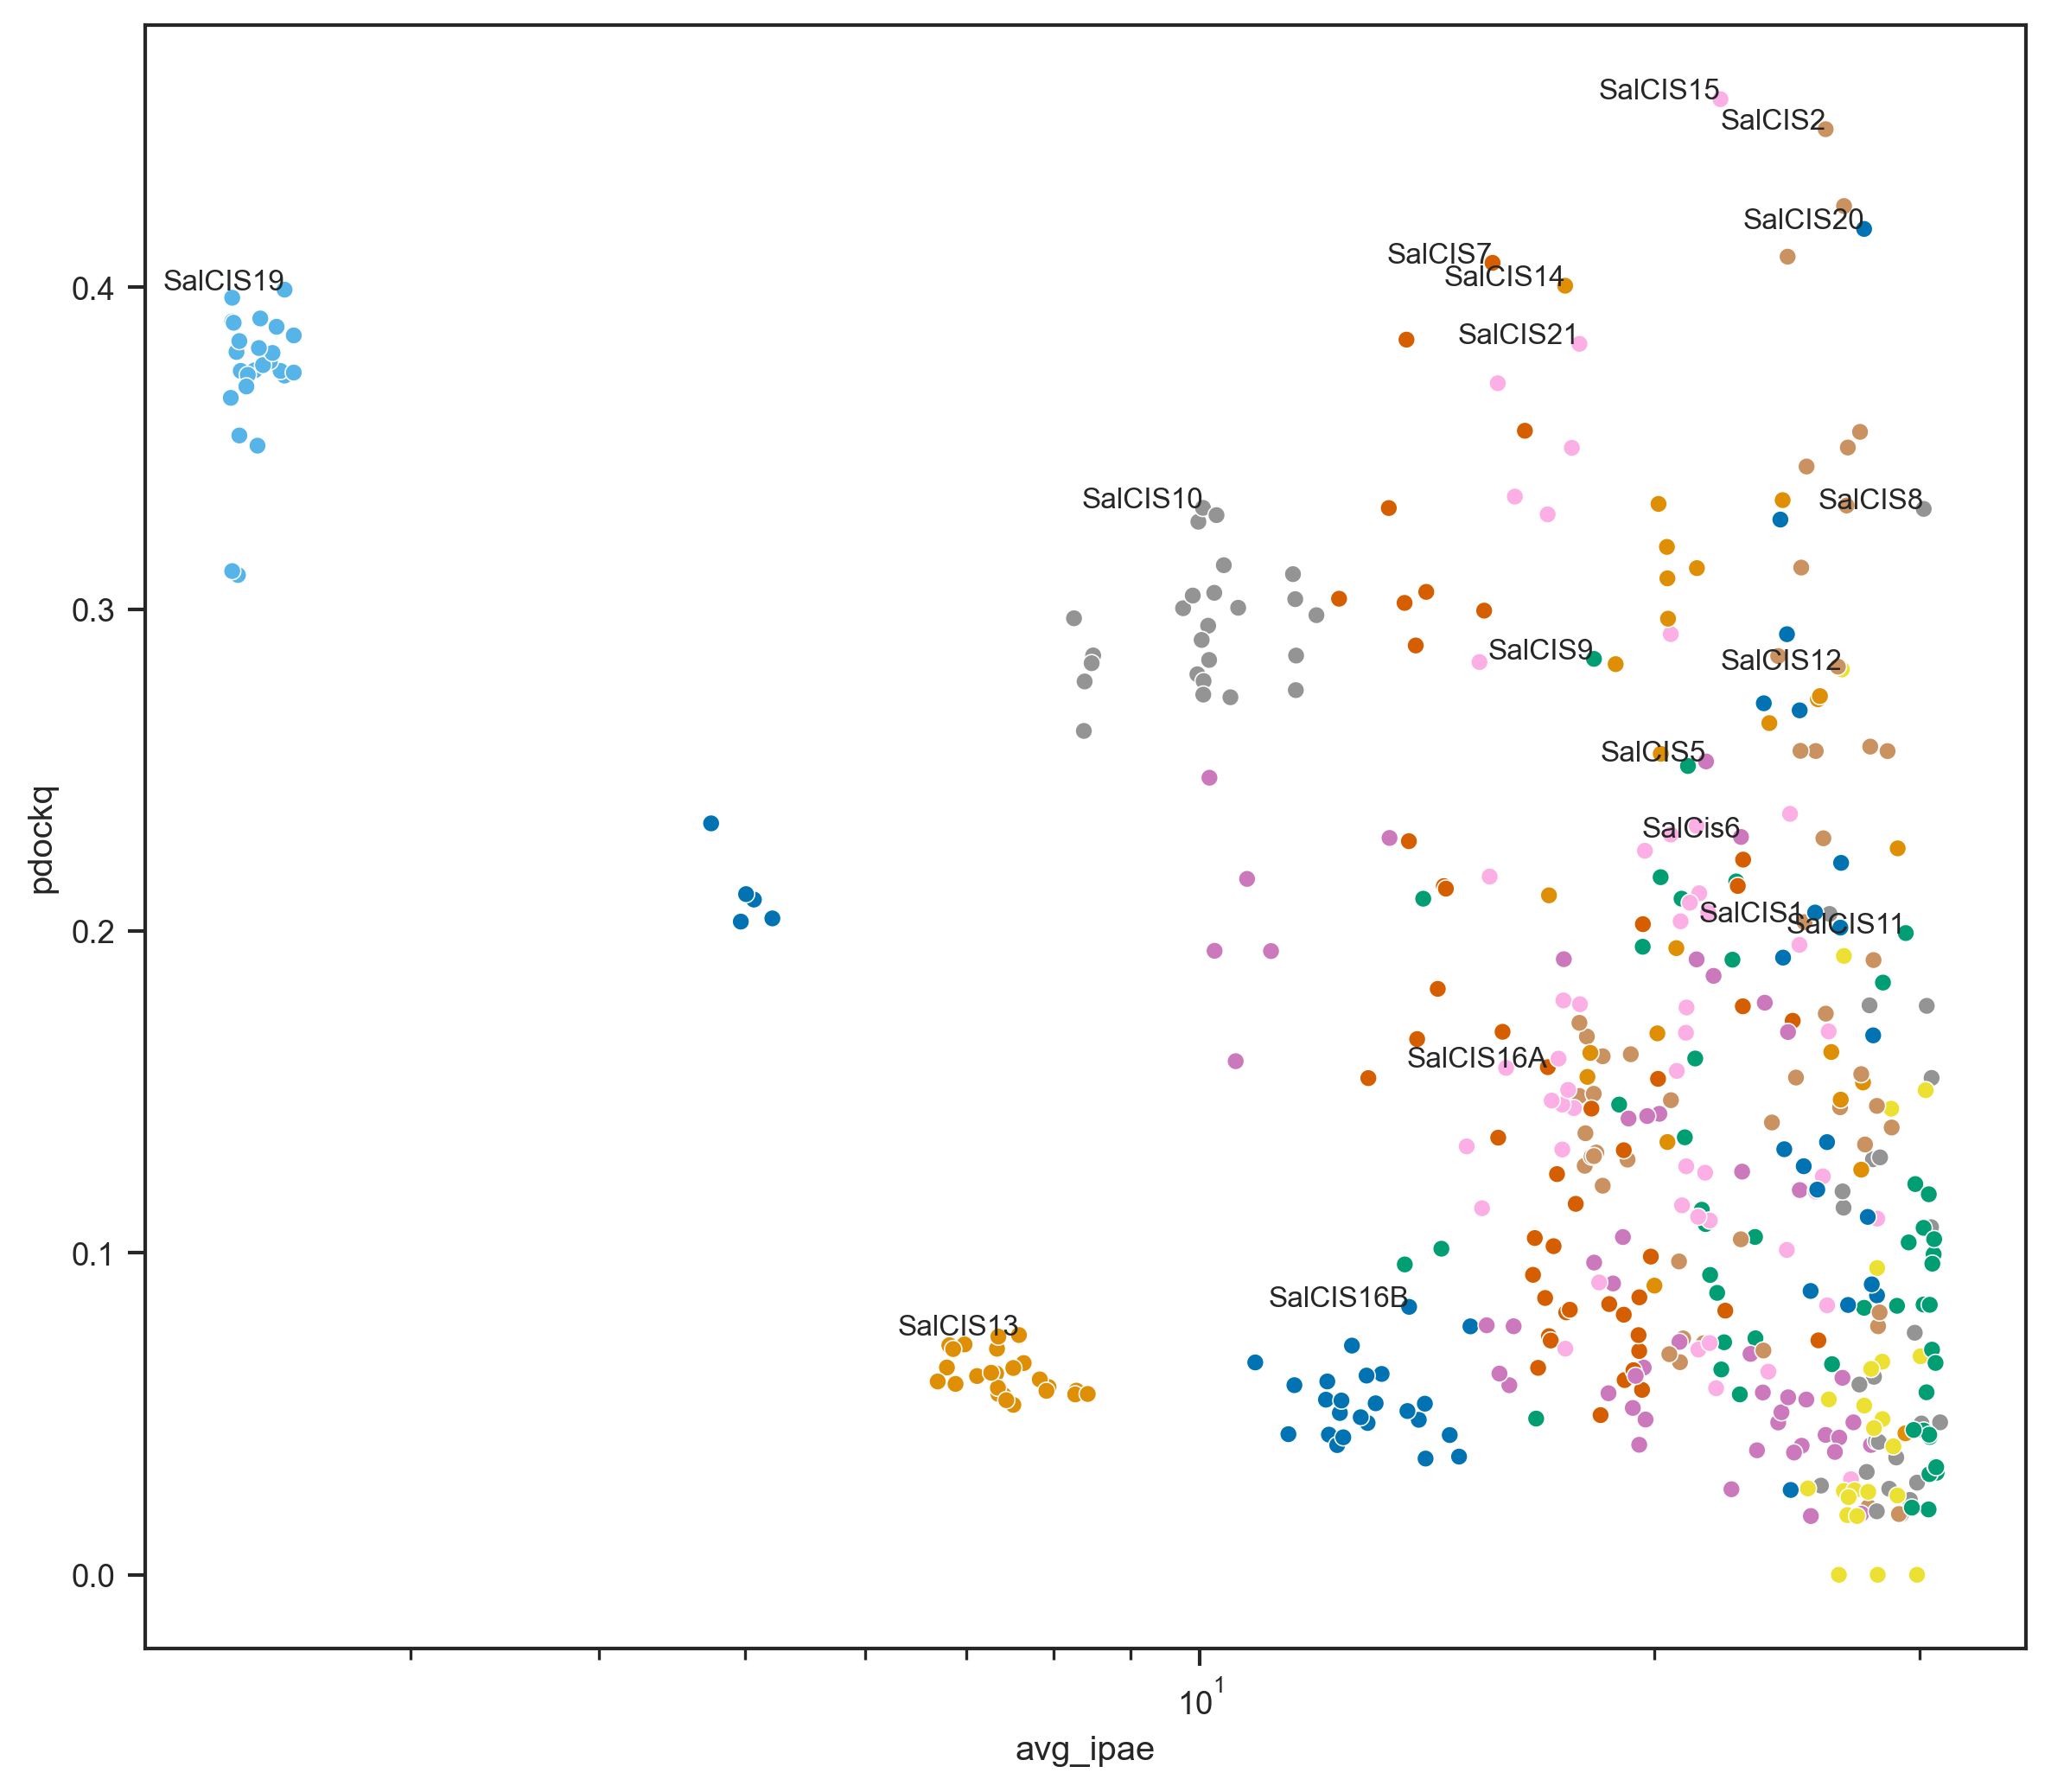

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = df[df['protein1']=='SalCIS19']
plt.clf()
sns.set_context('paper')
sns.set_style('ticks')
plt.figure(0, (8, 7), dpi=300)

# Scatter plot
scatter = sns.scatterplot(data=plot_df, x='avg_ipae', y='pdockq', hue='protein2',palette='colorblind',legend=None)

plot_df2 = plot_df.sort_values('pdockq',ascending=False)
plot_df2 = plot_df2.drop_duplicates('protein2')
# Add labels for specific points
for _, row in plot_df2.iterrows():#plot_df2[(plot_df2['pdockq'] > 0.23) & (plot_df2['avg_ipae'] < 12)].iterrows():
    plt.text(row['avg_ipae'], row['pdockq'], row['protein2'], fontsize=8, ha='right')
plt.xscale('log')
plt.tight_layout()
plt.show()